In [1]:
import torch 
import torch.nn as nn
from torchvision import datasets, transforms, utils
from torch.nn import functional as F

import numpy as np
import matplotlib.pyplot as plt
import random

from vae import *

In [2]:
## GPU
device = torch.device('cuda:' + str(0) if torch.cuda.is_available() else 'cpu')

SEED = 1

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

In [3]:
!wget https://www.di.ens.fr/willow/research/seeing3Dchairs/data/rendered_chairs.tar
# %mkdir -p chair_data
!tar -xvf  'rendered_chairs.tar'

--2021-04-20 19:21:24--  https://www.di.ens.fr/willow/research/seeing3Dchairs/data/rendered_chairs.tar
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-tar]
Saving to: 'rendered_chairs.tar'

rendered_chairs.tar     [            <=>     ]   2.24G  29.5MB/s    in 79s     

2021-04-20 19:22:44 (29.1 MB/s) - 'rendered_chairs.tar' saved [2406455296]

rendered_chairs/
rendered_chairs/1028b32dc1873c2afe26a3ac360dbd4/
rendered_chairs/1028b32dc1873c2afe26a3ac360dbd4/renders/
rendered_chairs/1028b32dc1873c2afe26a3ac360dbd4/renders/image_000_p020_t000_r096.png
rendered_chairs/1028b32dc1873c2afe26a3ac360dbd4/renders/image_001_p020_t011_r096.png
rendered_chairs/1028b32dc1873c2afe26a3ac360dbd4/renders/image_002_p020_t023_r096.png
rendered_chairs/1028b32dc1873c2afe26a3ac360dbd4/renders/image_003_p020_t034_r096.png
rendered_chairs/1028b3

rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_033_p030_t011_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_034_p030_t023_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_035_p030_t034_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_036_p030_t046_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_037_p030_t058_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_038_p030_t069_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_039_p030_t081_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_040_p030_t092_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_041_p030_t104_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_042_p030_t116_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/renders/image_043_p030_t127_r096.png
rendered_chairs/1033ee86cc8bac4390962e4fb7072b86/rende

rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_005_p020_t058_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_006_p020_t069_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_007_p020_t081_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_008_p020_t092_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_009_p020_t104_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_010_p020_t116_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_011_p020_t127_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_012_p020_t139_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_013_p020_t150_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_014_p020_t162_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/renders/image_015_p020_t174_r096.png
rendered_chairs/108b9cb292fd811cf51f77a6d7299806/rende

rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_039_p030_t081_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_040_p030_t092_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_041_p030_t104_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_042_p030_t116_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_043_p030_t127_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_044_p030_t139_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_045_p030_t150_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_046_p030_t162_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_047_p030_t174_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_048_p030_t185_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/renders/image_049_p030_t197_r096.png
rendered_chairs/109c75cfbb789aa0df6cfab91d65bb91/rende

rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_017_p020_t197_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_018_p020_t209_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_019_p020_t220_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_020_p020_t232_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_021_p020_t243_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_022_p020_t255_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_023_p020_t267_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_024_p020_t278_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_025_p020_t290_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_026_p020_t301_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/renders/image_027_p020_t313_r096.png
rendered_chairs/11685727787c96eb7bf41c709bc6a298/rende

rendered_chairs/117930a8f2e37f9b707cdefe012d0353/renders/image_062_p030_t348_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_000_p020_t000_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_001_p020_t011_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_002_p020_t023_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_003_p020_t034_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_004_p020_t046_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_005_p020_t058_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_006_p020_t069_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_007_p020_t081_r096.png
rendered_chairs/11c4b7e1843657b2ee93c6b133692f1b/renders/image_008_p020_t092_r096.png
rendered_chairs/11c4b7e1843657b2

rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_036_p030_t046_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_037_p030_t058_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_038_p030_t069_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_039_p030_t081_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_040_p030_t092_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_041_p030_t104_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_042_p030_t116_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_043_p030_t127_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_044_p030_t139_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_045_p030_t150_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/renders/image_046_p030_t162_r096.png
rendered_chairs/11d3fc4092e616a7a6fee8e2140acec9/rende

rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_007_p020_t081_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_008_p020_t092_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_009_p020_t104_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_010_p020_t116_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_011_p020_t127_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_012_p020_t139_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_013_p020_t150_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_014_p020_t162_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_015_p020_t174_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_016_p020_t185_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_017_p020_t197_r096.png
rendered_chairs/11e55ca087c74082feec1f13d2353f3/renders/image_018

rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_041_p030_t104_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_042_p030_t116_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_043_p030_t127_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_044_p030_t139_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_045_p030_t150_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_046_p030_t162_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_047_p030_t174_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_048_p030_t185_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_049_p030_t197_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_050_p030_t209_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/renders/image_051_p030_t220_r096.png
rendered_chairs/11fa9b044482814ef91663a74ccd2338/rende

rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_010_p020_t116_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_011_p020_t127_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_012_p020_t139_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_013_p020_t150_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_014_p020_t162_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_015_p020_t174_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_016_p020_t185_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_017_p020_t197_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_018_p020_t209_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_019_p020_t220_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/renders/image_020_p020_t232_r096.png
rendered_chairs/1259a3e3e02b249c9710e093c764abec/rende

rendered_chairs/12838414141e59219a2d92ec05f8de08/renders/image_056_p030_t278_r096.png
rendered_chairs/12838414141e59219a2d92ec05f8de08/renders/image_057_p030_t290_r096.png
rendered_chairs/12838414141e59219a2d92ec05f8de08/renders/image_058_p030_t301_r096.png
rendered_chairs/12838414141e59219a2d92ec05f8de08/renders/image_059_p030_t313_r096.png
rendered_chairs/12838414141e59219a2d92ec05f8de08/renders/image_060_p030_t325_r096.png
rendered_chairs/12838414141e59219a2d92ec05f8de08/renders/image_061_p030_t336_r096.png
rendered_chairs/12838414141e59219a2d92ec05f8de08/renders/image_062_p030_t348_r096.png
rendered_chairs/12f4d8c20ef311d988dcbe86402c7c15/
rendered_chairs/12f4d8c20ef311d988dcbe86402c7c15/renders/
rendered_chairs/12f4d8c20ef311d988dcbe86402c7c15/renders/image_000_p020_t000_r096.png
rendered_chairs/12f4d8c20ef311d988dcbe86402c7c15/renders/image_001_p020_t011_r096.png
rendered_chairs/12f4d8c20ef311d988dcbe86402c7c15/renders/image_002_p020_t023_r096.png
rendered_chairs/12f4d8c20ef311d9

rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_033_p030_t011_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_034_p030_t023_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_035_p030_t034_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_036_p030_t046_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_037_p030_t058_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_038_p030_t069_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_039_p030_t081_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_040_p030_t092_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_041_p030_t104_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_042_p030_t116_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/renders/image_043_p030_t127_r096.png
rendered_chairs/1308f3ff2e55eae4f1783a44a88d6274/rende

rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_003_p020_t034_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_004_p020_t046_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_005_p020_t058_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_006_p020_t069_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_007_p020_t081_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_008_p020_t092_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_009_p020_t104_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_010_p020_t116_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_011_p020_t127_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_012_p020_t139_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/renders/image_013_p020_t150_r096.png
rendered_chairs/1383d18af610241f69d8d5b35c38db0d/rende

rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_046_p030_t162_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_047_p030_t174_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_048_p030_t185_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_049_p030_t197_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_050_p030_t209_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_051_p030_t220_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_052_p030_t232_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_053_p030_t243_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_054_p030_t255_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_055_p030_t267_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_056_p030_t278_r096.png
rendered_chairs/1397853bef567adde95e8a5faf311c2/renders/image_057

rendered_chairs/13aa33650c706094732375ced502498/renders/image_019_p020_t220_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_020_p020_t232_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_021_p020_t243_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_022_p020_t255_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_023_p020_t267_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_024_p020_t278_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_025_p020_t290_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_026_p020_t301_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_027_p020_t313_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_028_p020_t325_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_029_p020_t336_r096.png
rendered_chairs/13aa33650c706094732375ced502498/renders/image_030

rendered_chairs/13b5e9e850c817823da27ece6ae88fff/renders/image_055_p030_t267_r096.png
rendered_chairs/13b5e9e850c817823da27ece6ae88fff/renders/image_056_p030_t278_r096.png
rendered_chairs/13b5e9e850c817823da27ece6ae88fff/renders/image_057_p030_t290_r096.png
rendered_chairs/13b5e9e850c817823da27ece6ae88fff/renders/image_058_p030_t301_r096.png
rendered_chairs/13b5e9e850c817823da27ece6ae88fff/renders/image_059_p030_t313_r096.png
rendered_chairs/13b5e9e850c817823da27ece6ae88fff/renders/image_060_p030_t325_r096.png
rendered_chairs/13b5e9e850c817823da27ece6ae88fff/renders/image_061_p030_t336_r096.png
rendered_chairs/13b5e9e850c817823da27ece6ae88fff/renders/image_062_p030_t348_r096.png
rendered_chairs/13bb85511b91b0d3504721639e19f609/
rendered_chairs/13bb85511b91b0d3504721639e19f609/renders/
rendered_chairs/13bb85511b91b0d3504721639e19f609/renders/image_000_p020_t000_r096.png
rendered_chairs/13bb85511b91b0d3504721639e19f609/renders/image_001_p020_t011_r096.png
rendered_chairs/13bb85511b91b0d3

rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_025_p020_t290_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_026_p020_t301_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_027_p020_t313_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_028_p020_t325_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_029_p020_t336_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_030_p020_t348_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_032_p030_t000_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_033_p030_t011_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_034_p030_t023_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_035_p030_t034_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/renders/image_036_p030_t046_r096.png
rendered_chairs/13bc03eca6aad4b2d7bf6fb68df7f786/rende

rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_004_p020_t046_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_005_p020_t058_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_006_p020_t069_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_007_p020_t081_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_008_p020_t092_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_009_p020_t104_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_010_p020_t116_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_011_p020_t127_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_012_p020_t139_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_013_p020_t150_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/renders/image_014_p020_t162_r096.png
rendered_chairs/14096dfe1fcf162476e9713f57a5fcb6/rende

rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_050_p030_t209_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_051_p030_t220_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_052_p030_t232_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_053_p030_t243_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_054_p030_t255_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_055_p030_t267_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_056_p030_t278_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_057_p030_t290_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_058_p030_t301_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_059_p030_t313_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/renders/image_060_p030_t325_r096.png
rendered_chairs/140d764329a9c372707cdefe012d0353/rende

rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_023_p020_t267_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_024_p020_t278_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_025_p020_t290_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_026_p020_t301_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_027_p020_t313_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_028_p020_t325_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_029_p020_t336_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_030_p020_t348_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_032_p030_t000_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_033_p030_t011_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/renders/image_034_p030_t023_r096.png
rendered_chairs/1451ad167129251b4eefb62d17049816/rende

rendered_chairs/14677866a40276204eefb62d17049816/renders/image_057_p030_t290_r096.png
rendered_chairs/14677866a40276204eefb62d17049816/renders/image_058_p030_t301_r096.png
rendered_chairs/14677866a40276204eefb62d17049816/renders/image_059_p030_t313_r096.png
rendered_chairs/14677866a40276204eefb62d17049816/renders/image_060_p030_t325_r096.png
rendered_chairs/14677866a40276204eefb62d17049816/renders/image_061_p030_t336_r096.png
rendered_chairs/14677866a40276204eefb62d17049816/renders/image_062_p030_t348_r096.png
rendered_chairs/14977bca24205cc2a6fee8e2140acec9/
rendered_chairs/14977bca24205cc2a6fee8e2140acec9/renders/
rendered_chairs/14977bca24205cc2a6fee8e2140acec9/renders/image_000_p020_t000_r096.png
rendered_chairs/14977bca24205cc2a6fee8e2140acec9/renders/image_001_p020_t011_r096.png
rendered_chairs/14977bca24205cc2a6fee8e2140acec9/renders/image_002_p020_t023_r096.png
rendered_chairs/14977bca24205cc2a6fee8e2140acec9/renders/image_003_p020_t034_r096.png
rendered_chairs/14977bca24205cc2

rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_029_p020_t336_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_030_p020_t348_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_032_p030_t000_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_033_p030_t011_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_034_p030_t023_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_035_p030_t034_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_036_p030_t046_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_037_p030_t058_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_038_p030_t069_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_039_p030_t081_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/renders/image_040_p030_t092_r096.png
rendered_chairs/14ce27866525f29298e0d1738edd4f19/rende

rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_009_p020_t104_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_010_p020_t116_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_011_p020_t127_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_012_p020_t139_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_013_p020_t150_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_014_p020_t162_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_015_p020_t174_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_016_p020_t185_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_017_p020_t197_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_018_p020_t209_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/renders/image_019_p020_t220_r096.png
rendered_chairs/15ff79064f575ff4d2ee14aa7f86b306/rende

rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_045_p030_t150_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_046_p030_t162_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_047_p030_t174_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_048_p030_t185_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_049_p030_t197_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_050_p030_t209_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_051_p030_t220_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_052_p030_t232_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_053_p030_t243_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_054_p030_t255_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/renders/image_055_p030_t267_r096.png
rendered_chairs/16385378cc5a611ef91663a74ccd2338/rende

rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_017_p020_t197_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_018_p020_t209_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_019_p020_t220_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_020_p020_t232_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_021_p020_t243_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_022_p020_t255_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_023_p020_t267_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_024_p020_t278_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_025_p020_t290_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_026_p020_t301_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_027_p020_t313_r096.png
rendered_chairs/1689f022a0b6bde55876947164cd256/renders/image_028

rendered_chairs/1699496d23dcd57f666bc0b629562709/renders/image_061_p030_t336_r096.png
rendered_chairs/1699496d23dcd57f666bc0b629562709/renders/image_062_p030_t348_r096.png
rendered_chairs/16c39375ac34adf37d47168999f25fa0/
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/image_000_p020_t000_r096.png
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/image_001_p020_t011_r096.png
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/image_002_p020_t023_r096.png
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/image_003_p020_t034_r096.png
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/image_004_p020_t046_r096.png
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/image_005_p020_t058_r096.png
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/image_006_p020_t069_r096.png
rendered_chairs/16c39375ac34adf37d47168999f25fa0/renders/image_007_p020_t081_r096.png
rendered_chairs/16c39375ac34adf3

rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_037_p030_t058_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_038_p030_t069_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_039_p030_t081_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_040_p030_t092_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_041_p030_t104_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_042_p030_t116_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_043_p030_t127_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_044_p030_t139_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_045_p030_t150_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_046_p030_t162_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/renders/image_047_p030_t174_r096.png
rendered_chairs/17061b8eb3f01feb5e1decb7e647735e/rende

rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_006_p020_t069_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_007_p020_t081_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_008_p020_t092_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_009_p020_t104_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_010_p020_t116_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_011_p020_t127_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_012_p020_t139_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_013_p020_t150_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_014_p020_t162_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_015_p020_t174_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/renders/image_016_p020_t185_r096.png
rendered_chairs/172d2db577dbb77b666bc0b629562709/rende

rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_041_p030_t104_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_042_p030_t116_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_043_p030_t127_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_044_p030_t139_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_045_p030_t150_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_046_p030_t162_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_047_p030_t174_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_048_p030_t185_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_049_p030_t197_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_050_p030_t209_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_051_p030_t220_r096.png
rendered_chairs/1769c3cf3391d5c1a1d7c136d0e341/renders/image_052_p030_t232_r

rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_021_p020_t243_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_022_p020_t255_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_023_p020_t267_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_024_p020_t278_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_025_p020_t290_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_026_p020_t301_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_027_p020_t313_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_028_p020_t325_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_029_p020_t336_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_030_p020_t348_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/renders/image_032_p030_t000_r096.png
rendered_chairs/17cbb1b50fabcaf734b63937fef3ba93/rende

rendered_chairs/17d4c0f1b707e6dd19fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/17d4c0f1b707e6dd19fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/17d4c0f1b707e6dd19fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/17d4c0f1b707e6dd19fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/17d4c0f1b707e6dd19fb4103277a6b93/renders/image_061_p030_t336_r096.png
rendered_chairs/17d4c0f1b707e6dd19fb4103277a6b93/renders/image_062_p030_t348_r096.png
rendered_chairs/184c07776b38d92e35836c728d324152/
rendered_chairs/184c07776b38d92e35836c728d324152/renders/
rendered_chairs/184c07776b38d92e35836c728d324152/renders/image_000_p020_t000_r096.png
rendered_chairs/184c07776b38d92e35836c728d324152/renders/image_001_p020_t011_r096.png
rendered_chairs/184c07776b38d92e35836c728d324152/renders/image_002_p020_t023_r096.png
rendered_chairs/184c07776b38d92e35836c728d324152/renders/image_003_p020_t034_r096.png
rendered_chairs/184c07776b38d92e

rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_032_p030_t000_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_033_p030_t011_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_034_p030_t023_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_035_p030_t034_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_036_p030_t046_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_037_p030_t058_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_038_p030_t069_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_039_p030_t081_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_040_p030_t092_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_041_p030_t104_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/renders/image_042_p030_t116_r096.png
rendered_chairs/187c69927faf342636b0f2a1430e993a/rende

rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_006_p020_t069_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_009_p020_t104_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_010_p020_t116_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_012_p020_t139_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_013_p020_t150_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_014_p020_t162_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_015_p020_t174_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/renders/image_016_p020_t185_r096.png
rendered_chairs/19319101e064eb1019fb4103277a6b93/rende

rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_050_p030_t209_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_051_p030_t220_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_052_p030_t232_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_053_p030_t243_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_054_p030_t255_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_055_p030_t267_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_056_p030_t278_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_057_p030_t290_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_058_p030_t301_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_059_p030_t313_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/renders/image_060_p030_t325_r096.png
rendered_chairs/19353a61664435449b582c44569a1a8e/rende

rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_034_p030_t023_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_035_p030_t034_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_036_p030_t046_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_037_p030_t058_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_038_p030_t069_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_039_p030_t081_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_040_p030_t092_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_041_p030_t104_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_042_p030_t116_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_043_p030_t127_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/renders/image_044_p030_t139_r096.png
rendered_chairs/198a3e82b102529c4904d89e9169817b/rende

rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_005_p020_t058_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_006_p020_t069_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_007_p020_t081_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_008_p020_t092_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_009_p020_t104_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_010_p020_t116_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_011_p020_t127_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_012_p020_t139_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_013_p020_t150_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_014_p020_t162_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/renders/image_015_p020_t174_r096.png
rendered_chairs/19e2321df1141bf3b76e29c9c43bc7aa/rende

rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_046_p030_t162_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_047_p030_t174_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_048_p030_t185_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_049_p030_t197_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_050_p030_t209_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_051_p030_t220_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_052_p030_t232_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_053_p030_t243_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_054_p030_t255_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_055_p030_t267_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/renders/image_056_p030_t278_r096.png
rendered_chairs/19f597c6dbff03c114038d588fd1342f/rende

rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_018_p020_t209_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_019_p020_t220_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_020_p020_t232_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_021_p020_t243_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_022_p020_t255_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_023_p020_t267_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_024_p020_t278_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_025_p020_t290_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_026_p020_t301_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_027_p020_t313_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/renders/image_028_p020_t325_r096.png
rendered_chairs/1a8a5008e09f8f2363ed57e35c972b4b/rende

rendered_chairs/1a9f581abdcda31a651636b7e802cd3e/renders/image_057_p030_t290_r096.png
rendered_chairs/1a9f581abdcda31a651636b7e802cd3e/renders/image_058_p030_t301_r096.png
rendered_chairs/1a9f581abdcda31a651636b7e802cd3e/renders/image_059_p030_t313_r096.png
rendered_chairs/1a9f581abdcda31a651636b7e802cd3e/renders/image_060_p030_t325_r096.png
rendered_chairs/1a9f581abdcda31a651636b7e802cd3e/renders/image_061_p030_t336_r096.png
rendered_chairs/1a9f581abdcda31a651636b7e802cd3e/renders/image_062_p030_t348_r096.png
rendered_chairs/1ab4c6ef68073113cf004563556ddb36/
rendered_chairs/1ab4c6ef68073113cf004563556ddb36/renders/
rendered_chairs/1ab4c6ef68073113cf004563556ddb36/renders/image_000_p020_t000_r096.png
rendered_chairs/1ab4c6ef68073113cf004563556ddb36/renders/image_001_p020_t011_r096.png
rendered_chairs/1ab4c6ef68073113cf004563556ddb36/renders/image_002_p020_t023_r096.png
rendered_chairs/1ab4c6ef68073113cf004563556ddb36/renders/image_003_p020_t034_r096.png
rendered_chairs/1ab4c6ef68073113

rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_029_p020_t336_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_030_p020_t348_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_032_p030_t000_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_033_p030_t011_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_034_p030_t023_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_035_p030_t034_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_036_p030_t046_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_037_p030_t058_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_038_p030_t069_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_039_p030_t081_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/renders/image_040_p030_t092_r096.png
rendered_chairs/1ac9dc71cadf9a9359450ae458eca656/rende

rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_006_p020_t069_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_007_p020_t081_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_008_p020_t092_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_009_p020_t104_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_010_p020_t116_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_011_p020_t127_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_012_p020_t139_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_013_p020_t150_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_014_p020_t162_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_015_p020_t174_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/renders/image_016_p020_t185_r096.png
rendered_chairs/1b3f9042b7aefc535abdb7c8252f0c01/rende

rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_052_p030_t232_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_053_p030_t243_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_054_p030_t255_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_055_p030_t267_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_056_p030_t278_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_057_p030_t290_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_058_p030_t301_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_059_p030_t313_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_060_p030_t325_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_061_p030_t336_r096.png
rendered_chairs/1b80175cc081f3e44e4975e87c20ce53/renders/image_062_p030_t348_r096.png
rendered_chairs/1bb2b8d52e3ade042b114cb28ee9f2b7/
rend

rendered_chairs/1bb65f21626322be077354014798488/renders/image_027_p020_t313_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_028_p020_t325_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_029_p020_t336_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_030_p020_t348_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_032_p030_t000_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_033_p030_t011_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_034_p030_t023_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_035_p030_t034_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_036_p030_t046_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_037_p030_t058_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_038_p030_t069_r096.png
rendered_chairs/1bb65f21626322be077354014798488/renders/image_039

rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_010_p020_t116_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_011_p020_t127_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_012_p020_t139_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_013_p020_t150_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_014_p020_t162_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_015_p020_t174_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_016_p020_t185_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_017_p020_t197_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_018_p020_t209_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_019_p020_t220_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_020_p020_t232_r096.png
rendered_chairs/1c1680215aab361b04cb542e2c50eb4/renders/image_021

rendered_chairs/1c1eaf23be17b3d87268273dd6b1d7d2/renders/image_057_p030_t290_r096.png
rendered_chairs/1c1eaf23be17b3d87268273dd6b1d7d2/renders/image_058_p030_t301_r096.png
rendered_chairs/1c1eaf23be17b3d87268273dd6b1d7d2/renders/image_059_p030_t313_r096.png
rendered_chairs/1c1eaf23be17b3d87268273dd6b1d7d2/renders/image_060_p030_t325_r096.png
rendered_chairs/1c1eaf23be17b3d87268273dd6b1d7d2/renders/image_061_p030_t336_r096.png
rendered_chairs/1c1eaf23be17b3d87268273dd6b1d7d2/renders/image_062_p030_t348_r096.png
rendered_chairs/1c2caacac14dfa0019fb4103277a6b93/
rendered_chairs/1c2caacac14dfa0019fb4103277a6b93/renders/
rendered_chairs/1c2caacac14dfa0019fb4103277a6b93/renders/image_000_p020_t000_r096.png
rendered_chairs/1c2caacac14dfa0019fb4103277a6b93/renders/image_001_p020_t011_r096.png
rendered_chairs/1c2caacac14dfa0019fb4103277a6b93/renders/image_002_p020_t023_r096.png
rendered_chairs/1c2caacac14dfa0019fb4103277a6b93/renders/image_003_p020_t034_r096.png
rendered_chairs/1c2caacac14dfa00

rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_027_p020_t313_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_028_p020_t325_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_029_p020_t336_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_030_p020_t348_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_032_p030_t000_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_033_p030_t011_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_034_p030_t023_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_035_p030_t034_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_036_p030_t046_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_037_p030_t058_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/renders/image_038_p030_t069_r096.png
rendered_chairs/1c3b37676f2c7f7eb22e4ecbff0e922f/rende

rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_004_p020_t046_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_005_p020_t058_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_006_p020_t069_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_007_p020_t081_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_008_p020_t092_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_009_p020_t104_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_010_p020_t116_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_011_p020_t127_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_012_p020_t139_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_013_p020_t150_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/renders/image_014_p020_t162_r096.png
rendered_chairs/1c4da602a4a1aefbcbc8898aac45a2ff/rende

rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_044_p030_t139_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_045_p030_t150_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_046_p030_t162_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_047_p030_t174_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_048_p030_t185_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_049_p030_t197_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_050_p030_t209_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_051_p030_t220_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_052_p030_t232_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_053_p030_t243_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/renders/image_054_p030_t255_r096.png
rendered_chairs/1c685bc2a93f87a2504721639e19f609/rende

rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_021_p020_t243_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_022_p020_t255_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_023_p020_t267_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_024_p020_t278_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_025_p020_t290_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_026_p020_t301_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_027_p020_t313_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_028_p020_t325_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_029_p020_t336_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/1cca005b49411b0535836c728d324152/rende

rendered_chairs/1cea1437a10f2b67e235eb1ec8984f53/renders/image_055_p030_t267_r096.png
rendered_chairs/1cea1437a10f2b67e235eb1ec8984f53/renders/image_056_p030_t278_r096.png
rendered_chairs/1cea1437a10f2b67e235eb1ec8984f53/renders/image_057_p030_t290_r096.png
rendered_chairs/1cea1437a10f2b67e235eb1ec8984f53/renders/image_058_p030_t301_r096.png
rendered_chairs/1cea1437a10f2b67e235eb1ec8984f53/renders/image_059_p030_t313_r096.png
rendered_chairs/1cea1437a10f2b67e235eb1ec8984f53/renders/image_060_p030_t325_r096.png
rendered_chairs/1cea1437a10f2b67e235eb1ec8984f53/renders/image_061_p030_t336_r096.png
rendered_chairs/1cea1437a10f2b67e235eb1ec8984f53/renders/image_062_p030_t348_r096.png
rendered_chairs/1d2a3cc7883a1b507c22c6d3f65143fa/
rendered_chairs/1d2a3cc7883a1b507c22c6d3f65143fa/renders/
rendered_chairs/1d2a3cc7883a1b507c22c6d3f65143fa/renders/image_000_p020_t000_r096.png
rendered_chairs/1d2a3cc7883a1b507c22c6d3f65143fa/renders/image_001_p020_t011_r096.png
rendered_chairs/1d2a3cc7883a1b50

rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_029_p020_t336_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_030_p020_t348_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_032_p030_t000_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_033_p030_t011_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_034_p030_t023_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_035_p030_t034_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_036_p030_t046_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_037_p030_t058_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_038_p030_t069_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_039_p030_t081_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/renders/image_040_p030_t092_r096.png
rendered_chairs/1d6408f698b2ef0ef994e2a430ba61bf/rende

rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_008_p020_t092_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_009_p020_t104_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_010_p020_t116_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_011_p020_t127_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_012_p020_t139_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_013_p020_t150_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_014_p020_t162_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_015_p020_t174_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_016_p020_t185_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_017_p020_t197_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_018_p020_t209_r096.png
rendered_chairs/1da6554f94e17558b68a28dd0f5522f/renders/image_019

rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_046_p030_t162_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_047_p030_t174_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_048_p030_t185_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_049_p030_t197_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_050_p030_t209_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_051_p030_t220_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_052_p030_t232_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_053_p030_t243_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_054_p030_t255_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_055_p030_t267_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/renders/image_056_p030_t278_r096.png
rendered_chairs/1e1151a459002e85508f812891696df0/rende

rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_023_p020_t267_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_024_p020_t278_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_025_p020_t290_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_026_p020_t301_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_027_p020_t313_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_028_p020_t325_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_029_p020_t336_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_030_p020_t348_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_032_p030_t000_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_033_p030_t011_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/renders/image_034_p030_t023_r096.png
rendered_chairs/1e49ab8bc84a667298d5fc0473d00a1c/rende

rendered_chairs/1e67e443849379fd6666a748bda83f67/renders/image_057_p030_t290_r096.png
rendered_chairs/1e67e443849379fd6666a748bda83f67/renders/image_058_p030_t301_r096.png
rendered_chairs/1e67e443849379fd6666a748bda83f67/renders/image_059_p030_t313_r096.png
rendered_chairs/1e67e443849379fd6666a748bda83f67/renders/image_060_p030_t325_r096.png
rendered_chairs/1e67e443849379fd6666a748bda83f67/renders/image_061_p030_t336_r096.png
rendered_chairs/1e67e443849379fd6666a748bda83f67/renders/image_062_p030_t348_r096.png
rendered_chairs/1e6a212abb46d63df91663a74ccd2338/
rendered_chairs/1e6a212abb46d63df91663a74ccd2338/renders/
rendered_chairs/1e6a212abb46d63df91663a74ccd2338/renders/image_000_p020_t000_r096.png
rendered_chairs/1e6a212abb46d63df91663a74ccd2338/renders/image_001_p020_t011_r096.png
rendered_chairs/1e6a212abb46d63df91663a74ccd2338/renders/image_002_p020_t023_r096.png
rendered_chairs/1e6a212abb46d63df91663a74ccd2338/renders/image_003_p020_t034_r096.png
rendered_chairs/1e6a212abb46d63d

rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_029_p020_t336_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_030_p020_t348_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_032_p030_t000_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_033_p030_t011_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_034_p030_t023_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_035_p030_t034_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_036_p030_t046_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_037_p030_t058_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_038_p030_t069_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_039_p030_t081_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/renders/image_040_p030_t092_r096.png
rendered_chairs/1e6cfd4bfc6270f822b5697e1c26fdf8/rende

rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_004_p020_t046_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_005_p020_t058_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_006_p020_t069_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_007_p020_t081_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_008_p020_t092_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_009_p020_t104_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_010_p020_t116_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_011_p020_t127_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_012_p020_t139_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_013_p020_t150_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/renders/image_014_p020_t162_r096.png
rendered_chairs/1f02113a8ab82b425bf86a0f00d61ea8/rende

rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_049_p030_t197_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_050_p030_t209_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_051_p030_t220_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_052_p030_t232_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_053_p030_t243_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_054_p030_t255_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_055_p030_t267_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_056_p030_t278_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_057_p030_t290_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_058_p030_t301_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/renders/image_059_p030_t313_r096.png
rendered_chairs/1f403ac6f56a0fb71ef2486fe36a1e66/rende

rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_023_p020_t267_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_024_p020_t278_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_025_p020_t290_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_026_p020_t301_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_027_p020_t313_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_028_p020_t325_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_029_p020_t336_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_030_p020_t348_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_032_p030_t000_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_033_p030_t011_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_034_p030_t023_r096.png
rendered_chairs/1fa4577da4741f798d5fc0473d00a1c/renders/image_035

rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_000_p020_t000_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_001_p020_t011_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_002_p020_t023_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_003_p020_t034_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_004_p020_t046_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_005_p020_t058_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_006_p020_t069_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_007_p020_t081_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_008_p020_t092_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a274ef/renders/image_009_p020_t104_r096.png
rendered_chairs/1fb9fdd0303b442e3f7a74e12a27

rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_038_p030_t069_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_039_p030_t081_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_040_p030_t092_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_041_p030_t104_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_042_p030_t116_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_043_p030_t127_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_044_p030_t139_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_045_p030_t150_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_046_p030_t162_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_047_p030_t174_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/renders/image_048_p030_t185_r096.png
rendered_chairs/1fcc1e9e555f1fddf2b931201029bc76/rende

rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_014_p020_t162_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_015_p020_t174_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_016_p020_t185_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_017_p020_t197_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_018_p020_t209_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_019_p020_t220_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_020_p020_t232_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_021_p020_t243_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_022_p020_t255_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_023_p020_t267_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/renders/image_024_p020_t278_r096.png
rendered_chairs/1fe33fe022779bf8b0957d845ac33749/rende

rendered_chairs/2041d9b0d3a94db3e85ee2c52aa0267a/renders/image_057_p030_t290_r096.png
rendered_chairs/2041d9b0d3a94db3e85ee2c52aa0267a/renders/image_058_p030_t301_r096.png
rendered_chairs/2041d9b0d3a94db3e85ee2c52aa0267a/renders/image_059_p030_t313_r096.png
rendered_chairs/2041d9b0d3a94db3e85ee2c52aa0267a/renders/image_060_p030_t325_r096.png
rendered_chairs/2041d9b0d3a94db3e85ee2c52aa0267a/renders/image_061_p030_t336_r096.png
rendered_chairs/2041d9b0d3a94db3e85ee2c52aa0267a/renders/image_062_p030_t348_r096.png
rendered_chairs/207407c5961c7d6388864d814c5c8043/
rendered_chairs/207407c5961c7d6388864d814c5c8043/renders/
rendered_chairs/207407c5961c7d6388864d814c5c8043/renders/image_000_p020_t000_r096.png
rendered_chairs/207407c5961c7d6388864d814c5c8043/renders/image_001_p020_t011_r096.png
rendered_chairs/207407c5961c7d6388864d814c5c8043/renders/image_002_p020_t023_r096.png
rendered_chairs/207407c5961c7d6388864d814c5c8043/renders/image_003_p020_t034_r096.png
rendered_chairs/207407c5961c7d63

rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_027_p020_t313_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_028_p020_t325_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_029_p020_t336_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_030_p020_t348_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_032_p030_t000_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_033_p030_t011_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_034_p030_t023_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_035_p030_t034_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_036_p030_t046_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_037_p030_t058_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/renders/image_038_p030_t069_r096.png
rendered_chairs/209a904959643d0eba7afe602821e0d0/rende

rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_003_p020_t034_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_004_p020_t046_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_005_p020_t058_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_006_p020_t069_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_007_p020_t081_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_008_p020_t092_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_009_p020_t104_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_010_p020_t116_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_011_p020_t127_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_012_p020_t139_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/renders/image_013_p020_t150_r096.png
rendered_chairs/20a5672ab6767a436fdde33224151fa5/rende

rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_039_p030_t081_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_040_p030_t092_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_041_p030_t104_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_042_p030_t116_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_043_p030_t127_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_044_p030_t139_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_045_p030_t150_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_046_p030_t162_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_047_p030_t174_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_048_p030_t185_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/renders/image_049_p030_t197_r096.png
rendered_chairs/20b0a82068ae767c34cc22336880d45c/rende

rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_008_p020_t092_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_009_p020_t104_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_010_p020_t116_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_011_p020_t127_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_012_p020_t139_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_013_p020_t150_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_014_p020_t162_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_015_p020_t174_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_016_p020_t185_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_017_p020_t197_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/renders/image_018_p020_t209_r096.png
rendered_chairs/20df3d69a54cbd17419786e9c37fabbe/rende

rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_053_p030_t243_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_054_p030_t255_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_055_p030_t267_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_056_p030_t278_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_057_p030_t290_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_058_p030_t301_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_059_p030_t313_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_060_p030_t325_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_061_p030_t336_r096.png
rendered_chairs/210115ebbbd9eefe5fdc736bcab9da58/renders/image_062_p030_t348_r096.png
rendered_chairs/2137a8fcee12e72d19fb4103277a6b93/
rendered_chairs/2137a8fcee12e72d19fb4103277a6b93/renders/
rendered_chairs/2137a8fcee12e72d

rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_026_p020_t301_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_027_p020_t313_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_028_p020_t325_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_029_p020_t336_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_030_p020_t348_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_032_p030_t000_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_033_p030_t011_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_034_p030_t023_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_035_p030_t034_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_036_p030_t046_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/renders/image_037_p030_t058_r096.png
rendered_chairs/217dd75324b38d07fec515d9b77eb8c1/rende

rendered_chairs/2182398f0f8fdd81af7c7ad2549a1b15/renders/image_061_p030_t336_r096.png
rendered_chairs/2182398f0f8fdd81af7c7ad2549a1b15/renders/image_062_p030_t348_r096.png
rendered_chairs/226927edcf014278cb94e5b490ba717a/
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/image_000_p020_t000_r096.png
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/image_001_p020_t011_r096.png
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/image_002_p020_t023_r096.png
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/image_003_p020_t034_r096.png
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/image_004_p020_t046_r096.png
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/image_005_p020_t058_r096.png
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/image_006_p020_t069_r096.png
rendered_chairs/226927edcf014278cb94e5b490ba717a/renders/image_007_p020_t081_r096.png
rendered_chairs/226927edcf014278

rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_033_p030_t011_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_034_p030_t023_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_035_p030_t034_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_036_p030_t046_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_037_p030_t058_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_038_p030_t069_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_039_p030_t081_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_040_p030_t092_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_041_p030_t104_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_042_p030_t116_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/renders/image_043_p030_t127_r096.png
rendered_chairs/2320dab001320f69f91663a74ccd2338/rende

rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_011_p020_t127_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_012_p020_t139_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_013_p020_t150_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_014_p020_t162_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_015_p020_t174_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_016_p020_t185_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_017_p020_t197_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_018_p020_t209_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_019_p020_t220_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_020_p020_t232_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/renders/image_021_p020_t243_r096.png
rendered_chairs/2387252e09b3911227eb00c151c6f711/rende

rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_049_p030_t197_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_050_p030_t209_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_051_p030_t220_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_052_p030_t232_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_053_p030_t243_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_054_p030_t255_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_055_p030_t267_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_056_p030_t278_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_057_p030_t290_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_058_p030_t301_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_059_p030_t313_r096.png
rendered_chairs/239e9b8148adf8ce69fe34c01a5bc6/renders/image_060_p030_t325_r

rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_021_p020_t243_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_022_p020_t255_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_023_p020_t267_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_024_p020_t278_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_025_p020_t290_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_026_p020_t301_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_027_p020_t313_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_028_p020_t325_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_029_p020_t336_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_030_p020_t348_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/renders/image_032_p030_t000_r096.png
rendered_chairs/23fff0800f964188ad5067eac75a07f7/rende

rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_003_p020_t034_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_004_p020_t046_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_005_p020_t058_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_006_p020_t069_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_007_p020_t081_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_008_p020_t092_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_009_p020_t104_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_010_p020_t116_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_011_p020_t127_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_012_p020_t139_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_013_p020_t150_r096.png
rendered_chairs/249f3eb6a7236ff7593ebeeedbff73b/renders/image_014

rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_039_p030_t081_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_040_p030_t092_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_041_p030_t104_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_042_p030_t116_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_043_p030_t127_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_044_p030_t139_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_045_p030_t150_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_046_p030_t162_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_047_p030_t174_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_048_p030_t185_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/renders/image_049_p030_t197_r096.png
rendered_chairs/24abfbc0942cbf8fc8b7874340ccdda3/rende

rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_020_p020_t232_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_021_p020_t243_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_022_p020_t255_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_023_p020_t267_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_024_p020_t278_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_025_p020_t290_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_026_p020_t301_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_027_p020_t313_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_028_p020_t325_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_029_p020_t336_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/renders/image_030_p020_t348_r096.png
rendered_chairs/24bbe7f32727901aa6fee8e2140acec9/rende

rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_001_p020_t011_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_002_p020_t023_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_003_p020_t034_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_004_p020_t046_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_005_p020_t058_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_006_p020_t069_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_007_p020_t081_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_008_p020_t092_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_009_p020_t104_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_010_p020_t116_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/renders/image_011_p020_t127_r096.png
rendered_chairs/2507cdf79455b907504721639e19f609/rende

rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_042_p030_t116_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_043_p030_t127_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_044_p030_t139_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_045_p030_t150_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_046_p030_t162_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_047_p030_t174_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_048_p030_t185_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_049_p030_t197_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_050_p030_t209_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_051_p030_t220_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/renders/image_052_p030_t232_r096.png
rendered_chairs/253ac66490cc0338902a7ca2f1955e76/rende

rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_017_p020_t197_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_018_p020_t209_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_019_p020_t220_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_020_p020_t232_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_021_p020_t243_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_022_p020_t255_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_023_p020_t267_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_024_p020_t278_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_025_p020_t290_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_026_p020_t301_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/renders/image_027_p020_t313_r096.png
rendered_chairs/255f69fe308be61d5b5eae3462e1e158/rende

rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_052_p030_t232_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_053_p030_t243_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_054_p030_t255_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_055_p030_t267_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_056_p030_t278_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_057_p030_t290_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_058_p030_t301_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_059_p030_t313_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_060_p030_t325_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/258867fb919719fdf91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/25b2ab80f727445e3d2617f9171b5ccb/
rend

rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_023_p020_t267_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_024_p020_t278_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_025_p020_t290_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_026_p020_t301_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_027_p020_t313_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_028_p020_t325_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_029_p020_t336_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_030_p020_t348_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_032_p030_t000_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_033_p030_t011_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/renders/image_034_p030_t023_r096.png
rendered_chairs/260f65e1b1baaf7c7b707c797539b200/rende

rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_001_p020_t011_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_002_p020_t023_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_003_p020_t034_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_004_p020_t046_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_005_p020_t058_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_006_p020_t069_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_007_p020_t081_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_008_p020_t092_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_009_p020_t104_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_010_p020_t116_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/renders/image_011_p020_t127_r096.png
rendered_chairs/265c564e26071961e27790b0ec8671f7/rende

rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_042_p030_t116_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_043_p030_t127_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_044_p030_t139_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_045_p030_t150_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_046_p030_t162_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_047_p030_t174_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_048_p030_t185_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_049_p030_t197_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_050_p030_t209_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_051_p030_t220_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/renders/image_052_p030_t232_r096.png
rendered_chairs/26666c7415283c67666bc0b629562709/rende

rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_014_p020_t162_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_015_p020_t174_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_016_p020_t185_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_017_p020_t197_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_018_p020_t209_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_019_p020_t220_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_020_p020_t232_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_021_p020_t243_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_022_p020_t255_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_023_p020_t267_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/renders/image_024_p020_t278_r096.png
rendered_chairs/268052538214e9f8f42a90fe4baf4591/rende

rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_053_p030_t243_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_054_p030_t255_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_055_p030_t267_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_056_p030_t278_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_057_p030_t290_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_058_p030_t301_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_059_p030_t313_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_060_p030_t325_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_061_p030_t336_r096.png
rendered_chairs/26c9e85dfa18af9fcf004563556ddb36/renders/image_062_p030_t348_r096.png
rendered_chairs/26ece83dc8763b34d2b12aa6a0f050b3/
rendered_chairs/26ece83dc8763b34d2b12aa6a0f050b3/renders/
rendered_chairs/26ece83dc8763b34

rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_027_p020_t313_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_028_p020_t325_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_029_p020_t336_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_030_p020_t348_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_032_p030_t000_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_033_p030_t011_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_034_p030_t023_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_035_p030_t034_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_036_p030_t046_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_037_p030_t058_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/renders/image_038_p030_t069_r096.png
rendered_chairs/2742c0a5e984d92fa0dcc52ca811e565/rende

rendered_chairs/27574a49bb8055ace6fe3612af521500/renders/image_062_p030_t348_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_000_p020_t000_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_001_p020_t011_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_002_p020_t023_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_003_p020_t034_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_004_p020_t046_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_005_p020_t058_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_006_p020_t069_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_007_p020_t081_r096.png
rendered_chairs/276932e7bf229d37c8ad93869b52d215/renders/image_008_p020_t092_r096.png
rendered_chairs/276932e7bf229d37

rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_032_p030_t000_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_033_p030_t011_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_034_p030_t023_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_035_p030_t034_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_036_p030_t046_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_037_p030_t058_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_038_p030_t069_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_039_p030_t081_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_040_p030_t092_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_041_p030_t104_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/renders/image_042_p030_t116_r096.png
rendered_chairs/27a208ec932eb2e0fc4888925c269433/rende

rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_006_p020_t069_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_007_p020_t081_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_008_p020_t092_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_009_p020_t104_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_010_p020_t116_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_011_p020_t127_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_012_p020_t139_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_013_p020_t150_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_014_p020_t162_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_015_p020_t174_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_016_p020_t185_r096.png
rendered_chairs/27e757d4ed3c929b75c39dc45570367/renders/image_017

rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_043_p030_t127_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_044_p030_t139_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_045_p030_t150_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_046_p030_t162_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_047_p030_t174_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_048_p030_t185_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_049_p030_t197_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_050_p030_t209_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_051_p030_t220_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_052_p030_t232_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/renders/image_053_p030_t243_r096.png
rendered_chairs/280d49c0833e2dcecbdbd70308cc5247/rende

rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_015_p020_t174_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_016_p020_t185_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_017_p020_t197_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_018_p020_t209_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_019_p020_t220_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_020_p020_t232_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_021_p020_t243_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_022_p020_t255_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_023_p020_t267_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_024_p020_t278_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_025_p020_t290_r096.png
rendered_chairs/28673322a55c9935183d5461e0e1f71/renders/image_026

rendered_chairs/28bdf067b9fea968f17e3402958be9f/renders/image_060_p030_t325_r096.png
rendered_chairs/28bdf067b9fea968f17e3402958be9f/renders/image_061_p030_t336_r096.png
rendered_chairs/28bdf067b9fea968f17e3402958be9f/renders/image_062_p030_t348_r096.png
rendered_chairs/28c103d819fd9568504721639e19f609/
rendered_chairs/28c103d819fd9568504721639e19f609/renders/
rendered_chairs/28c103d819fd9568504721639e19f609/renders/image_000_p020_t000_r096.png
rendered_chairs/28c103d819fd9568504721639e19f609/renders/image_001_p020_t011_r096.png
rendered_chairs/28c103d819fd9568504721639e19f609/renders/image_002_p020_t023_r096.png
rendered_chairs/28c103d819fd9568504721639e19f609/renders/image_003_p020_t034_r096.png
rendered_chairs/28c103d819fd9568504721639e19f609/renders/image_004_p020_t046_r096.png
rendered_chairs/28c103d819fd9568504721639e19f609/renders/image_005_p020_t058_r096.png
rendered_chairs/28c103d819fd9568504721639e19f609/renders/image_006_p020_t069_r096.png
rendered_chairs/28c103d819fd9568504

rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_029_p020_t336_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_030_p020_t348_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_032_p030_t000_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_033_p030_t011_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_034_p030_t023_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_035_p030_t034_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_036_p030_t046_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_037_p030_t058_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_038_p030_t069_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_039_p030_t081_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/renders/image_040_p030_t092_r096.png
rendered_chairs/291cf02af6b28a14fcb9710e9f7b5eca/rende

rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_009_p020_t104_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_010_p020_t116_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_011_p020_t127_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_012_p020_t139_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_013_p020_t150_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_014_p020_t162_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_015_p020_t174_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_016_p020_t185_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_017_p020_t197_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_018_p020_t209_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/renders/image_019_p020_t220_r096.png
rendered_chairs/2972fd770304663cb3d180f4523082e1/rende

rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_046_p030_t162_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_047_p030_t174_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_048_p030_t185_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_049_p030_t197_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_050_p030_t209_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_051_p030_t220_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_052_p030_t232_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_053_p030_t243_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_054_p030_t255_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_055_p030_t267_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/renders/image_056_p030_t278_r096.png
rendered_chairs/29b92df570964e7f504721639e19f609/rende

rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_018_p020_t209_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_019_p020_t220_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_020_p020_t232_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_021_p020_t243_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_022_p020_t255_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_023_p020_t267_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_024_p020_t278_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_025_p020_t290_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_026_p020_t301_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_027_p020_t313_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/renders/image_028_p020_t325_r096.png
rendered_chairs/2a39dbeb52262b975babe43b460dfe6e/rende

rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_054_p030_t255_r096.png
rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_055_p030_t267_r096.png
rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_056_p030_t278_r096.png
rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_057_p030_t290_r096.png
rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_058_p030_t301_r096.png
rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_059_p030_t313_r096.png
rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_060_p030_t325_r096.png
rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_061_p030_t336_r096.png
rendered_chairs/2a56ff0143d4e69fe6fe3612af521500/renders/image_062_p030_t348_r096.png
rendered_chairs/2a6a77bff41612812f21ec999b70a087/
rendered_chairs/2a6a77bff41612812f21ec999b70a087/renders/
rendered_chairs/2a6a77bff41612812f21ec999b70a087/renders/image_000_p020_t000_r096.png
rendered_chairs/2a6a77bff4161281

rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_022_p020_t255_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_023_p020_t267_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_024_p020_t278_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_025_p020_t290_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_026_p020_t301_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_027_p020_t313_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_028_p020_t325_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_029_p020_t336_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_030_p020_t348_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_032_p030_t000_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/renders/image_033_p030_t011_r096.png
rendered_chairs/2a6aa83fe7a6506d2d26358520dd8de1/rende

rendered_chairs/2a6b8437623a374e504721639e19f609/renders/image_061_p030_t336_r096.png
rendered_chairs/2a6b8437623a374e504721639e19f609/renders/image_062_p030_t348_r096.png
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/image_000_p020_t000_r096.png
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/image_001_p020_t011_r096.png
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/image_002_p020_t023_r096.png
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/image_003_p020_t034_r096.png
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/image_004_p020_t046_r096.png
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/image_005_p020_t058_r096.png
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/image_006_p020_t069_r096.png
rendered_chairs/2ab159f83754a93ea6c03a53cf0a14c9/renders/image_007_p020_t081_r096.png
rendered_chairs/2ab159f83754a93e

rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_029_p020_t336_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_030_p020_t348_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_032_p030_t000_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_033_p030_t011_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_034_p030_t023_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_035_p030_t034_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_036_p030_t046_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_037_p030_t058_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_038_p030_t069_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_039_p030_t081_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/renders/image_040_p030_t092_r096.png
rendered_chairs/2ab2ec342a3b2a45c242632b2a8c3129/rende

rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_000_p020_t000_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_001_p020_t011_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_002_p020_t023_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_003_p020_t034_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_004_p020_t046_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_005_p020_t058_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_006_p020_t069_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_007_p020_t081_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_008_p020_t092_r096.png
rendered_chairs/2b253a37d3421530e3f7a74e12a274ef/renders/image_009_p020_t104_r096.png
rendered_chairs/2b253a37d3421530

rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_039_p030_t081_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_040_p030_t092_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_041_p030_t104_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_042_p030_t116_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_043_p030_t127_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_044_p030_t139_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_045_p030_t150_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_046_p030_t162_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_047_p030_t174_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_048_p030_t185_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/renders/image_049_p030_t197_r096.png
rendered_chairs/2b5953c986dd08f2f91663a74ccd2338/rende

rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_019_p020_t220_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_020_p020_t232_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_021_p020_t243_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_022_p020_t255_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_023_p020_t267_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_024_p020_t278_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_025_p020_t290_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_026_p020_t301_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_027_p020_t313_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_028_p020_t325_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/renders/image_029_p020_t336_r096.png
rendered_chairs/2b7fbdf987e342f9ce96b98fdb518ee1/rende

rendered_chairs/2b8380ed4b779be7af7c7ad2549a1b15/renders/image_059_p030_t313_r096.png
rendered_chairs/2b8380ed4b779be7af7c7ad2549a1b15/renders/image_060_p030_t325_r096.png
rendered_chairs/2b8380ed4b779be7af7c7ad2549a1b15/renders/image_061_p030_t336_r096.png
rendered_chairs/2b8380ed4b779be7af7c7ad2549a1b15/renders/image_062_p030_t348_r096.png
rendered_chairs/2b9fa5950d81d925cf004563556ddb36/
rendered_chairs/2b9fa5950d81d925cf004563556ddb36/renders/
rendered_chairs/2b9fa5950d81d925cf004563556ddb36/renders/image_000_p020_t000_r096.png
rendered_chairs/2b9fa5950d81d925cf004563556ddb36/renders/image_001_p020_t011_r096.png
rendered_chairs/2b9fa5950d81d925cf004563556ddb36/renders/image_002_p020_t023_r096.png
rendered_chairs/2b9fa5950d81d925cf004563556ddb36/renders/image_003_p020_t034_r096.png
rendered_chairs/2b9fa5950d81d925cf004563556ddb36/renders/image_004_p020_t046_r096.png
rendered_chairs/2b9fa5950d81d925cf004563556ddb36/renders/image_005_p020_t058_r096.png
rendered_chairs/2b9fa5950d81d925

rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_034_p030_t023_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_035_p030_t034_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_036_p030_t046_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_037_p030_t058_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_038_p030_t069_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_039_p030_t081_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_040_p030_t092_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_041_p030_t104_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_042_p030_t116_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_043_p030_t127_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/renders/image_044_p030_t139_r096.png
rendered_chairs/2bf05f8a84f0a6f33002761e7a3ba3bd/rende

rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_002_p020_t023_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_003_p020_t034_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_004_p020_t046_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_005_p020_t058_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_006_p020_t069_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_007_p020_t081_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_008_p020_t092_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_009_p020_t104_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_010_p020_t116_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_011_p020_t127_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/renders/image_012_p020_t139_r096.png
rendered_chairs/2c386f1d09b530e16f6d1bc4833a524c/rende

rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_040_p030_t092_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_041_p030_t104_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_042_p030_t116_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_043_p030_t127_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_044_p030_t139_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_045_p030_t150_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_046_p030_t162_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_047_p030_t174_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_048_p030_t185_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_049_p030_t197_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/renders/image_050_p030_t209_r096.png
rendered_chairs/2c4d7d33ecb486532569827d39fc0af3/rende

rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/2c8f57bf281dd31119fb4103277a6b93/rende

rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_001_p020_t011_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_002_p020_t023_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_003_p020_t034_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_004_p020_t046_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_005_p020_t058_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_006_p020_t069_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_007_p020_t081_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_008_p020_t092_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_009_p020_t104_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_010_p020_t116_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/renders/image_011_p020_t127_r096.png
rendered_chairs/2cc8eb0cadfde8a619d557b32f4153ab/rende

rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_038_p030_t069_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_039_p030_t081_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_040_p030_t092_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_041_p030_t104_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_042_p030_t116_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_043_p030_t127_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_044_p030_t139_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_045_p030_t150_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_046_p030_t162_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_047_p030_t174_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/renders/image_048_p030_t185_r096.png
rendered_chairs/2cdee658ada592334eefb62d17049816/rende

rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_010_p020_t116_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_011_p020_t127_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_012_p020_t139_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_013_p020_t150_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_014_p020_t162_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_015_p020_t174_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_016_p020_t185_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_017_p020_t197_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_018_p020_t209_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_019_p020_t220_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/renders/image_020_p020_t232_r096.png
rendered_chairs/2dbe453ba389adf5f91663a74ccd2338/rende

rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_054_p030_t255_r096.png
rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_055_p030_t267_r096.png
rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_056_p030_t278_r096.png
rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_061_p030_t336_r096.png
rendered_chairs/2dd12e29d36c2b5519fb4103277a6b93/renders/image_062_p030_t348_r096.png
rendered_chairs/2de1c5525d24c1c988dcbe86402c7c15/
rendered_chairs/2de1c5525d24c1c988dcbe86402c7c15/renders/
rendered_chairs/2de1c5525d24c1c988dcbe86402c7c15/renders/image_000_p020_t000_r096.png
rendered_chairs/2de1c5525d24c1c9

rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_023_p020_t267_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_024_p020_t278_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_025_p020_t290_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_026_p020_t301_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_027_p020_t313_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_028_p020_t325_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_029_p020_t336_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_030_p020_t348_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_032_p030_t000_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_033_p030_t011_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/renders/image_034_p030_t023_r096.png
rendered_chairs/2df47c3d564ce9fec858c7ee0d79c483/rende

rendered_chairs/2e197795c732ce46504721639e19f609/renders/image_060_p030_t325_r096.png
rendered_chairs/2e197795c732ce46504721639e19f609/renders/image_061_p030_t336_r096.png
rendered_chairs/2e197795c732ce46504721639e19f609/renders/image_062_p030_t348_r096.png
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/renders/
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/renders/image_000_p020_t000_r096.png
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/renders/image_001_p020_t011_r096.png
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/renders/image_002_p020_t023_r096.png
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/renders/image_003_p020_t034_r096.png
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/renders/image_004_p020_t046_r096.png
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/renders/image_005_p020_t058_r096.png
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6583b08/renders/image_006_p020_t069_r096.png
rendered_chairs/2e37cc7eaadc1adbdc7d83fa6

rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_030_p020_t348_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_032_p030_t000_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_033_p030_t011_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_034_p030_t023_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_035_p030_t034_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_036_p030_t046_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_037_p030_t058_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_038_p030_t069_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_039_p030_t081_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_040_p030_t092_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/renders/image_041_p030_t104_r096.png
rendered_chairs/2e743418bb47418f48ce81ccd3000f65/rende

rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_002_p020_t023_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_003_p020_t034_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_004_p020_t046_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_005_p020_t058_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_006_p020_t069_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_009_p020_t104_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_010_p020_t116_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/renders/image_012_p020_t139_r096.png
rendered_chairs/2efff0b529877b8f19fb4103277a6b93/rende

rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_049_p030_t197_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_050_p030_t209_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_051_p030_t220_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_052_p030_t232_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_053_p030_t243_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_054_p030_t255_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_055_p030_t267_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_056_p030_t278_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_057_p030_t290_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_058_p030_t301_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/renders/image_059_p030_t313_r096.png
rendered_chairs/2f0a94efe6d1da7f8616812464c86290/rende

rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_017_p020_t197_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_018_p020_t209_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/30074024ad3c581a19fb4103277a6b93/rende

rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_051_p030_t220_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_052_p030_t232_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_053_p030_t243_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_054_p030_t255_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_055_p030_t267_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_056_p030_t278_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_057_p030_t290_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_058_p030_t301_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_059_p030_t313_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_060_p030_t325_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_061_p030_t336_r096.png
rendered_chairs/30083f20e81ba69b593ebeeedbff73b/renders/image_062

rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_029_p020_t336_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_030_p020_t348_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_032_p030_t000_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_033_p030_t011_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_034_p030_t023_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_035_p030_t034_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_036_p030_t046_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_037_p030_t058_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_038_p030_t069_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_039_p030_t081_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/renders/image_040_p030_t092_r096.png
rendered_chairs/30ba0d3e750dd7e0876b399a99a15c0f/rende

rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_009_p020_t104_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_010_p020_t116_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_011_p020_t127_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_012_p020_t139_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_013_p020_t150_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_014_p020_t162_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_015_p020_t174_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_016_p020_t185_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_017_p020_t197_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_018_p020_t209_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/renders/image_019_p020_t220_r096.png
rendered_chairs/3112fe9d55dc8ebf45973f64d2b55285/rende

rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_052_p030_t232_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_053_p030_t243_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_054_p030_t255_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_055_p030_t267_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_056_p030_t278_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_057_p030_t290_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_058_p030_t301_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_059_p030_t313_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_060_p030_t325_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_061_p030_t336_r096.png
rendered_chairs/3126c6e9277b775b245ac1812a4e4d0c/renders/image_062_p030_t348_r096.png
rendered_chairs/314c04d32f9e42c5f91663a74ccd2338/
rend

rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_034_p030_t023_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/315d2aac311c804919fb4103277a6b93/rende

rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_009_p020_t104_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_010_p020_t116_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_011_p020_t127_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_012_p020_t139_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_013_p020_t150_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_014_p020_t162_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_015_p020_t174_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_016_p020_t185_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_017_p020_t197_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_018_p020_t209_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/renders/image_019_p020_t220_r096.png
rendered_chairs/317a2cc9f3b54a48283b00891f680579/rende

rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_053_p030_t243_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_054_p030_t255_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_055_p030_t267_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_056_p030_t278_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_057_p030_t290_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_058_p030_t301_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_059_p030_t313_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_060_p030_t325_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_061_p030_t336_r096.png
rendered_chairs/3186f9dd5179358b79368d1198f406e7/renders/image_062_p030_t348_r096.png
rendered_chairs/319115572f7aa81d06ed06732b21e08/
rendered_chairs/319115572f7aa81d06ed06732b21e08/renders/
rendered_chairs/319115572f7aa81d06

rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_033_p030_t011_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_034_p030_t023_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_035_p030_t034_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_036_p030_t046_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_037_p030_t058_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_038_p030_t069_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_039_p030_t081_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_040_p030_t092_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_041_p030_t104_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_042_p030_t116_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/renders/image_043_p030_t127_r096.png
rendered_chairs/3225898a2fe3f6257ed90bca788562eb/rende

rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_013_p020_t150_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_014_p020_t162_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_015_p020_t174_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_016_p020_t185_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_017_p020_t197_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_018_p020_t209_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_019_p020_t220_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_020_p020_t232_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_021_p020_t243_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_022_p020_t255_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/renders/image_023_p020_t267_r096.png
rendered_chairs/326f74afbed5d727da8b0c70313fbbae/rende

rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_050_p030_t209_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_051_p030_t220_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_052_p030_t232_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_053_p030_t243_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_054_p030_t255_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_055_p030_t267_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_056_p030_t278_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_057_p030_t290_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_058_p030_t301_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_059_p030_t313_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/renders/image_060_p030_t325_r096.png
rendered_chairs/32a4ddf426cef33c323ad87fe7d4deee/rende

rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_032_p030_t000_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_033_p030_t011_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_034_p030_t023_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_035_p030_t034_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_036_p030_t046_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_037_p030_t058_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_038_p030_t069_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_039_p030_t081_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_040_p030_t092_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_041_p030_t104_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/renders/image_042_p030_t116_r096.png
rendered_chairs/33196522a27a694b98d5fc0473d00a1c/rende

rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_008_p020_t092_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_009_p020_t104_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_010_p020_t116_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_011_p020_t127_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_012_p020_t139_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_013_p020_t150_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_014_p020_t162_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_015_p020_t174_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_016_p020_t185_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_017_p020_t197_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/renders/image_018_p020_t209_r096.png
rendered_chairs/332b95aff8b77d1648268a1815da8b64/rende

rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_052_p030_t232_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_053_p030_t243_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_054_p030_t255_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_055_p030_t267_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_056_p030_t278_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_057_p030_t290_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_058_p030_t301_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_059_p030_t313_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_060_p030_t325_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_061_p030_t336_r096.png
rendered_chairs/333ee691f83c043037b2bb75885cfc44/renders/image_062_p030_t348_r096.png
rendered_chairs/33abfbb0993473bd71a782a4379556c7/
rend

rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_034_p030_t023_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_039_p030_t081_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/33c4f94e97c3fefd19fb4103277a6b93/rende

rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_014_p020_t162_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_015_p020_t174_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_016_p020_t185_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_017_p020_t197_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_018_p020_t209_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_019_p020_t220_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_020_p020_t232_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_021_p020_t243_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_022_p020_t255_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_023_p020_t267_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/renders/image_024_p020_t278_r096.png
rendered_chairs/33fa27b08aee4432e8f8c11a24c52ebb/rende

rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_049_p030_t197_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_050_p030_t209_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_051_p030_t220_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_052_p030_t232_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_053_p030_t243_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_054_p030_t255_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_055_p030_t267_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_056_p030_t278_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_057_p030_t290_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_058_p030_t301_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/renders/image_059_p030_t313_r096.png
rendered_chairs/341ecb71545d84835ecd29875b6f0d44/rende

rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_023_p020_t267_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_024_p020_t278_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_025_p020_t290_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_026_p020_t301_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_027_p020_t313_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_028_p020_t325_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_029_p020_t336_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_030_p020_t348_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_032_p030_t000_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_033_p030_t011_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/renders/image_034_p030_t023_r096.png
rendered_chairs/34654420aa8437a340914702d8ab1d37/rende

rendered_chairs/34dc6c4e022b380cf91663a74ccd2338/renders/image_060_p030_t325_r096.png
rendered_chairs/34dc6c4e022b380cf91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/34dc6c4e022b380cf91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/renders/
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/renders/image_000_p020_t000_r096.png
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/renders/image_001_p020_t011_r096.png
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/renders/image_002_p020_t023_r096.png
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/renders/image_003_p020_t034_r096.png
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/renders/image_004_p020_t046_r096.png
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/renders/image_005_p020_t058_r096.png
rendered_chairs/35053caa62eea36c116cc4e115d5fd2/renders/image_006_p020_t069_r096.png
rendered_chairs/35053caa62eea36c116cc4e11

rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_041_p030_t104_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_042_p030_t116_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_043_p030_t127_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_044_p030_t139_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_045_p030_t150_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_046_p030_t162_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_047_p030_t174_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_048_p030_t185_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_049_p030_t197_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_050_p030_t209_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/renders/image_051_p030_t220_r096.png
rendered_chairs/351fbca2c4eae3bc98d5fc0473d00a1c/rende

rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_020_p020_t232_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_021_p020_t243_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_022_p020_t255_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_023_p020_t267_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_024_p020_t278_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_025_p020_t290_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_026_p020_t301_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_027_p020_t313_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_028_p020_t325_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_029_p020_t336_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/renders/image_030_p020_t348_r096.png
rendered_chairs/36e4c526961d1912376d7bc07eb294f7/rende

rendered_chairs/36ee2823173fecc8d22730b0728b2fc9/renders/image_058_p030_t301_r096.png
rendered_chairs/36ee2823173fecc8d22730b0728b2fc9/renders/image_059_p030_t313_r096.png
rendered_chairs/36ee2823173fecc8d22730b0728b2fc9/renders/image_060_p030_t325_r096.png
rendered_chairs/36ee2823173fecc8d22730b0728b2fc9/renders/image_061_p030_t336_r096.png
rendered_chairs/36ee2823173fecc8d22730b0728b2fc9/renders/image_062_p030_t348_r096.png
rendered_chairs/36f4f54d500dfcec9969831eec1821d9/
rendered_chairs/36f4f54d500dfcec9969831eec1821d9/renders/
rendered_chairs/36f4f54d500dfcec9969831eec1821d9/renders/image_000_p020_t000_r096.png
rendered_chairs/36f4f54d500dfcec9969831eec1821d9/renders/image_001_p020_t011_r096.png
rendered_chairs/36f4f54d500dfcec9969831eec1821d9/renders/image_002_p020_t023_r096.png
rendered_chairs/36f4f54d500dfcec9969831eec1821d9/renders/image_003_p020_t034_r096.png
rendered_chairs/36f4f54d500dfcec9969831eec1821d9/renders/image_004_p020_t046_r096.png
rendered_chairs/36f4f54d500dfcec

rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_033_p030_t011_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_034_p030_t023_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_035_p030_t034_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_036_p030_t046_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_037_p030_t058_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_038_p030_t069_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_039_p030_t081_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_040_p030_t092_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_041_p030_t104_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_042_p030_t116_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_043_p030_t127_r096.png
rendered_chairs/3719c8a67a5a846fcda4086b9fe1d09/renders/image_044

rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_015_p020_t174_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_016_p020_t185_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_017_p020_t197_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_018_p020_t209_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_019_p020_t220_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_020_p020_t232_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_021_p020_t243_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_022_p020_t255_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_023_p020_t267_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_024_p020_t278_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/renders/image_025_p020_t290_r096.png
rendered_chairs/37235898ebd06b3b504721639e19f609/rende

rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_050_p030_t209_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_051_p030_t220_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_052_p030_t232_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_053_p030_t243_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_054_p030_t255_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_055_p030_t267_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_056_p030_t278_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_057_p030_t290_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_058_p030_t301_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_059_p030_t313_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/renders/image_060_p030_t325_r096.png
rendered_chairs/37536823b69caa4fc39a00da16746b95/rende

rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_026_p020_t301_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_027_p020_t313_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_028_p020_t325_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_029_p020_t336_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_030_p020_t348_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_032_p030_t000_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_033_p030_t011_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_034_p030_t023_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_035_p030_t034_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_036_p030_t046_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/renders/image_037_p030_t058_r096.png
rendered_chairs/37a79a0b617e2e711d172d0e1c97cfd4/rende

rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_004_p020_t046_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_005_p020_t058_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_006_p020_t069_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_007_p020_t081_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_008_p020_t092_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_009_p020_t104_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_010_p020_t116_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_011_p020_t127_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_012_p020_t139_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_013_p020_t150_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/renders/image_014_p020_t162_r096.png
rendered_chairs/3823798ca4fe0b439710e093c764abec/rende

rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_039_p030_t081_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_040_p030_t092_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_041_p030_t104_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_042_p030_t116_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_043_p030_t127_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_044_p030_t139_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_045_p030_t150_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_046_p030_t162_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_047_p030_t174_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_048_p030_t185_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/renders/image_049_p030_t197_r096.png
rendered_chairs/3861e70035bf313bc3bd24f986301745/rende

rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_020_p020_t232_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_021_p020_t243_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_022_p020_t255_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_023_p020_t267_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_024_p020_t278_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_025_p020_t290_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_026_p020_t301_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_027_p020_t313_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_028_p020_t325_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_029_p020_t336_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/renders/image_030_p020_t348_r096.png
rendered_chairs/387dc2c22bdf6d2a6df42853f67b5836/rende

rendered_chairs/3896caf2057eed81589929e81650825e/renders/image_059_p030_t313_r096.png
rendered_chairs/3896caf2057eed81589929e81650825e/renders/image_060_p030_t325_r096.png
rendered_chairs/3896caf2057eed81589929e81650825e/renders/image_061_p030_t336_r096.png
rendered_chairs/3896caf2057eed81589929e81650825e/renders/image_062_p030_t348_r096.png
rendered_chairs/389ed34a0c989e325fceaa39a8353bde/
rendered_chairs/389ed34a0c989e325fceaa39a8353bde/renders/
rendered_chairs/389ed34a0c989e325fceaa39a8353bde/renders/image_000_p020_t000_r096.png
rendered_chairs/389ed34a0c989e325fceaa39a8353bde/renders/image_001_p020_t011_r096.png
rendered_chairs/389ed34a0c989e325fceaa39a8353bde/renders/image_002_p020_t023_r096.png
rendered_chairs/389ed34a0c989e325fceaa39a8353bde/renders/image_003_p020_t034_r096.png
rendered_chairs/389ed34a0c989e325fceaa39a8353bde/renders/image_004_p020_t046_r096.png
rendered_chairs/389ed34a0c989e325fceaa39a8353bde/renders/image_005_p020_t058_r096.png
rendered_chairs/389ed34a0c989e32

rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_029_p020_t336_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_030_p020_t348_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_032_p030_t000_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_033_p030_t011_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_034_p030_t023_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_035_p030_t034_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_036_p030_t046_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_037_p030_t058_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_038_p030_t069_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_039_p030_t081_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_040_p030_t092_r096.png
rendered_chairs/38bdba5f6455c5ff91663a74ccd2338/renders/image_041

rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_007_p020_t081_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_008_p020_t092_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_009_p020_t104_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_010_p020_t116_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_011_p020_t127_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_012_p020_t139_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_013_p020_t150_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_014_p020_t162_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_015_p020_t174_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_016_p020_t185_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/renders/image_017_p020_t197_r096.png
rendered_chairs/3981642f57a689276ef2faffa907bc32/rende

rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_051_p030_t220_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_052_p030_t232_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_053_p030_t243_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_054_p030_t255_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_055_p030_t267_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_056_p030_t278_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_057_p030_t290_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_058_p030_t301_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_059_p030_t313_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_060_p030_t325_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/398c1d570b642b6cf91663a74ccd2338/rende

rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_021_p020_t243_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_022_p020_t255_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_023_p020_t267_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_024_p020_t278_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_025_p020_t290_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_026_p020_t301_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_027_p020_t313_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_028_p020_t325_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_029_p020_t336_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_030_p020_t348_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_032_p030_t000_r096.png
rendered_chairs/3a40eb7b9122bbfe2f066782346a992/renders/image_033

rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_001_p020_t011_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_002_p020_t023_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_003_p020_t034_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_004_p020_t046_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_005_p020_t058_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_006_p020_t069_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_007_p020_t081_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_008_p020_t092_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_009_p020_t104_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_010_p020_t116_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/renders/image_011_p020_t127_r096.png
rendered_chairs/3a58ce8b4db963cb842c47c8032438a1/rende

rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_037_p030_t058_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_038_p030_t069_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_039_p030_t081_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_040_p030_t092_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_041_p030_t104_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_042_p030_t116_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_043_p030_t127_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_044_p030_t139_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_045_p030_t150_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_046_p030_t162_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/renders/image_047_p030_t174_r096.png
rendered_chairs/3a86970dd1cd5870a16baf954c1d99bc/rende

rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_006_p020_t069_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_007_p020_t081_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_008_p020_t092_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_009_p020_t104_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_010_p020_t116_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_011_p020_t127_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_012_p020_t139_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_013_p020_t150_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_014_p020_t162_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_015_p020_t174_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/renders/image_016_p020_t185_r096.png
rendered_chairs/3ab2563609476e089868adf0764f7fd9/rende

rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_047_p030_t174_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_048_p030_t185_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_049_p030_t197_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_050_p030_t209_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_051_p030_t220_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_052_p030_t232_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_053_p030_t243_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_054_p030_t255_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_055_p030_t267_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_056_p030_t278_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/renders/image_057_p030_t290_r096.png
rendered_chairs/3ab838f55e56426b35836c728d324152/rende

rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_020_p020_t232_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_021_p020_t243_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_022_p020_t255_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_023_p020_t267_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_024_p020_t278_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_025_p020_t290_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_026_p020_t301_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_027_p020_t313_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_028_p020_t325_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_029_p020_t336_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/renders/image_030_p020_t348_r096.png
rendered_chairs/3b5cd5e683ec9fd49f0ac5b92482d8cc/rende

rendered_chairs/3b684f31623aec1df0acefd86f57127/
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_000_p020_t000_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_001_p020_t011_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_002_p020_t023_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_003_p020_t034_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_004_p020_t046_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_005_p020_t058_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_006_p020_t069_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_007_p020_t081_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_008_p020_t092_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57127/renders/image_009_p020_t104_r096.png
rendered_chairs/3b684f31623aec1df0acefd86f57

rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_039_p030_t081_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_044_p030_t139_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/renders/image_045_p030_t150_r096.png
rendered_chairs/3b88922c44e2311519fb4103277a6b93/rende

rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_009_p020_t104_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_010_p020_t116_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_011_p020_t127_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_012_p020_t139_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_013_p020_t150_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_014_p020_t162_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_015_p020_t174_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_016_p020_t185_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_017_p020_t197_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_018_p020_t209_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/renders/image_019_p020_t220_r096.png
rendered_chairs/3c5b6c749ac441cb93b55327c66a07aa/rende

rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_053_p030_t243_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_054_p030_t255_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_055_p030_t267_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_056_p030_t278_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_057_p030_t290_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_058_p030_t301_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_059_p030_t313_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_060_p030_t325_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/3c9747ff49d0da71f91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/3d267294b4a01900b04cb542e2c50eb4/
rendered_chairs/3d267294b4a01900b04cb542e2c50eb4/renders/
rendered_chairs/3d267294b4a01900

rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_033_p030_t011_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_034_p030_t023_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_035_p030_t034_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_036_p030_t046_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_037_p030_t058_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_038_p030_t069_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_039_p030_t081_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_040_p030_t092_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_041_p030_t104_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_042_p030_t116_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/renders/image_043_p030_t127_r096.png
rendered_chairs/3e2246522c57892b833f26f4489a3101/rende

rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_010_p020_t116_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_011_p020_t127_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_012_p020_t139_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_013_p020_t150_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_014_p020_t162_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_015_p020_t174_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_016_p020_t185_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_017_p020_t197_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_018_p020_t209_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_019_p020_t220_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/renders/image_020_p020_t232_r096.png
rendered_chairs/3e973b624578fc89b76e29c9c43bc7aa/rende

rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_053_p030_t243_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_054_p030_t255_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_055_p030_t267_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_056_p030_t278_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_057_p030_t290_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_058_p030_t301_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_059_p030_t313_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_060_p030_t325_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_061_p030_t336_r096.png
rendered_chairs/3ea6a179fdc3c01daac8336231c53cd1/renders/image_062_p030_t348_r096.png
rendered_chairs/3f5fdc05fc572730490ad276cd2af3a4/
rendered_chairs/3f5fdc05fc572730490ad276cd2af3a4/renders/
rendered_chairs/3f5fdc05fc572730

rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_034_p030_t023_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_039_p030_t081_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/3f7c81bc7eab161e19fb4103277a6b93/rende

rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_001_p020_t011_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_002_p020_t023_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_003_p020_t034_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_004_p020_t046_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_005_p020_t058_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_006_p020_t069_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_007_p020_t081_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_008_p020_t092_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_009_p020_t104_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_010_p020_t116_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/renders/image_011_p020_t127_r096.png
rendered_chairs/3ff53879d12a2259cf004563556ddb36/rende

rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_048_p030_t185_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_049_p030_t197_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_050_p030_t209_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_051_p030_t220_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_052_p030_t232_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_053_p030_t243_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_054_p030_t255_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_055_p030_t267_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_056_p030_t278_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_057_p030_t290_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/renders/image_058_p030_t301_r096.png
rendered_chairs/40020a5e90c75d94a93412f1b60e6fba/rende

rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_018_p020_t209_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_019_p020_t220_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_020_p020_t232_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_021_p020_t243_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_022_p020_t255_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_023_p020_t267_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_024_p020_t278_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_025_p020_t290_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_026_p020_t301_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_027_p020_t313_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_028_p020_t325_r096.png
rendered_chairs/404d58ff6722e4a34014f1a5fb376d1/renders/image_029

rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_054_p030_t255_r096.png
rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_055_p030_t267_r096.png
rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_056_p030_t278_r096.png
rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_057_p030_t290_r096.png
rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_058_p030_t301_r096.png
rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_059_p030_t313_r096.png
rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_060_p030_t325_r096.png
rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_061_p030_t336_r096.png
rendered_chairs/40ab45735f526717e25492f5f62d416f/renders/image_062_p030_t348_r096.png
rendered_chairs/40e603e93818760fa7e431436fa7573e/
rendered_chairs/40e603e93818760fa7e431436fa7573e/renders/
rendered_chairs/40e603e93818760fa7e431436fa7573e/renders/image_000_p020_t000_r096.png
rendered_chairs/40e603e93818760f

rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_027_p020_t313_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_028_p020_t325_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_029_p020_t336_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_030_p020_t348_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_032_p030_t000_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_033_p030_t011_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_034_p030_t023_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_035_p030_t034_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_036_p030_t046_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_037_p030_t058_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/renders/image_038_p030_t069_r096.png
rendered_chairs/41022d0988f12b6fe3849910c5019154/rende

rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_009_p020_t104_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_010_p020_t116_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_011_p020_t127_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_012_p020_t139_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_013_p020_t150_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_014_p020_t162_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_015_p020_t174_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_016_p020_t185_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_017_p020_t197_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_018_p020_t209_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/renders/image_019_p020_t220_r096.png
rendered_chairs/4148f94098b428095dc3653f8341633a/rende

rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_047_p030_t174_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_048_p030_t185_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_049_p030_t197_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_050_p030_t209_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_051_p030_t220_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_052_p030_t232_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_053_p030_t243_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_054_p030_t255_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_055_p030_t267_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_056_p030_t278_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/renders/image_057_p030_t290_r096.png
rendered_chairs/414b5604fd02f1af4eefb62d17049816/rende

rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_027_p020_t313_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_028_p020_t325_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_029_p020_t336_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_033_p030_t011_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_034_p030_t023_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_035_p030_t034_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_036_p030_t046_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_037_p030_t058_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/renders/image_038_p030_t069_r096.png
rendered_chairs/420709f63a0b15ca35836c728d324152/rende

rendered_chairs/42836979b217e0535836c728d324152/renders/image_009_p020_t104_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_010_p020_t116_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_011_p020_t127_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_012_p020_t139_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_013_p020_t150_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_014_p020_t162_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_015_p020_t174_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_016_p020_t185_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_017_p020_t197_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_018_p020_t209_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_019_p020_t220_r096.png
rendered_chairs/42836979b217e0535836c728d324152/renders/image_020

rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_045_p030_t150_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_046_p030_t162_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_047_p030_t174_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_048_p030_t185_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_049_p030_t197_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_050_p030_t209_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_051_p030_t220_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_052_p030_t232_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_053_p030_t243_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_054_p030_t255_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/renders/image_055_p030_t267_r096.png
rendered_chairs/42ceba8e460de1de820898ba01899de3/rende

rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/42f77dcefe75f7eb19fb4103277a6b93/rende

rendered_chairs/4300fb717f89c832d42ec7e303174a87/renders/image_062_p030_t348_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/
rendered_chairs/432ed2387d4982a635836c728d324152/renders/
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_000_p020_t000_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_001_p020_t011_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_002_p020_t023_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_003_p020_t034_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_004_p020_t046_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_005_p020_t058_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_006_p020_t069_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_007_p020_t081_r096.png
rendered_chairs/432ed2387d4982a635836c728d324152/renders/image_008_p020_t092_r096.png
rendered_chairs/432ed2387d4982a6

rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_032_p030_t000_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_033_p030_t011_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_034_p030_t023_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_035_p030_t034_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_036_p030_t046_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_037_p030_t058_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_038_p030_t069_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_039_p030_t081_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_040_p030_t092_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_041_p030_t104_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/renders/image_042_p030_t116_r096.png
rendered_chairs/4353aa4950c32e12f1783a44a88d6274/rende

rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_003_p020_t034_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_004_p020_t046_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_005_p020_t058_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_006_p020_t069_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_007_p020_t081_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_008_p020_t092_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_009_p020_t104_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_010_p020_t116_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_011_p020_t127_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_012_p020_t139_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/renders/image_013_p020_t150_r096.png
rendered_chairs/4446234d12158c42b161f36d4e309050/rende

rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_040_p030_t092_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_041_p030_t104_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_042_p030_t116_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_043_p030_t127_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_044_p030_t139_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_045_p030_t150_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_046_p030_t162_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_047_p030_t174_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_048_p030_t185_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_049_p030_t197_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_050_p030_t209_r096.png
rendered_chairs/44546f82211944a1b17743c18fb63dc/renders/image_051

rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_010_p020_t116_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_012_p020_t139_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_013_p020_t150_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_014_p020_t162_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_015_p020_t174_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_016_p020_t185_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_017_p020_t197_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_018_p020_t209_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/44e3ab3a4397224519fb4103277a6b93/rende

rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_051_p030_t220_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_052_p030_t232_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_053_p030_t243_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_054_p030_t255_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_055_p030_t267_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_056_p030_t278_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_057_p030_t290_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_058_p030_t301_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_059_p030_t313_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_060_p030_t325_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/renders/image_061_p030_t336_r096.png
rendered_chairs/45039c59b957063e742728b30848ed03/rende

rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_022_p020_t255_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_023_p020_t267_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_024_p020_t278_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_025_p020_t290_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_026_p020_t301_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_027_p020_t313_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_028_p020_t325_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_029_p020_t336_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_030_p020_t348_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_032_p030_t000_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_033_p030_t011_r096.png
rendered_chairs/452d2a10ecc96b34129a4a365910676/renders/image_034

rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_000_p020_t000_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_001_p020_t011_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_002_p020_t023_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_003_p020_t034_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_004_p020_t046_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_005_p020_t058_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_006_p020_t069_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_007_p020_t081_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_008_p020_t092_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_009_p020_t104_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_010_p020_t116_r096.png
rendered_chairs/459bef9cabed55cc593ebeeedbff73b/renders/image_011

rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_040_p030_t092_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_041_p030_t104_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_042_p030_t116_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_043_p030_t127_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_044_p030_t139_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_045_p030_t150_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_046_p030_t162_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_047_p030_t174_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_048_p030_t185_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_049_p030_t197_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/renders/image_050_p030_t209_r096.png
rendered_chairs/45dcb53af7bea0d091912372ddaeb001/rende

rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_008_p020_t092_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_009_p020_t104_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_010_p020_t116_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_011_p020_t127_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_012_p020_t139_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_013_p020_t150_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_014_p020_t162_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_015_p020_t174_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_016_p020_t185_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_017_p020_t197_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/renders/image_018_p020_t209_r096.png
rendered_chairs/4608b290c2383d7c9730cb37c9a5f63b/rende

rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_047_p030_t174_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_048_p030_t185_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_049_p030_t197_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_050_p030_t209_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_051_p030_t220_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_052_p030_t232_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_053_p030_t243_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_054_p030_t255_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_055_p030_t267_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_056_p030_t278_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/renders/image_057_p030_t290_r096.png
rendered_chairs/4623efb456cc6070820018801b237b3d/rende

rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_018_p020_t209_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_019_p020_t220_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_020_p020_t232_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_021_p020_t243_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_022_p020_t255_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_023_p020_t267_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_024_p020_t278_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_025_p020_t290_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_026_p020_t301_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_027_p020_t313_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/renders/image_028_p020_t325_r096.png
rendered_chairs/46363a10e242999c69d8d5b35c38db0d/rende

rendered_chairs/465c2cc6917e02fec681404257d94ad9/renders/image_061_p030_t336_r096.png
rendered_chairs/465c2cc6917e02fec681404257d94ad9/renders/image_062_p030_t348_r096.png
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/image_000_p020_t000_r096.png
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/image_001_p020_t011_r096.png
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/image_002_p020_t023_r096.png
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/image_003_p020_t034_r096.png
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/image_004_p020_t046_r096.png
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/image_005_p020_t058_r096.png
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/image_006_p020_t069_r096.png
rendered_chairs/46968b4656fb6b25cc3edf5da7bcc734/renders/image_007_p020_t081_r096.png
rendered_chairs/46968b4656fb6b25

rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_033_p030_t011_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_034_p030_t023_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_035_p030_t034_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_036_p030_t046_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_037_p030_t058_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_038_p030_t069_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_039_p030_t081_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_040_p030_t092_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_041_p030_t104_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_042_p030_t116_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/renders/image_043_p030_t127_r096.png
rendered_chairs/46b3873e6cd77a674eefb62d17049816/rende

rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_013_p020_t150_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_014_p020_t162_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_015_p020_t174_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_016_p020_t185_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_017_p020_t197_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_018_p020_t209_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_019_p020_t220_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_020_p020_t232_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_021_p020_t243_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_022_p020_t255_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/renders/image_023_p020_t267_r096.png
rendered_chairs/46d66c1e6400874ce3f7a74e12a274ef/rende

rendered_chairs/46da123e00b03a4e902a7ca2f1955e76/renders/image_055_p030_t267_r096.png
rendered_chairs/46da123e00b03a4e902a7ca2f1955e76/renders/image_056_p030_t278_r096.png
rendered_chairs/46da123e00b03a4e902a7ca2f1955e76/renders/image_057_p030_t290_r096.png
rendered_chairs/46da123e00b03a4e902a7ca2f1955e76/renders/image_058_p030_t301_r096.png
rendered_chairs/46da123e00b03a4e902a7ca2f1955e76/renders/image_059_p030_t313_r096.png
rendered_chairs/46da123e00b03a4e902a7ca2f1955e76/renders/image_060_p030_t325_r096.png
rendered_chairs/46da123e00b03a4e902a7ca2f1955e76/renders/image_061_p030_t336_r096.png
rendered_chairs/46da123e00b03a4e902a7ca2f1955e76/renders/image_062_p030_t348_r096.png
rendered_chairs/4714210fb5dc4d10820018801b237b3d/
rendered_chairs/4714210fb5dc4d10820018801b237b3d/renders/
rendered_chairs/4714210fb5dc4d10820018801b237b3d/renders/image_000_p020_t000_r096.png
rendered_chairs/4714210fb5dc4d10820018801b237b3d/renders/image_001_p020_t011_r096.png
rendered_chairs/4714210fb5dc4d10

rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_028_p020_t325_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_029_p020_t336_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_030_p020_t348_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_032_p030_t000_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_033_p030_t011_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_034_p030_t023_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_035_p030_t034_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_036_p030_t046_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_037_p030_t058_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_038_p030_t069_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/renders/image_039_p030_t081_r096.png
rendered_chairs/4785c094e81a5f8e3002761e7a3ba3bd/rende

rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_000_p020_t000_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_001_p020_t011_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_002_p020_t023_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_003_p020_t034_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_004_p020_t046_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_005_p020_t058_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_006_p020_t069_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_007_p020_t081_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_008_p020_t092_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_009_p020_t104_r096.png
rendered_chairs/47ac4f73d91f8ff0c862eec8232fff1e/renders/image_010_p020_t116_r096.

rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_034_p030_t023_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_035_p030_t034_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_036_p030_t046_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_037_p030_t058_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_038_p030_t069_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_039_p030_t081_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_040_p030_t092_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_041_p030_t104_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_042_p030_t116_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_043_p030_t127_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/renders/image_044_p030_t139_r096.png
rendered_chairs/47c04fe5c1f850b784cb23b18bd34686/rende

rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_012_p020_t139_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_013_p020_t150_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_014_p020_t162_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_015_p020_t174_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_016_p020_t185_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_017_p020_t197_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_018_p020_t209_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_019_p020_t220_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_020_p020_t232_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_021_p020_t243_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/renders/image_022_p020_t255_r096.png
rendered_chairs/484a7d924c952e51af7c7ad2549a1b15/rende

rendered_chairs/486bffe02b3968f94eefb62d17049816/renders/image_058_p030_t301_r096.png
rendered_chairs/486bffe02b3968f94eefb62d17049816/renders/image_059_p030_t313_r096.png
rendered_chairs/486bffe02b3968f94eefb62d17049816/renders/image_060_p030_t325_r096.png
rendered_chairs/486bffe02b3968f94eefb62d17049816/renders/image_061_p030_t336_r096.png
rendered_chairs/486bffe02b3968f94eefb62d17049816/renders/image_062_p030_t348_r096.png
rendered_chairs/48c0684d1c5e279dc3bd0b373cb604dd/
rendered_chairs/48c0684d1c5e279dc3bd0b373cb604dd/renders/
rendered_chairs/48c0684d1c5e279dc3bd0b373cb604dd/renders/image_000_p020_t000_r096.png
rendered_chairs/48c0684d1c5e279dc3bd0b373cb604dd/renders/image_001_p020_t011_r096.png
rendered_chairs/48c0684d1c5e279dc3bd0b373cb604dd/renders/image_002_p020_t023_r096.png
rendered_chairs/48c0684d1c5e279dc3bd0b373cb604dd/renders/image_003_p020_t034_r096.png
rendered_chairs/48c0684d1c5e279dc3bd0b373cb604dd/renders/image_004_p020_t046_r096.png
rendered_chairs/48c0684d1c5e279d

rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_032_p030_t000_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_033_p030_t011_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_034_p030_t023_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_035_p030_t034_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_036_p030_t046_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_037_p030_t058_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_038_p030_t069_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_039_p030_t081_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_040_p030_t092_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_041_p030_t104_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/renders/image_042_p030_t116_r096.png
rendered_chairs/48dbd34c00d1a5ccc9daa743e958a401/rende

rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_003_p020_t034_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_004_p020_t046_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_005_p020_t058_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_006_p020_t069_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_007_p020_t081_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_008_p020_t092_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_009_p020_t104_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_010_p020_t116_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_011_p020_t127_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_012_p020_t139_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/renders/image_013_p020_t150_r096.png
rendered_chairs/4960144353a6dd944c5483fab67d9a50/rende

rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_053_p030_t243_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_054_p030_t255_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_055_p030_t267_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_056_p030_t278_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_057_p030_t290_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_058_p030_t301_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_059_p030_t313_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_060_p030_t325_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_061_p030_t336_r096.png
rendered_chairs/497b34ae29856b32b04cb542e2c50eb4/renders/image_062_p030_t348_r096.png
rendered_chairs/49a3b0242c13f92da6fee8e2140acec9/
rendered_chairs/49a3b0242c13f92da6fee8e2140acec9/renders/
rendered_chairs/49a3b0242c13f92d

rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_039_p030_t081_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_044_p030_t139_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/renders/image_045_p030_t150_r096.png
rendered_chairs/49a60133d6b05b8d19fb4103277a6b93/rende

rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_011_p020_t127_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_012_p020_t139_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_013_p020_t150_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_014_p020_t162_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_015_p020_t174_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_016_p020_t185_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_017_p020_t197_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_018_p020_t209_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_019_p020_t220_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_020_p020_t232_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/renders/image_021_p020_t243_r096.png
rendered_chairs/4a0b61d33846824ab1f04c301b6ccc90/rende

rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_050_p030_t209_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_051_p030_t220_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_052_p030_t232_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_053_p030_t243_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_054_p030_t255_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_055_p030_t267_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_056_p030_t278_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_057_p030_t290_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_058_p030_t301_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_059_p030_t313_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/renders/image_060_p030_t325_r096.png
rendered_chairs/4a0f1aa6a24c889dc2f927df125f5ce4/rende

rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_027_p020_t313_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_028_p020_t325_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_029_p020_t336_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_030_p020_t348_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_032_p030_t000_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_033_p030_t011_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_034_p030_t023_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_035_p030_t034_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_036_p030_t046_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_037_p030_t058_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/renders/image_038_p030_t069_r096.png
rendered_chairs/4a7e55f7a01a68e3cf004563556ddb36/rende

rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_002_p020_t023_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_003_p020_t034_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_004_p020_t046_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_005_p020_t058_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_006_p020_t069_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_007_p020_t081_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_008_p020_t092_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_009_p020_t104_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_010_p020_t116_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_011_p020_t127_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/renders/image_012_p020_t139_r096.png
rendered_chairs/4a9ed043cb91fd91b04cb542e2c50eb4/rende

rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_044_p030_t139_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_045_p030_t150_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_046_p030_t162_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_047_p030_t174_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_048_p030_t185_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_049_p030_t197_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_050_p030_t209_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_051_p030_t220_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_052_p030_t232_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_053_p030_t243_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_054_p030_t255_r096.png
rendered_chairs/4ab439279e665e08410fc47639efb60/renders/image_055

rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_022_p020_t255_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_023_p020_t267_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_024_p020_t278_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_025_p020_t290_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_026_p020_t301_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_027_p020_t313_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_028_p020_t325_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_029_p020_t336_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_030_p020_t348_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_032_p030_t000_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/renders/image_033_p030_t011_r096.png
rendered_chairs/4ad85a7d1ebf49e3490ad276cd2af3a4/rende

rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_007_p020_t081_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_008_p020_t092_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_009_p020_t104_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_010_p020_t116_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_011_p020_t127_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_012_p020_t139_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_013_p020_t150_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_014_p020_t162_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_015_p020_t174_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_016_p020_t185_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/renders/image_017_p020_t197_r096.png
rendered_chairs/4afe3d1ef68515bdd6a6b5838ef6b356/rende

rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_052_p030_t232_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_053_p030_t243_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_054_p030_t255_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_055_p030_t267_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_056_p030_t278_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_057_p030_t290_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_058_p030_t301_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_059_p030_t313_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_060_p030_t325_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_061_p030_t336_r096.png
rendered_chairs/4b366b7995cd8d7fce4f274577283b16/renders/image_062_p030_t348_r096.png
rendered_chairs/4b542690e6c3f9e9414c588848cd04c/
rende

rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_026_p020_t301_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_027_p020_t313_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_028_p020_t325_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_029_p020_t336_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_033_p030_t011_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_034_p030_t023_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_035_p030_t034_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_036_p030_t046_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/renders/image_037_p030_t058_r096.png
rendered_chairs/4b921683a06ad98d35836c728d324152/rende

rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_000_p020_t000_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_001_p020_t011_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_002_p020_t023_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_003_p020_t034_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_004_p020_t046_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_005_p020_t058_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_006_p020_t069_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_007_p020_t081_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_008_p020_t092_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_009_p020_t104_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/renders/image_010_p020_t116_r096.png
rendered_chairs/4bb8f44e9cc05fb18e5d46f8ab597bd2/rende

rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_042_p030_t116_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_043_p030_t127_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_044_p030_t139_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_045_p030_t150_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_046_p030_t162_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_047_p030_t174_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_048_p030_t185_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_049_p030_t197_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_050_p030_t209_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_051_p030_t220_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/renders/image_052_p030_t232_r096.png
rendered_chairs/4bcc47ccf485b0744eefb62d17049816/rende

rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_021_p020_t243_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_022_p020_t255_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_023_p020_t267_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_024_p020_t278_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_025_p020_t290_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_026_p020_t301_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_027_p020_t313_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_028_p020_t325_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_029_p020_t336_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_030_p020_t348_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/renders/image_032_p030_t000_r096.png
rendered_chairs/4c3f452cd60df0efb0957d845ac33749/rende

rendered_chairs/4c6c3346b5d0f071f4b6538438a0b930/renders/image_060_p030_t325_r096.png
rendered_chairs/4c6c3346b5d0f071f4b6538438a0b930/renders/image_061_p030_t336_r096.png
rendered_chairs/4c6c3346b5d0f071f4b6538438a0b930/renders/image_062_p030_t348_r096.png
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/renders/
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/renders/image_000_p020_t000_r096.png
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/renders/image_001_p020_t011_r096.png
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/renders/image_002_p020_t023_r096.png
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/renders/image_003_p020_t034_r096.png
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/renders/image_004_p020_t046_r096.png
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/renders/image_005_p020_t058_r096.png
rendered_chairs/4cc4cb9b533e8b84b04cb542e2c50eb4/renders/image_006_p020_t069_r096.png
rendered_chairs/4cc4cb9b533e8b84

rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_028_p020_t325_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_029_p020_t336_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_030_p020_t348_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_032_p030_t000_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_033_p030_t011_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_034_p030_t023_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_035_p030_t034_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_036_p030_t046_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_037_p030_t058_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_038_p030_t069_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/renders/image_039_p030_t081_r096.png
rendered_chairs/4cf408d2bd06a3d63fd4be6f28fa2275/rende

rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_007_p020_t081_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_008_p020_t092_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_009_p020_t104_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_010_p020_t116_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_011_p020_t127_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_012_p020_t139_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_013_p020_t150_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_014_p020_t162_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_015_p020_t174_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_016_p020_t185_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/renders/image_017_p020_t197_r096.png
rendered_chairs/4d7c9d3a7f9cf47ba6fee8e2140acec9/rende

rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_047_p030_t174_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_048_p030_t185_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_049_p030_t197_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_050_p030_t209_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_051_p030_t220_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_052_p030_t232_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_053_p030_t243_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_054_p030_t255_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_055_p030_t267_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_056_p030_t278_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/renders/image_057_p030_t290_r096.png
rendered_chairs/4dae16dcdfd7d10be6fe3612af521500/rende

rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_025_p020_t290_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_026_p020_t301_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_027_p020_t313_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_028_p020_t325_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_029_p020_t336_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_030_p020_t348_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_032_p030_t000_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_033_p030_t011_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_034_p030_t023_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_035_p030_t034_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/renders/image_036_p030_t046_r096.png
rendered_chairs/4dd46b9657c0e998b4d5420f7c27d2df/rende

rendered_chairs/4dd8f21d05f7d9a99e48f9f4020457c3/renders/image_061_p030_t336_r096.png
rendered_chairs/4dd8f21d05f7d9a99e48f9f4020457c3/renders/image_062_p030_t348_r096.png
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/image_000_p020_t000_r096.png
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/image_001_p020_t011_r096.png
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/image_002_p020_t023_r096.png
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/image_003_p020_t034_r096.png
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/image_004_p020_t046_r096.png
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/image_005_p020_t058_r096.png
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/image_006_p020_t069_r096.png
rendered_chairs/4dde5285971f0b73ba4ec8b7deb104ae/renders/image_007_p020_t081_r096.png
rendered_chairs/4dde5285971f0b73

rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_039_p030_t081_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_040_p030_t092_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_041_p030_t104_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_042_p030_t116_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_043_p030_t127_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_044_p030_t139_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_045_p030_t150_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_046_p030_t162_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_047_p030_t174_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_048_p030_t185_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/renders/image_049_p030_t197_r096.png
rendered_chairs/4dee07d6370c5efefdb2be860bb16c8c/rende

rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_009_p020_t104_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_010_p020_t116_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_011_p020_t127_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_012_p020_t139_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_013_p020_t150_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_014_p020_t162_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_015_p020_t174_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_016_p020_t185_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_017_p020_t197_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_018_p020_t209_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_019_p020_t220_r096.png
rendered_chairs/4e8f61868e699a9190ff6d2014d036e/renders/image_020

rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_045_p030_t150_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_046_p030_t162_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_047_p030_t174_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_048_p030_t185_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_049_p030_t197_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_050_p030_t209_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_051_p030_t220_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_052_p030_t232_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_053_p030_t243_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_054_p030_t255_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/renders/image_055_p030_t267_r096.png
rendered_chairs/4eed9ad9465482d543b9eef399a0841d/rende

rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_020_p020_t232_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_021_p020_t243_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_022_p020_t255_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_023_p020_t267_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_024_p020_t278_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_025_p020_t290_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_026_p020_t301_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_027_p020_t313_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_028_p020_t325_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_029_p020_t336_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/renders/image_030_p020_t348_r096.png
rendered_chairs/4f188d1f92b859fc283b00891f680579/rende

rendered_chairs/4f1f4c4d1b2f6ac3cf004563556ddb36/renders/image_061_p030_t336_r096.png
rendered_chairs/4f1f4c4d1b2f6ac3cf004563556ddb36/renders/image_062_p030_t348_r096.png
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/image_000_p020_t000_r096.png
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/image_001_p020_t011_r096.png
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/image_002_p020_t023_r096.png
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/image_003_p020_t034_r096.png
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/image_004_p020_t046_r096.png
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/image_005_p020_t058_r096.png
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/image_006_p020_t069_r096.png
rendered_chairs/4f47a88b5b3d498eb19094ad90357b68/renders/image_007_p020_t081_r096.png
rendered_chairs/4f47a88b5b3d498e

rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_044_p030_t139_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_045_p030_t150_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_046_p030_t162_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_047_p030_t174_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_048_p030_t185_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_049_p030_t197_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_050_p030_t209_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_051_p030_t220_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_052_p030_t232_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_053_p030_t243_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_054_p030_t255_r096.png
rendered_chairs/4f4b6167ef11ae4e8f8c11a24c52ebb/renders/image_055

rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_016_p020_t185_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_017_p020_t197_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_018_p020_t209_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_019_p020_t220_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_020_p020_t232_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_021_p020_t243_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_022_p020_t255_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_023_p020_t267_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_024_p020_t278_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_025_p020_t290_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/renders/image_026_p020_t301_r096.png
rendered_chairs/4f51dd4fc61c41a27ad11050da24bb12/rende

rendered_chairs/4fa8eaacaaad472819fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/4fa8eaacaaad472819fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/4fa8eaacaaad472819fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/4fa8eaacaaad472819fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/4fa8eaacaaad472819fb4103277a6b93/renders/image_061_p030_t336_r096.png
rendered_chairs/4fa8eaacaaad472819fb4103277a6b93/renders/image_062_p030_t348_r096.png
rendered_chairs/4fe3809c20606e5369d8d5b35c38db0d/
rendered_chairs/4fe3809c20606e5369d8d5b35c38db0d/renders/
rendered_chairs/4fe3809c20606e5369d8d5b35c38db0d/renders/image_000_p020_t000_r096.png
rendered_chairs/4fe3809c20606e5369d8d5b35c38db0d/renders/image_001_p020_t011_r096.png
rendered_chairs/4fe3809c20606e5369d8d5b35c38db0d/renders/image_002_p020_t023_r096.png
rendered_chairs/4fe3809c20606e5369d8d5b35c38db0d/renders/image_003_p020_t034_r096.png
rendered_chairs/4fe3809c20606e53

rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_032_p030_t000_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_033_p030_t011_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_034_p030_t023_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_035_p030_t034_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_036_p030_t046_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_037_p030_t058_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_038_p030_t069_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_039_p030_t081_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_040_p030_t092_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_041_p030_t104_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/renders/image_042_p030_t116_r096.png
rendered_chairs/5019265bd6215c9ed54fd46ccb781717/rende

rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_005_p020_t058_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_006_p020_t069_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_007_p020_t081_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_008_p020_t092_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_009_p020_t104_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_010_p020_t116_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_011_p020_t127_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_012_p020_t139_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_013_p020_t150_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_014_p020_t162_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_015_p020_t174_r096.png
rendered_chairs/507de496a9a77945e40b5e9eb4befc2/renders/image_016

rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_047_p030_t174_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_048_p030_t185_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_049_p030_t197_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_050_p030_t209_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_051_p030_t220_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_052_p030_t232_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_053_p030_t243_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_054_p030_t255_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_055_p030_t267_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_056_p030_t278_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/renders/image_057_p030_t290_r096.png
rendered_chairs/508102ab918a3f3a8cb22acd3160c793/rende

rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_021_p020_t243_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_022_p020_t255_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_023_p020_t267_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_024_p020_t278_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_025_p020_t290_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_026_p020_t301_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_027_p020_t313_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_028_p020_t325_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_029_p020_t336_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_030_p020_t348_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/renders/image_032_p030_t000_r096.png
rendered_chairs/50ae769c4f1e1d88f91663a74ccd2338/rende

rendered_chairs/510b1295f70873e2f91663a74ccd2338/renders/image_059_p030_t313_r096.png
rendered_chairs/510b1295f70873e2f91663a74ccd2338/renders/image_060_p030_t325_r096.png
rendered_chairs/510b1295f70873e2f91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/510b1295f70873e2f91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/512905c0211b947edc6f96c9bb9e3ae6/
rendered_chairs/512905c0211b947edc6f96c9bb9e3ae6/renders/
rendered_chairs/512905c0211b947edc6f96c9bb9e3ae6/renders/image_000_p020_t000_r096.png
rendered_chairs/512905c0211b947edc6f96c9bb9e3ae6/renders/image_001_p020_t011_r096.png
rendered_chairs/512905c0211b947edc6f96c9bb9e3ae6/renders/image_002_p020_t023_r096.png
rendered_chairs/512905c0211b947edc6f96c9bb9e3ae6/renders/image_003_p020_t034_r096.png
rendered_chairs/512905c0211b947edc6f96c9bb9e3ae6/renders/image_004_p020_t046_r096.png
rendered_chairs/512905c0211b947edc6f96c9bb9e3ae6/renders/image_005_p020_t058_r096.png
rendered_chairs/512905c0211b947e

rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_035_p030_t034_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_036_p030_t046_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_037_p030_t058_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_038_p030_t069_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_039_p030_t081_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_040_p030_t092_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_041_p030_t104_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_042_p030_t116_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_043_p030_t127_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_044_p030_t139_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/renders/image_045_p030_t150_r096.png
rendered_chairs/5142e809212f8c314500047017815f5f/rende

rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_012_p020_t139_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_013_p020_t150_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_014_p020_t162_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_015_p020_t174_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_016_p020_t185_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_017_p020_t197_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_018_p020_t209_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_019_p020_t220_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_020_p020_t232_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_021_p020_t243_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/renders/image_022_p020_t255_r096.png
rendered_chairs/515f8729b20cb3612412319d111a4961/rende

rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_048_p030_t185_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_049_p030_t197_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_050_p030_t209_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_051_p030_t220_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_052_p030_t232_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_053_p030_t243_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_054_p030_t255_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_055_p030_t267_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_056_p030_t278_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_057_p030_t290_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/renders/image_058_p030_t301_r096.png
rendered_chairs/51704a889ebcadb72cee4bf5d0f11ffe/rende

rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_020_p020_t232_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_021_p020_t243_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_022_p020_t255_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_023_p020_t267_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_024_p020_t278_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_025_p020_t290_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_026_p020_t301_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_027_p020_t313_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_028_p020_t325_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_029_p020_t336_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/renders/image_030_p020_t348_r096.png
rendered_chairs/51e27bd3ee95338588d458757d655e0a/rende

rendered_chairs/51f1ea91a1cd7370b3fdb1a7c9a60207/renders/image_061_p030_t336_r096.png
rendered_chairs/51f1ea91a1cd7370b3fdb1a7c9a60207/renders/image_062_p030_t348_r096.png
rendered_chairs/523269ef7703a120cf004563556ddb36/
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/image_000_p020_t000_r096.png
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/image_001_p020_t011_r096.png
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/image_002_p020_t023_r096.png
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/image_003_p020_t034_r096.png
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/image_004_p020_t046_r096.png
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/image_005_p020_t058_r096.png
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/image_006_p020_t069_r096.png
rendered_chairs/523269ef7703a120cf004563556ddb36/renders/image_007_p020_t081_r096.png
rendered_chairs/523269ef7703a120

rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_041_p030_t104_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_042_p030_t116_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_043_p030_t127_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_044_p030_t139_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_045_p030_t150_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_046_p030_t162_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_047_p030_t174_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_048_p030_t185_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_049_p030_t197_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_050_p030_t209_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/renders/image_051_p030_t220_r096.png
rendered_chairs/523a54d33ce5fa9aadcbe68a4d5871f9/rende

rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_016_p020_t185_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_017_p020_t197_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_018_p020_t209_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_019_p020_t220_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_020_p020_t232_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_021_p020_t243_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_022_p020_t255_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_023_p020_t267_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_024_p020_t278_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_025_p020_t290_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/renders/image_026_p020_t301_r096.png
rendered_chairs/52520d40555975f2f51f77a6d7299806/rende

rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_050_p030_t209_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_051_p030_t220_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_052_p030_t232_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_053_p030_t243_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_054_p030_t255_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_055_p030_t267_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_056_p030_t278_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_057_p030_t290_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_058_p030_t301_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_059_p030_t313_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/renders/image_060_p030_t325_r096.png
rendered_chairs/532de9c8e8384729a5620dd1c5bb3c60/rende

rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_026_p020_t301_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_027_p020_t313_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_028_p020_t325_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_029_p020_t336_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_030_p020_t348_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_032_p030_t000_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_033_p030_t011_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_034_p030_t023_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_035_p030_t034_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_036_p030_t046_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/renders/image_037_p030_t058_r096.png
rendered_chairs/536b309e40d761de4934781ff2a9c3aa/rende

rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_005_p020_t058_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_006_p020_t069_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_007_p020_t081_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_008_p020_t092_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_009_p020_t104_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_010_p020_t116_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_011_p020_t127_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_012_p020_t139_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_013_p020_t150_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_014_p020_t162_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_015_p020_t174_r096.png
rendered_chairs/53d88f50e3abc2888dcbe86402c7c15/renders/image_016

rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_042_p030_t116_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_043_p030_t127_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_044_p030_t139_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_045_p030_t150_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_046_p030_t162_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_047_p030_t174_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_048_p030_t185_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_049_p030_t197_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_050_p030_t209_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_051_p030_t220_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/renders/image_052_p030_t232_r096.png
rendered_chairs/53dfc19cca9af4f5e4cca9a4866076a8/rende

rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_012_p020_t139_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_013_p020_t150_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_014_p020_t162_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_015_p020_t174_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_016_p020_t185_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_017_p020_t197_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_018_p020_t209_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_019_p020_t220_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_020_p020_t232_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_021_p020_t243_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/renders/image_022_p020_t255_r096.png
rendered_chairs/54263fcf9d6380d343638dabe1eb5336/rende

rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_053_p030_t243_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_054_p030_t255_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_055_p030_t267_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_056_p030_t278_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_057_p030_t290_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_058_p030_t301_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_059_p030_t313_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_060_p030_t325_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_061_p030_t336_r096.png
rendered_chairs/544aeccfe77f230a1cf10a36e3d0884/renders/image_062_p030_t348_r096.png
rendered_chairs/5472ab8df7cd3ecc1c1b3b2ed8d13bf8/
rendered_chairs/5472ab8df7cd3ecc1c1b3b2ed8d13bf8/renders/
rendered_chairs/5472ab8df7cd3ecc1c1b3b2ed8

rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_025_p020_t290_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_026_p020_t301_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_027_p020_t313_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_028_p020_t325_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_029_p020_t336_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_030_p020_t348_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_032_p030_t000_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_033_p030_t011_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_034_p030_t023_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_035_p030_t034_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_036_p030_t046_r096.png
rendered_chairs/5490efbdadce792f524f4eb395a8604/renders/image_037

rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_006_p020_t069_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_007_p020_t081_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_008_p020_t092_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_009_p020_t104_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_010_p020_t116_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_011_p020_t127_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_012_p020_t139_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_013_p020_t150_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_014_p020_t162_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_015_p020_t174_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/renders/image_016_p020_t185_r096.png
rendered_chairs/54f13fbf4a274267a50b88953d263a42/rende

rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_043_p030_t127_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_044_p030_t139_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_045_p030_t150_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_046_p030_t162_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_047_p030_t174_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_048_p030_t185_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_049_p030_t197_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_050_p030_t209_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_051_p030_t220_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_052_p030_t232_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/renders/image_053_p030_t243_r096.png
rendered_chairs/54fc7050b3360467d810b14a81e12eca/rende

rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_018_p020_t209_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_019_p020_t220_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_020_p020_t232_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_021_p020_t243_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_022_p020_t255_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_023_p020_t267_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_024_p020_t278_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_025_p020_t290_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_026_p020_t301_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_027_p020_t313_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/renders/image_028_p020_t325_r096.png
rendered_chairs/551be68d484c8910f91663a74ccd2338/rende

rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_052_p030_t232_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_053_p030_t243_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_054_p030_t255_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_055_p030_t267_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_056_p030_t278_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_057_p030_t290_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_058_p030_t301_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_059_p030_t313_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_060_p030_t325_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_061_p030_t336_r096.png
rendered_chairs/557b16b75dbcd41934c21226f456b73c/renders/image_062_p030_t348_r096.png
rendered_chairs/561d50862a2cb4aabc19762eaa7ba40f/
rend

rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_034_p030_t023_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_035_p030_t034_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_036_p030_t046_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_037_p030_t058_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_038_p030_t069_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_039_p030_t081_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_040_p030_t092_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_041_p030_t104_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_042_p030_t116_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_043_p030_t127_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/renders/image_044_p030_t139_r096.png
rendered_chairs/566df2b6ad0abb3198d5fc0473d00a1c/rende

rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_010_p020_t116_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_011_p020_t127_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_012_p020_t139_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_013_p020_t150_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_014_p020_t162_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_015_p020_t174_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_016_p020_t185_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_017_p020_t197_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_018_p020_t209_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_019_p020_t220_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_020_p020_t232_r096.png
rendered_chairs/56c51b226f6d97796a7d658c4b5ee82/renders/image_021

rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_048_p030_t185_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_049_p030_t197_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_050_p030_t209_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_051_p030_t220_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_052_p030_t232_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_053_p030_t243_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_054_p030_t255_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_055_p030_t267_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_056_p030_t278_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_057_p030_t290_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/renders/image_058_p030_t301_r096.png
rendered_chairs/56cc047440e7c999a23949c21eddef76/rende

rendered_chairs/57236349773fffd2504721639e19f609/renders/image_017_p020_t197_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_018_p020_t209_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_019_p020_t220_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_020_p020_t232_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_021_p020_t243_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_022_p020_t255_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_023_p020_t267_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_024_p020_t278_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_025_p020_t290_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_026_p020_t301_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/renders/image_027_p020_t313_r096.png
rendered_chairs/57236349773fffd2504721639e19f609/rende

rendered_chairs/572cbd8b4cbdf7f1f91663a74ccd2338/renders/image_060_p030_t325_r096.png
rendered_chairs/572cbd8b4cbdf7f1f91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/572cbd8b4cbdf7f1f91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/573b3fed3942a148c681404257d94ad9/
rendered_chairs/573b3fed3942a148c681404257d94ad9/renders/
rendered_chairs/573b3fed3942a148c681404257d94ad9/renders/image_000_p020_t000_r096.png
rendered_chairs/573b3fed3942a148c681404257d94ad9/renders/image_001_p020_t011_r096.png
rendered_chairs/573b3fed3942a148c681404257d94ad9/renders/image_002_p020_t023_r096.png
rendered_chairs/573b3fed3942a148c681404257d94ad9/renders/image_003_p020_t034_r096.png
rendered_chairs/573b3fed3942a148c681404257d94ad9/renders/image_004_p020_t046_r096.png
rendered_chairs/573b3fed3942a148c681404257d94ad9/renders/image_005_p020_t058_r096.png
rendered_chairs/573b3fed3942a148c681404257d94ad9/renders/image_006_p020_t069_r096.png
rendered_chairs/573b3fed3942a148

rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_043_p030_t127_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_044_p030_t139_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_045_p030_t150_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_046_p030_t162_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_047_p030_t174_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_048_p030_t185_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_049_p030_t197_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_050_p030_t209_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_051_p030_t220_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_052_p030_t232_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/renders/image_053_p030_t243_r096.png
rendered_chairs/5748c2c222d1528deb0a72cc21af76ff/rende

rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_021_p020_t243_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_022_p020_t255_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_023_p020_t267_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_024_p020_t278_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_025_p020_t290_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_026_p020_t301_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_027_p020_t313_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_028_p020_t325_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_029_p020_t336_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_030_p020_t348_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_032_p030_t000_r096.png
rendered_chairs/584a91b3e86c2394eefb62d17049816/renders/image_033

rendered_chairs/586b90e4b5e0530935836c728d324152/renders/image_060_p030_t325_r096.png
rendered_chairs/586b90e4b5e0530935836c728d324152/renders/image_061_p030_t336_r096.png
rendered_chairs/586b90e4b5e0530935836c728d324152/renders/image_062_p030_t348_r096.png
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/renders/
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/renders/image_000_p020_t000_r096.png
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/renders/image_001_p020_t011_r096.png
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/renders/image_002_p020_t023_r096.png
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/renders/image_003_p020_t034_r096.png
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/renders/image_004_p020_t046_r096.png
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/renders/image_005_p020_t058_r096.png
rendered_chairs/587d174c5f2b19c1d7e48afa5cc5db41/renders/image_006_p020_t069_r096.png
rendered_chairs/587d174c5f2b19c1

rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_038_p030_t069_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_039_p030_t081_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_040_p030_t092_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_041_p030_t104_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_042_p030_t116_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_043_p030_t127_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_044_p030_t139_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_045_p030_t150_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_046_p030_t162_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_047_p030_t174_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/renders/image_048_p030_t185_r096.png
rendered_chairs/5893038d979ce1bb725c7e2164996f48/rende

rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_012_p020_t139_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_013_p020_t150_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_014_p020_t162_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_015_p020_t174_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_016_p020_t185_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_017_p020_t197_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_018_p020_t209_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_019_p020_t220_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_020_p020_t232_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_021_p020_t243_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/renders/image_022_p020_t255_r096.png
rendered_chairs/58be70948d328561902a7ca2f1955e76/rende

rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_049_p030_t197_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_050_p030_t209_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_051_p030_t220_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_052_p030_t232_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_053_p030_t243_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_054_p030_t255_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_055_p030_t267_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_056_p030_t278_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_057_p030_t290_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_058_p030_t301_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/renders/image_059_p030_t313_r096.png
rendered_chairs/58f3e49e746363dcf91663a74ccd2338/rende

rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_026_p020_t301_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_027_p020_t313_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_028_p020_t325_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_029_p020_t336_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_030_p020_t348_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_032_p030_t000_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_033_p030_t011_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_034_p030_t023_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_035_p030_t034_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_036_p030_t046_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_037_p030_t058_r096.png
rendered_chairs/5952c6c49ace76c5beea20858a99d5/renders/image_038_p030_t069_r

rendered_chairs/5959a30e881dadd54eefb62d17049816/renders/image_062_p030_t348_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_000_p020_t000_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_001_p020_t011_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_002_p020_t023_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_003_p020_t034_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_004_p020_t046_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_005_p020_t058_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_006_p020_t069_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_007_p020_t081_r096.png
rendered_chairs/595b9c165214bdf0b0b1b4239165b394/renders/image_008_p020_t092_r096.png
rendered_chairs/595b9c165214bdf0

rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_036_p030_t046_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_037_p030_t058_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_038_p030_t069_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_039_p030_t081_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_040_p030_t092_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_041_p030_t104_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_042_p030_t116_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_043_p030_t127_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_044_p030_t139_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_045_p030_t150_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/renders/image_046_p030_t162_r096.png
rendered_chairs/59cc459b0e75c2ec1142c13b71507bca/rende

rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_012_p020_t139_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_013_p020_t150_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_014_p020_t162_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_015_p020_t174_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_016_p020_t185_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_017_p020_t197_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_018_p020_t209_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_019_p020_t220_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_020_p020_t232_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_021_p020_t243_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_022_p020_t255_r096.png
rendered_chairs/5a30a8edad307d8b04cb542e2c50eb4/renders/image_023

rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_047_p030_t174_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_048_p030_t185_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_049_p030_t197_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_050_p030_t209_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_051_p030_t220_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_052_p030_t232_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_053_p030_t243_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_054_p030_t255_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_055_p030_t267_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_056_p030_t278_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/renders/image_057_p030_t290_r096.png
rendered_chairs/5a80c5a35dc1634db87028a4b477349f/rende

rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_020_p020_t232_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_021_p020_t243_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_022_p020_t255_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_023_p020_t267_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_024_p020_t278_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_025_p020_t290_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_026_p020_t301_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_027_p020_t313_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_028_p020_t325_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_029_p020_t336_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/renders/image_030_p020_t348_r096.png
rendered_chairs/5aa3f60fb8fc208d488fd132b74d6f8d/rende

rendered_chairs/5ab67b30e17a2ed1c862eec8232fff1e/renders/image_060_p030_t325_r096.png
rendered_chairs/5ab67b30e17a2ed1c862eec8232fff1e/renders/image_061_p030_t336_r096.png
rendered_chairs/5ab67b30e17a2ed1c862eec8232fff1e/renders/image_062_p030_t348_r096.png
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/renders/
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/renders/image_000_p020_t000_r096.png
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/renders/image_001_p020_t011_r096.png
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/renders/image_002_p020_t023_r096.png
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/renders/image_003_p020_t034_r096.png
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/renders/image_004_p020_t046_r096.png
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/renders/image_005_p020_t058_r096.png
rendered_chairs/5afc95ed2a26ce548644074928ab3f32/renders/image_006_p020_t069_r096.png
rendered_chairs/5afc95ed2a26ce54

rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_035_p030_t034_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_036_p030_t046_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_037_p030_t058_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_038_p030_t069_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_039_p030_t081_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_040_p030_t092_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_041_p030_t104_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_042_p030_t116_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_043_p030_t127_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_044_p030_t139_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/renders/image_045_p030_t150_r096.png
rendered_chairs/5b43111740009e719159f4cd32e8e02d/rende

rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_016_p020_t185_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_017_p020_t197_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_018_p020_t209_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_019_p020_t220_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_020_p020_t232_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_021_p020_t243_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_022_p020_t255_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_023_p020_t267_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_024_p020_t278_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_025_p020_t290_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/renders/image_026_p020_t301_r096.png
rendered_chairs/5bb8457da2bbc722d810b14a81e12eca/rende

rendered_chairs/5bc5a844b4534f3ca6fee8e2140acec9/renders/image_055_p030_t267_r096.png
rendered_chairs/5bc5a844b4534f3ca6fee8e2140acec9/renders/image_056_p030_t278_r096.png
rendered_chairs/5bc5a844b4534f3ca6fee8e2140acec9/renders/image_057_p030_t290_r096.png
rendered_chairs/5bc5a844b4534f3ca6fee8e2140acec9/renders/image_058_p030_t301_r096.png
rendered_chairs/5bc5a844b4534f3ca6fee8e2140acec9/renders/image_059_p030_t313_r096.png
rendered_chairs/5bc5a844b4534f3ca6fee8e2140acec9/renders/image_060_p030_t325_r096.png
rendered_chairs/5bc5a844b4534f3ca6fee8e2140acec9/renders/image_061_p030_t336_r096.png
rendered_chairs/5bc5a844b4534f3ca6fee8e2140acec9/renders/image_062_p030_t348_r096.png
rendered_chairs/5bf38f7840d4c8fc8e9d341bc3648f0d/
rendered_chairs/5bf38f7840d4c8fc8e9d341bc3648f0d/renders/
rendered_chairs/5bf38f7840d4c8fc8e9d341bc3648f0d/renders/image_000_p020_t000_r096.png
rendered_chairs/5bf38f7840d4c8fc8e9d341bc3648f0d/renders/image_001_p020_t011_r096.png
rendered_chairs/5bf38f7840d4c8fc

rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_034_p030_t023_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_035_p030_t034_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_036_p030_t046_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_037_p030_t058_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_038_p030_t069_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_039_p030_t081_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_040_p030_t092_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_041_p030_t104_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_042_p030_t116_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_043_p030_t127_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/renders/image_044_p030_t139_r096.png
rendered_chairs/5bff112baad3528b1a9abed7553c08a7/rende

rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_006_p020_t069_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_007_p020_t081_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_008_p020_t092_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_009_p020_t104_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_010_p020_t116_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_011_p020_t127_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_012_p020_t139_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_013_p020_t150_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_014_p020_t162_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_015_p020_t174_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/renders/image_016_p020_t185_r096.png
rendered_chairs/5c3a8ce0e1d446a021f01d01c8c9dec6/rende

rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_049_p030_t197_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_050_p030_t209_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_051_p030_t220_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_052_p030_t232_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_053_p030_t243_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_054_p030_t255_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_055_p030_t267_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_056_p030_t278_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_057_p030_t290_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_058_p030_t301_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/renders/image_059_p030_t313_r096.png
rendered_chairs/5c660775f1c7b202855c835f93769fb8/rende

rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_028_p020_t325_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_029_p020_t336_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_030_p020_t348_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_032_p030_t000_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_033_p030_t011_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_034_p030_t023_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_035_p030_t034_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_036_p030_t046_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_037_p030_t058_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_038_p030_t069_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/renders/image_039_p030_t081_r096.png
rendered_chairs/5c8ea11840795cb5f1783a44a88d6274/rende

rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_011_p020_t127_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_012_p020_t139_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_013_p020_t150_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_014_p020_t162_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_015_p020_t174_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_016_p020_t185_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_017_p020_t197_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_018_p020_t209_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_019_p020_t220_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_020_p020_t232_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/renders/image_021_p020_t243_r096.png
rendered_chairs/5ca11d3f35d870e1b724bccd568c5fc1/rende

rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_051_p030_t220_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_052_p030_t232_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_053_p030_t243_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_054_p030_t255_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_055_p030_t267_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_056_p030_t278_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_057_p030_t290_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_058_p030_t301_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_059_p030_t313_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_060_p030_t325_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/renders/image_061_p030_t336_r096.png
rendered_chairs/5cb4d972826d3a8961528f5eae8b0b20/rende

rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_023_p020_t267_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_024_p020_t278_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_025_p020_t290_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_026_p020_t301_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_027_p020_t313_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_028_p020_t325_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_029_p020_t336_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_030_p020_t348_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_032_p030_t000_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_033_p030_t011_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/renders/image_034_p030_t023_r096.png
rendered_chairs/5ceabffee1c333293002761e7a3ba3bd/rende

rendered_chairs/5d92fd12417a9405cf004563556ddb36/
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_000_p020_t000_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_001_p020_t011_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_002_p020_t023_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_003_p020_t034_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_004_p020_t046_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_005_p020_t058_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_006_p020_t069_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_007_p020_t081_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_008_p020_t092_r096.png
rendered_chairs/5d92fd12417a9405cf004563556ddb36/renders/image_009_p020_t104_r096.png
rendered_chairs/5d92fd12417a9405

rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_044_p030_t139_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_045_p030_t150_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_046_p030_t162_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_047_p030_t174_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_048_p030_t185_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_049_p030_t197_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_050_p030_t209_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_051_p030_t220_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_052_p030_t232_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_053_p030_t243_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/renders/image_054_p030_t255_r096.png
rendered_chairs/5da96a876b66cfeb922f1115ce03b77e/rende

rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_012_p020_t139_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_013_p020_t150_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_014_p020_t162_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_015_p020_t174_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_016_p020_t185_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_017_p020_t197_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_018_p020_t209_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_019_p020_t220_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_020_p020_t232_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_021_p020_t243_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/renders/image_022_p020_t255_r096.png
rendered_chairs/5e3ccd7ac16b6ab660c13524b4358628/rende

rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_053_p030_t243_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_054_p030_t255_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_055_p030_t267_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_056_p030_t278_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_057_p030_t290_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_058_p030_t301_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_059_p030_t313_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_060_p030_t325_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_061_p030_t336_r096.png
rendered_chairs/5e8b956b799a439d8bd9de6b28931bb0/renders/image_062_p030_t348_r096.png
rendered_chairs/5f0f17c97234b510b4bb271cfa904d13/
rendered_chairs/5f0f17c97234b510b4bb271cfa904d13/renders/
rendered_chairs/5f0f17c97234b510

rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/5f1a2fef69c5c0ce19fb4103277a6b93/rende

rendered_chairs/5f244c4b6563406ff51f77a6d7299806/renders/image_060_p030_t325_r096.png
rendered_chairs/5f244c4b6563406ff51f77a6d7299806/renders/image_061_p030_t336_r096.png
rendered_chairs/5f244c4b6563406ff51f77a6d7299806/renders/image_062_p030_t348_r096.png
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/renders/
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/renders/image_000_p020_t000_r096.png
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/renders/image_001_p020_t011_r096.png
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/renders/image_002_p020_t023_r096.png
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/renders/image_003_p020_t034_r096.png
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/renders/image_004_p020_t046_r096.png
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/renders/image_005_p020_t058_r096.png
rendered_chairs/5f34521c634a4045c68e0b8b9ee8a0c6/renders/image_006_p020_t069_r096.png
rendered_chairs/5f34521c634a4045

rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_032_p030_t000_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_033_p030_t011_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_034_p030_t023_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_035_p030_t034_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_036_p030_t046_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_037_p030_t058_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_038_p030_t069_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_039_p030_t081_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_040_p030_t092_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_041_p030_t104_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/renders/image_042_p030_t116_r096.png
rendered_chairs/5f73de49dfdeacbd60682d25103a9f1c/rende

rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_008_p020_t092_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_009_p020_t104_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_010_p020_t116_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_011_p020_t127_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_012_p020_t139_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_013_p020_t150_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_014_p020_t162_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_015_p020_t174_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_016_p020_t185_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_017_p020_t197_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/renders/image_018_p020_t209_r096.png
rendered_chairs/5fc6b04623ae6a9963ed57e35c972b4b/rende

rendered_chairs/5fc6fe2bcfe388b838715029b6b43ab8/renders/image_056_p030_t278_r096.png
rendered_chairs/5fc6fe2bcfe388b838715029b6b43ab8/renders/image_057_p030_t290_r096.png
rendered_chairs/5fc6fe2bcfe388b838715029b6b43ab8/renders/image_058_p030_t301_r096.png
rendered_chairs/5fc6fe2bcfe388b838715029b6b43ab8/renders/image_059_p030_t313_r096.png
rendered_chairs/5fc6fe2bcfe388b838715029b6b43ab8/renders/image_060_p030_t325_r096.png
rendered_chairs/5fc6fe2bcfe388b838715029b6b43ab8/renders/image_061_p030_t336_r096.png
rendered_chairs/5fc6fe2bcfe388b838715029b6b43ab8/renders/image_062_p030_t348_r096.png
rendered_chairs/60647c98b5fc96b13002761e7a3ba3bd/
rendered_chairs/60647c98b5fc96b13002761e7a3ba3bd/renders/
rendered_chairs/60647c98b5fc96b13002761e7a3ba3bd/renders/image_000_p020_t000_r096.png
rendered_chairs/60647c98b5fc96b13002761e7a3ba3bd/renders/image_001_p020_t011_r096.png
rendered_chairs/60647c98b5fc96b13002761e7a3ba3bd/renders/image_002_p020_t023_r096.png
rendered_chairs/60647c98b5fc96b1

rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_033_p030_t011_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_034_p030_t023_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_035_p030_t034_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_036_p030_t046_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_037_p030_t058_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_038_p030_t069_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_039_p030_t081_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_040_p030_t092_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_041_p030_t104_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_042_p030_t116_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/renders/image_043_p030_t127_r096.png
rendered_chairs/606a1cad26489d2e80a5ac3b7e8f9acf/rende

rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_003_p020_t034_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_004_p020_t046_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_005_p020_t058_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_006_p020_t069_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_007_p020_t081_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_008_p020_t092_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_009_p020_t104_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_010_p020_t116_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_011_p020_t127_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_012_p020_t139_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/renders/image_013_p020_t150_r096.png
rendered_chairs/60c3e6f516d44d3a4eefb62d17049816/rende

rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_046_p030_t162_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_047_p030_t174_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_048_p030_t185_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_049_p030_t197_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_050_p030_t209_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_051_p030_t220_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_052_p030_t232_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_053_p030_t243_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_054_p030_t255_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_055_p030_t267_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/renders/image_056_p030_t278_r096.png
rendered_chairs/60d11f54c4d3e1d856232348d1bf86cc/rende

rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/6124a2bebfa255719fb4103277a6b93/renders/image_030

rendered_chairs/61950eabab269b5c530a9fedbeceb83/renders/image_061_p030_t336_r096.png
rendered_chairs/61950eabab269b5c530a9fedbeceb83/renders/image_062_p030_t348_r096.png
rendered_chairs/61b94385426a74323002761e7a3ba3bd/
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/image_000_p020_t000_r096.png
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/image_001_p020_t011_r096.png
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/image_002_p020_t023_r096.png
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/image_003_p020_t034_r096.png
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/image_004_p020_t046_r096.png
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/image_005_p020_t058_r096.png
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/image_006_p020_t069_r096.png
rendered_chairs/61b94385426a74323002761e7a3ba3bd/renders/image_007_p020_t081_r096.png
rendered_chairs/61b94385426a743230

rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_029_p020_t336_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_030_p020_t348_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_032_p030_t000_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_033_p030_t011_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_034_p030_t023_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_035_p030_t034_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_036_p030_t046_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_037_p030_t058_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_038_p030_t069_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_039_p030_t081_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/renders/image_040_p030_t092_r096.png
rendered_chairs/61eb0af11765544ef91663a74ccd2338/rende

rendered_chairs/62257f79605faa66e6fe3612af521500/
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_000_p020_t000_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_001_p020_t011_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_002_p020_t023_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_003_p020_t034_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_004_p020_t046_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_005_p020_t058_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_006_p020_t069_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_007_p020_t081_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_008_p020_t092_r096.png
rendered_chairs/62257f79605faa66e6fe3612af521500/renders/image_009_p020_t104_r096.png
rendered_chairs/62257f79605faa66

rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_040_p030_t092_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_041_p030_t104_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_042_p030_t116_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_043_p030_t127_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_044_p030_t139_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_045_p030_t150_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_046_p030_t162_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_047_p030_t174_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_048_p030_t185_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_049_p030_t197_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/renders/image_050_p030_t209_r096.png
rendered_chairs/62bdf03d6e359f4bd5cb6d178687b980/rende

rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_022_p020_t255_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_023_p020_t267_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_024_p020_t278_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_025_p020_t290_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_026_p020_t301_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_027_p020_t313_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_028_p020_t325_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_029_p020_t336_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_030_p020_t348_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_032_p030_t000_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/renders/image_033_p030_t011_r096.png
rendered_chairs/63ac45ba2c2231d155f9a00acc25f137/rende

rendered_chairs/63b84cdf260ab81b14b86d5282eb8301/renders/image_056_p030_t278_r096.png
rendered_chairs/63b84cdf260ab81b14b86d5282eb8301/renders/image_057_p030_t290_r096.png
rendered_chairs/63b84cdf260ab81b14b86d5282eb8301/renders/image_058_p030_t301_r096.png
rendered_chairs/63b84cdf260ab81b14b86d5282eb8301/renders/image_059_p030_t313_r096.png
rendered_chairs/63b84cdf260ab81b14b86d5282eb8301/renders/image_060_p030_t325_r096.png
rendered_chairs/63b84cdf260ab81b14b86d5282eb8301/renders/image_061_p030_t336_r096.png
rendered_chairs/63b84cdf260ab81b14b86d5282eb8301/renders/image_062_p030_t348_r096.png
rendered_chairs/6411c6fe8080b7a34eefb62d17049816/
rendered_chairs/6411c6fe8080b7a34eefb62d17049816/renders/
rendered_chairs/6411c6fe8080b7a34eefb62d17049816/renders/image_000_p020_t000_r096.png
rendered_chairs/6411c6fe8080b7a34eefb62d17049816/renders/image_001_p020_t011_r096.png
rendered_chairs/6411c6fe8080b7a34eefb62d17049816/renders/image_002_p020_t023_r096.png
rendered_chairs/6411c6fe8080b7a3

rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_029_p020_t336_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_030_p020_t348_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_032_p030_t000_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_033_p030_t011_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_034_p030_t023_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_035_p030_t034_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_036_p030_t046_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_037_p030_t058_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_038_p030_t069_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_039_p030_t081_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/renders/image_040_p030_t092_r096.png
rendered_chairs/64139338cf8835515d6c0eb60be969cc/rende

rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_000_p020_t000_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_001_p020_t011_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_002_p020_t023_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_003_p020_t034_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_004_p020_t046_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_005_p020_t058_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_006_p020_t069_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_007_p020_t081_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_008_p020_t092_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_009_p020_t104_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/renders/image_010_p020_t116_r096.png
rendered_chairs/64a699cf5b2a43473f7e27638e63d848/rende

rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_034_p030_t023_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_035_p030_t034_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_036_p030_t046_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_037_p030_t058_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_038_p030_t069_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_039_p030_t081_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_040_p030_t092_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_041_p030_t104_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_042_p030_t116_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_043_p030_t127_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_044_p030_t139_r096.png
rendered_chairs/64f3e761fd2030c19cb0260838d30da/renders/image_045

rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_016_p020_t185_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_017_p020_t197_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_018_p020_t209_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_019_p020_t220_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_020_p020_t232_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_021_p020_t243_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_022_p020_t255_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_023_p020_t267_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_024_p020_t278_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_025_p020_t290_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/renders/image_026_p020_t301_r096.png
rendered_chairs/654ff4d929914b7ff91663a74ccd2338/rende

rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_050_p030_t209_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_051_p030_t220_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_052_p030_t232_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_053_p030_t243_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_054_p030_t255_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_055_p030_t267_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_056_p030_t278_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_057_p030_t290_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_058_p030_t301_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_059_p030_t313_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/renders/image_060_p030_t325_r096.png
rendered_chairs/65889e03934b8ddf4eefb62d17049816/rende

rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_025_p020_t290_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_026_p020_t301_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_027_p020_t313_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_028_p020_t325_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_029_p020_t336_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_030_p020_t348_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_032_p030_t000_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_033_p030_t011_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_034_p030_t023_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_035_p030_t034_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/renders/image_036_p030_t046_r096.png
rendered_chairs/65e770a8307a9332e68b0e385524ba82/rende

rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_003_p020_t034_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_004_p020_t046_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_005_p020_t058_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_006_p020_t069_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_007_p020_t081_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_008_p020_t092_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_009_p020_t104_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_010_p020_t116_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_011_p020_t127_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_012_p020_t139_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/renders/image_013_p020_t150_r096.png
rendered_chairs/664eb477f8098678f1783a44a88d6274/rende

rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_037_p030_t058_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_038_p030_t069_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_039_p030_t081_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_040_p030_t092_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_041_p030_t104_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_042_p030_t116_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_043_p030_t127_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_044_p030_t139_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_045_p030_t150_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_046_p030_t162_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/renders/image_047_p030_t174_r096.png
rendered_chairs/665bfb42a0362f71d577f4b88a77dd38/rende

rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_006_p020_t069_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_007_p020_t081_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_008_p020_t092_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_009_p020_t104_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_010_p020_t116_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_011_p020_t127_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_012_p020_t139_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_013_p020_t150_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_014_p020_t162_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_015_p020_t174_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_016_p020_t185_r096.png
rendered_chairs/667164a0c8b615b7e6b08d1820a0de4/renders/image_017

rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_046_p030_t162_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_047_p030_t174_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_048_p030_t185_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_049_p030_t197_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_050_p030_t209_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_051_p030_t220_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_052_p030_t232_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_053_p030_t243_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_054_p030_t255_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_055_p030_t267_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/renders/image_056_p030_t278_r096.png
rendered_chairs/667c2640ab844c838230c90f7b148f68/rende

rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_024_p020_t278_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_025_p020_t290_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_026_p020_t301_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_027_p020_t313_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_028_p020_t325_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_029_p020_t336_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_030_p020_t348_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_032_p030_t000_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_033_p030_t011_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_034_p030_t023_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/renders/image_035_p030_t034_r096.png
rendered_chairs/6690683366993cb1d42ec7e303174a87/rende

rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_006_p020_t069_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_007_p020_t081_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_008_p020_t092_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_009_p020_t104_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_010_p020_t116_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_011_p020_t127_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_012_p020_t139_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_013_p020_t150_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_014_p020_t162_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_015_p020_t174_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/renders/image_016_p020_t185_r096.png
rendered_chairs/66bbdf5bfb28f0068eea1231ce97526b/rende

rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_042_p030_t116_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_043_p030_t127_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_044_p030_t139_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_045_p030_t150_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_046_p030_t162_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_047_p030_t174_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_048_p030_t185_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_049_p030_t197_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_050_p030_t209_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_051_p030_t220_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/renders/image_052_p030_t232_r096.png
rendered_chairs/671a43756d51eb613d4c64859ad102f7/rende

rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_012_p020_t139_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_013_p020_t150_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_014_p020_t162_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_015_p020_t174_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_016_p020_t185_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_017_p020_t197_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_018_p020_t209_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_019_p020_t220_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_020_p020_t232_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_021_p020_t243_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/renders/image_022_p020_t255_r096.png
rendered_chairs/6744d53d1557cd2443dbb6421d614c0d/rende

rendered_chairs/674f8f89f68491ff38a7c518e9c1b4ce/renders/image_055_p030_t267_r096.png
rendered_chairs/674f8f89f68491ff38a7c518e9c1b4ce/renders/image_056_p030_t278_r096.png
rendered_chairs/674f8f89f68491ff38a7c518e9c1b4ce/renders/image_057_p030_t290_r096.png
rendered_chairs/674f8f89f68491ff38a7c518e9c1b4ce/renders/image_058_p030_t301_r096.png
rendered_chairs/674f8f89f68491ff38a7c518e9c1b4ce/renders/image_059_p030_t313_r096.png
rendered_chairs/674f8f89f68491ff38a7c518e9c1b4ce/renders/image_060_p030_t325_r096.png
rendered_chairs/674f8f89f68491ff38a7c518e9c1b4ce/renders/image_061_p030_t336_r096.png
rendered_chairs/674f8f89f68491ff38a7c518e9c1b4ce/renders/image_062_p030_t348_r096.png
rendered_chairs/689dce303ca3781c19fb4103277a6b93/
rendered_chairs/689dce303ca3781c19fb4103277a6b93/renders/
rendered_chairs/689dce303ca3781c19fb4103277a6b93/renders/image_000_p020_t000_r096.png
rendered_chairs/689dce303ca3781c19fb4103277a6b93/renders/image_001_p020_t011_r096.png
rendered_chairs/689dce303ca3781c

rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_037_p030_t058_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_038_p030_t069_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_039_p030_t081_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_040_p030_t092_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_041_p030_t104_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_042_p030_t116_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_043_p030_t127_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_044_p030_t139_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_045_p030_t150_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_046_p030_t162_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/renders/image_047_p030_t174_r096.png
rendered_chairs/68b26c9353e65419c3e46f55b34610cf/rende

rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_010_p020_t116_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_011_p020_t127_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_012_p020_t139_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_013_p020_t150_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_014_p020_t162_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_015_p020_t174_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_016_p020_t185_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_017_p020_t197_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_018_p020_t209_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_019_p020_t220_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/renders/image_020_p020_t232_r096.png
rendered_chairs/6991e020976a9e21f4d2a199196a6dad/rende

rendered_chairs/69a7ed6a13ef4b2edf6cfab91d65bb91/renders/image_055_p030_t267_r096.png
rendered_chairs/69a7ed6a13ef4b2edf6cfab91d65bb91/renders/image_056_p030_t278_r096.png
rendered_chairs/69a7ed6a13ef4b2edf6cfab91d65bb91/renders/image_057_p030_t290_r096.png
rendered_chairs/69a7ed6a13ef4b2edf6cfab91d65bb91/renders/image_058_p030_t301_r096.png
rendered_chairs/69a7ed6a13ef4b2edf6cfab91d65bb91/renders/image_059_p030_t313_r096.png
rendered_chairs/69a7ed6a13ef4b2edf6cfab91d65bb91/renders/image_060_p030_t325_r096.png
rendered_chairs/69a7ed6a13ef4b2edf6cfab91d65bb91/renders/image_061_p030_t336_r096.png
rendered_chairs/69a7ed6a13ef4b2edf6cfab91d65bb91/renders/image_062_p030_t348_r096.png
rendered_chairs/6a0bd5d9ec4567d9d42216b5daf41a39/
rendered_chairs/6a0bd5d9ec4567d9d42216b5daf41a39/renders/
rendered_chairs/6a0bd5d9ec4567d9d42216b5daf41a39/renders/image_000_p020_t000_r096.png
rendered_chairs/6a0bd5d9ec4567d9d42216b5daf41a39/renders/image_001_p020_t011_r096.png
rendered_chairs/6a0bd5d9ec4567d9

rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_033_p030_t011_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_034_p030_t023_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_035_p030_t034_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_036_p030_t046_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_037_p030_t058_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_038_p030_t069_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_039_p030_t081_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_040_p030_t092_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_041_p030_t104_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_042_p030_t116_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/renders/image_043_p030_t127_r096.png
rendered_chairs/6a2ae8bc01eef7b25e655c6c6e834498/rende

rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_003_p020_t034_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_004_p020_t046_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_005_p020_t058_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_006_p020_t069_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_007_p020_t081_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_008_p020_t092_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_009_p020_t104_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_010_p020_t116_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_011_p020_t127_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_012_p020_t139_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/renders/image_013_p020_t150_r096.png
rendered_chairs/6a5f32168895eac2b0892e337a99f42d/rende

rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_039_p030_t081_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_040_p030_t092_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_041_p030_t104_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_042_p030_t116_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_043_p030_t127_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_044_p030_t139_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_045_p030_t150_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_046_p030_t162_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_047_p030_t174_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_048_p030_t185_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/renders/image_049_p030_t197_r096.png
rendered_chairs/6aa1ba85285feb756306d83fc23a955a/rende

rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_014_p020_t162_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_015_p020_t174_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_016_p020_t185_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_017_p020_t197_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_018_p020_t209_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_019_p020_t220_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_020_p020_t232_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_021_p020_t243_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_022_p020_t255_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_023_p020_t267_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_024_p020_t278_r096.png
rendered_chairs/6ad7e3a8e6f3ed1dd068cfb43a81fc7/renders/image_025

rendered_chairs/6ae92754a0a90af09eb811e8e20749ae/renders/image_055_p030_t267_r096.png
rendered_chairs/6ae92754a0a90af09eb811e8e20749ae/renders/image_056_p030_t278_r096.png
rendered_chairs/6ae92754a0a90af09eb811e8e20749ae/renders/image_057_p030_t290_r096.png
rendered_chairs/6ae92754a0a90af09eb811e8e20749ae/renders/image_058_p030_t301_r096.png
rendered_chairs/6ae92754a0a90af09eb811e8e20749ae/renders/image_059_p030_t313_r096.png
rendered_chairs/6ae92754a0a90af09eb811e8e20749ae/renders/image_060_p030_t325_r096.png
rendered_chairs/6ae92754a0a90af09eb811e8e20749ae/renders/image_061_p030_t336_r096.png
rendered_chairs/6ae92754a0a90af09eb811e8e20749ae/renders/image_062_p030_t348_r096.png
rendered_chairs/6af354d0e86b1d5ed77c4541cb2e97a4/
rendered_chairs/6af354d0e86b1d5ed77c4541cb2e97a4/renders/
rendered_chairs/6af354d0e86b1d5ed77c4541cb2e97a4/renders/image_000_p020_t000_r096.png
rendered_chairs/6af354d0e86b1d5ed77c4541cb2e97a4/renders/image_001_p020_t011_r096.png
rendered_chairs/6af354d0e86b1d5e

rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_034_p030_t023_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_035_p030_t034_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_036_p030_t046_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_037_p030_t058_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_038_p030_t069_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_039_p030_t081_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_040_p030_t092_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_041_p030_t104_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_042_p030_t116_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_043_p030_t127_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/renders/image_044_p030_t139_r096.png
rendered_chairs/6b38324cb8beedc5ca86e527b84d8854/rende

rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_015_p020_t174_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_016_p020_t185_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_017_p020_t197_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_018_p020_t209_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_019_p020_t220_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_020_p020_t232_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_021_p020_t243_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_022_p020_t255_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_023_p020_t267_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_024_p020_t278_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/renders/image_025_p020_t290_r096.png
rendered_chairs/6b70334926f7dac3f91663a74ccd2338/rende

rendered_chairs/6bb84010cce761994eefb62d17049816/renders/image_058_p030_t301_r096.png
rendered_chairs/6bb84010cce761994eefb62d17049816/renders/image_059_p030_t313_r096.png
rendered_chairs/6bb84010cce761994eefb62d17049816/renders/image_060_p030_t325_r096.png
rendered_chairs/6bb84010cce761994eefb62d17049816/renders/image_061_p030_t336_r096.png
rendered_chairs/6bb84010cce761994eefb62d17049816/renders/image_062_p030_t348_r096.png
rendered_chairs/6bcabd23a81dd790e386ecf78eadd61c/
rendered_chairs/6bcabd23a81dd790e386ecf78eadd61c/renders/
rendered_chairs/6bcabd23a81dd790e386ecf78eadd61c/renders/image_000_p020_t000_r096.png
rendered_chairs/6bcabd23a81dd790e386ecf78eadd61c/renders/image_001_p020_t011_r096.png
rendered_chairs/6bcabd23a81dd790e386ecf78eadd61c/renders/image_002_p020_t023_r096.png
rendered_chairs/6bcabd23a81dd790e386ecf78eadd61c/renders/image_003_p020_t034_r096.png
rendered_chairs/6bcabd23a81dd790e386ecf78eadd61c/renders/image_004_p020_t046_r096.png
rendered_chairs/6bcabd23a81dd790

rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_030_p020_t348_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_032_p030_t000_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_033_p030_t011_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_034_p030_t023_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_035_p030_t034_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_036_p030_t046_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_037_p030_t058_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_038_p030_t069_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_039_p030_t081_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_040_p030_t092_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/renders/image_041_p030_t104_r096.png
rendered_chairs/6be3e544deece8441191025061735ea3/rende

rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_010_p020_t116_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_011_p020_t127_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_012_p020_t139_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_013_p020_t150_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_014_p020_t162_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_015_p020_t174_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_016_p020_t185_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_017_p020_t197_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_018_p020_t209_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_019_p020_t220_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/renders/image_020_p020_t232_r096.png
rendered_chairs/6c0fb1806d66a9cc3002761e7a3ba3bd/rende

rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_053_p030_t243_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_054_p030_t255_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_055_p030_t267_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_056_p030_t278_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_057_p030_t290_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_058_p030_t301_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_059_p030_t313_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_060_p030_t325_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_061_p030_t336_r096.png
rendered_chairs/6cb3d99b20e7fbb5b04cb542e2c50eb4/renders/image_062_p030_t348_r096.png
rendered_chairs/6cb6373befd7e1a7aa918b099faddaba/
rendered_chairs/6cb6373befd7e1a7aa918b099faddaba/renders/
rendered_chairs/6cb6373befd7e1a7

rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_021_p020_t243_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_022_p020_t255_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_023_p020_t267_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_024_p020_t278_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_025_p020_t290_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_026_p020_t301_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_027_p020_t313_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_028_p020_t325_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_029_p020_t336_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_030_p020_t348_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/renders/image_032_p030_t000_r096.png
rendered_chairs/6cbed10088dfb841e2a5f8edb044130e/rende

rendered_chairs/6ccc8d24c49339854eefb62d17049816/renders/image_058_p030_t301_r096.png
rendered_chairs/6ccc8d24c49339854eefb62d17049816/renders/image_059_p030_t313_r096.png
rendered_chairs/6ccc8d24c49339854eefb62d17049816/renders/image_060_p030_t325_r096.png
rendered_chairs/6ccc8d24c49339854eefb62d17049816/renders/image_061_p030_t336_r096.png
rendered_chairs/6ccc8d24c49339854eefb62d17049816/renders/image_062_p030_t348_r096.png
rendered_chairs/6cf3b41688dfc4b4707cdefe012d0353/
rendered_chairs/6cf3b41688dfc4b4707cdefe012d0353/renders/
rendered_chairs/6cf3b41688dfc4b4707cdefe012d0353/renders/image_000_p020_t000_r096.png
rendered_chairs/6cf3b41688dfc4b4707cdefe012d0353/renders/image_001_p020_t011_r096.png
rendered_chairs/6cf3b41688dfc4b4707cdefe012d0353/renders/image_002_p020_t023_r096.png
rendered_chairs/6cf3b41688dfc4b4707cdefe012d0353/renders/image_003_p020_t034_r096.png
rendered_chairs/6cf3b41688dfc4b4707cdefe012d0353/renders/image_004_p020_t046_r096.png
rendered_chairs/6cf3b41688dfc4b4

rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_027_p020_t313_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_028_p020_t325_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_029_p020_t336_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_030_p020_t348_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_032_p030_t000_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_033_p030_t011_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_034_p030_t023_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_035_p030_t034_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_036_p030_t046_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_037_p030_t058_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/renders/image_038_p030_t069_r096.png
rendered_chairs/6cf7fc7979e949c72dc9485cd94746f7/rende

rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_010_p020_t116_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_011_p020_t127_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_012_p020_t139_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_013_p020_t150_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_014_p020_t162_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_015_p020_t174_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_016_p020_t185_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_017_p020_t197_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_018_p020_t209_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_019_p020_t220_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/renders/image_020_p020_t232_r096.png
rendered_chairs/6d40aef087ff1f7b2f30ddc036c19513/rende

rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_052_p030_t232_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_053_p030_t243_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_054_p030_t255_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_055_p030_t267_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_056_p030_t278_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_057_p030_t290_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_058_p030_t301_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_059_p030_t313_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_060_p030_t325_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_061_p030_t336_r096.png
rendered_chairs/6d5e68b9b93680b868d1b9a1d97e2846/renders/image_062_p030_t348_r096.png
rendered_chairs/6d64ba57935252f7b2644d7d4d7ea2c7/
rend

rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_032_p030_t000_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_033_p030_t011_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_034_p030_t023_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_035_p030_t034_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_036_p030_t046_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_037_p030_t058_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_038_p030_t069_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_039_p030_t081_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_040_p030_t092_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_041_p030_t104_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/renders/image_042_p030_t116_r096.png
rendered_chairs/6d770cf78a786d04176497085be194a7/rende

rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_010_p020_t116_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_011_p020_t127_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_012_p020_t139_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_013_p020_t150_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_014_p020_t162_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_015_p020_t174_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_016_p020_t185_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_017_p020_t197_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_018_p020_t209_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_019_p020_t220_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/renders/image_020_p020_t232_r096.png
rendered_chairs/6def527e32885b7888dcbe86402c7c15/rende

rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_044_p030_t139_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_045_p030_t150_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_046_p030_t162_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_047_p030_t174_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_048_p030_t185_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_049_p030_t197_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_050_p030_t209_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_051_p030_t220_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_052_p030_t232_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_053_p030_t243_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/renders/image_054_p030_t255_r096.png
rendered_chairs/6e1dd008531f95fc707cdefe012d0353/rende

rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_021_p020_t243_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_022_p020_t255_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_023_p020_t267_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_024_p020_t278_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_025_p020_t290_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_026_p020_t301_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_027_p020_t313_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_028_p020_t325_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_029_p020_t336_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_030_p020_t348_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/renders/image_032_p030_t000_r096.png
rendered_chairs/6e335ce34afca081f91663a74ccd2338/rende

rendered_chairs/6e50f19c52a760e3cc1159c3b443c932/renders/image_055_p030_t267_r096.png
rendered_chairs/6e50f19c52a760e3cc1159c3b443c932/renders/image_056_p030_t278_r096.png
rendered_chairs/6e50f19c52a760e3cc1159c3b443c932/renders/image_057_p030_t290_r096.png
rendered_chairs/6e50f19c52a760e3cc1159c3b443c932/renders/image_058_p030_t301_r096.png
rendered_chairs/6e50f19c52a760e3cc1159c3b443c932/renders/image_059_p030_t313_r096.png
rendered_chairs/6e50f19c52a760e3cc1159c3b443c932/renders/image_060_p030_t325_r096.png
rendered_chairs/6e50f19c52a760e3cc1159c3b443c932/renders/image_061_p030_t336_r096.png
rendered_chairs/6e50f19c52a760e3cc1159c3b443c932/renders/image_062_p030_t348_r096.png
rendered_chairs/6e92bdda1bca7b72f9a4f3015fbf70/
rendered_chairs/6e92bdda1bca7b72f9a4f3015fbf70/renders/
rendered_chairs/6e92bdda1bca7b72f9a4f3015fbf70/renders/image_000_p020_t000_r096.png
rendered_chairs/6e92bdda1bca7b72f9a4f3015fbf70/renders/image_001_p020_t011_r096.png
rendered_chairs/6e92bdda1bca7b72f9a4f301

rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_039_p030_t081_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_044_p030_t139_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_045_p030_t150_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/renders/image_046_p030_t162_r096.png
rendered_chairs/6e9b9e6dbef7d1d219fb4103277a6b93/rende

rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_015_p020_t174_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_016_p020_t185_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_017_p020_t197_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_018_p020_t209_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_019_p020_t220_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_020_p020_t232_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_021_p020_t243_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_022_p020_t255_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_023_p020_t267_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_024_p020_t278_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/renders/image_025_p020_t290_r096.png
rendered_chairs/6ebfa5329b0d1439d4ea3f4c41b1b9bb/rende

rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_049_p030_t197_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_050_p030_t209_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_051_p030_t220_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_052_p030_t232_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_053_p030_t243_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_054_p030_t255_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_055_p030_t267_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_056_p030_t278_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_057_p030_t290_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_058_p030_t301_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/renders/image_059_p030_t313_r096.png
rendered_chairs/6ec02d7a508434f1b0957d845ac33749/rende

rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_025_p020_t290_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_026_p020_t301_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_027_p020_t313_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_028_p020_t325_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_029_p020_t336_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_030_p020_t348_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_032_p030_t000_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_033_p030_t011_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_034_p030_t023_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_035_p030_t034_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/renders/image_036_p030_t046_r096.png
rendered_chairs/6ecf39eba572d0ad79368d1198f406e7/rende

rendered_chairs/6f36520144753550f91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_000_p020_t000_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_001_p020_t011_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_002_p020_t023_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_003_p020_t034_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_004_p020_t046_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_005_p020_t058_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_006_p020_t069_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/6fa123359dcfc2fc19fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/6fa123359dcfc2fc

rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_042_p030_t116_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_043_p030_t127_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_044_p030_t139_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_045_p030_t150_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_046_p030_t162_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_047_p030_t174_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_048_p030_t185_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_049_p030_t197_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_050_p030_t209_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_051_p030_t220_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/renders/image_052_p030_t232_r096.png
rendered_chairs/6fba96de6c20c1c7cf004563556ddb36/rende

rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_016_p020_t185_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_017_p020_t197_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_018_p020_t209_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_019_p020_t220_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_020_p020_t232_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_021_p020_t243_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_022_p020_t255_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_023_p020_t267_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_024_p020_t278_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_025_p020_t290_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/renders/image_026_p020_t301_r096.png
rendered_chairs/701300d51960efc8932a5c2746cd09a4/rende

rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_052_p030_t232_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_053_p030_t243_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_054_p030_t255_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_055_p030_t267_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_056_p030_t278_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_057_p030_t290_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_058_p030_t301_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_059_p030_t313_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_060_p030_t325_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_061_p030_t336_r096.png
rendered_chairs/701f9bfd284f5c0eb0957d845ac33749/renders/image_062_p030_t348_r096.png
rendered_chairs/70207d8482c135f8410594e2fa0c101/
rende

rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_028_p020_t325_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_029_p020_t336_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_030_p020_t348_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_032_p030_t000_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_033_p030_t011_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_034_p030_t023_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_035_p030_t034_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_036_p030_t046_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_037_p030_t058_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_038_p030_t069_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/renders/image_039_p030_t081_r096.png
rendered_chairs/70230673214644cc7954eb05bbab463f/rende

rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_001_p020_t011_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_002_p020_t023_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_003_p020_t034_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_004_p020_t046_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_005_p020_t058_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_006_p020_t069_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_007_p020_t081_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_008_p020_t092_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_009_p020_t104_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_010_p020_t116_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/renders/image_011_p020_t127_r096.png
rendered_chairs/70659acc0ea78b8256a9d1ce1d40376c/rende

rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_045_p030_t150_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_046_p030_t162_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_047_p030_t174_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_048_p030_t185_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_049_p030_t197_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_050_p030_t209_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_051_p030_t220_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_052_p030_t232_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_053_p030_t243_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_054_p030_t255_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/renders/image_055_p030_t267_r096.png
rendered_chairs/70cb8d70d961ca48b04cb542e2c50eb4/rende

rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_015_p020_t174_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_016_p020_t185_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_017_p020_t197_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_018_p020_t209_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_019_p020_t220_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_020_p020_t232_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_021_p020_t243_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_022_p020_t255_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_023_p020_t267_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_024_p020_t278_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_025_p020_t290_r096.png
rendered_chairs/710a0a005ba7b0cd6a6b5838ef6b356/renders/image_026

rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_049_p030_t197_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_050_p030_t209_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_051_p030_t220_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_052_p030_t232_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_053_p030_t243_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_054_p030_t255_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_055_p030_t267_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_056_p030_t278_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_057_p030_t290_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_058_p030_t301_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/renders/image_059_p030_t313_r096.png
rendered_chairs/712c4713d13f8abbf6abf86707994104/rende

rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_020_p020_t232_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_021_p020_t243_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_022_p020_t255_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_023_p020_t267_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_024_p020_t278_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_025_p020_t290_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_026_p020_t301_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_027_p020_t313_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_028_p020_t325_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_029_p020_t336_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/renders/image_030_p020_t348_r096.png
rendered_chairs/718afbaea6aee89a1b17743c18fb63dc/rende

rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_000_p020_t000_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_001_p020_t011_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_002_p020_t023_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_003_p020_t034_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_004_p020_t046_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_005_p020_t058_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_006_p020_t069_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_007_p020_t081_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_008_p020_t092_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_009_p020_t104_r096.png
rendered_chairs/720bc3f0677a75fb2f134420f7b0d7e6/renders/image_010_p020_t116_r096.

rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_042_p030_t116_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_043_p030_t127_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_044_p030_t139_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_045_p030_t150_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_046_p030_t162_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_047_p030_t174_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_048_p030_t185_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_049_p030_t197_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_050_p030_t209_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_051_p030_t220_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/renders/image_052_p030_t232_r096.png
rendered_chairs/7212bdfab35f72b23002761e7a3ba3bd/rende

rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_014_p020_t162_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_015_p020_t174_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_016_p020_t185_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_017_p020_t197_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_018_p020_t209_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_019_p020_t220_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_020_p020_t232_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_021_p020_t243_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_022_p020_t255_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_023_p020_t267_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/renders/image_024_p020_t278_r096.png
rendered_chairs/723fe6cae303865960ec7ebfcc7f74e2/rende

rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_049_p030_t197_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_050_p030_t209_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_051_p030_t220_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_052_p030_t232_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_053_p030_t243_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_054_p030_t255_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_055_p030_t267_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_056_p030_t278_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_057_p030_t290_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_058_p030_t301_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/renders/image_059_p030_t313_r096.png
rendered_chairs/7250e86b4feb699aa08cd647a48e605d/rende

rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_020_p020_t232_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_021_p020_t243_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_022_p020_t255_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_023_p020_t267_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_024_p020_t278_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_025_p020_t290_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_026_p020_t301_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_027_p020_t313_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_028_p020_t325_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_029_p020_t336_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/renders/image_030_p020_t348_r096.png
rendered_chairs/725e51a62e20db95e6c5cd45aa112726/rende

rendered_chairs/732e0abfbd4d09858d775f6f7c8f1b0d/renders/image_059_p030_t313_r096.png
rendered_chairs/732e0abfbd4d09858d775f6f7c8f1b0d/renders/image_060_p030_t325_r096.png
rendered_chairs/732e0abfbd4d09858d775f6f7c8f1b0d/renders/image_061_p030_t336_r096.png
rendered_chairs/732e0abfbd4d09858d775f6f7c8f1b0d/renders/image_062_p030_t348_r096.png
rendered_chairs/732ee6a49bd6db06aed393947b9cb125/
rendered_chairs/732ee6a49bd6db06aed393947b9cb125/renders/
rendered_chairs/732ee6a49bd6db06aed393947b9cb125/renders/image_000_p020_t000_r096.png
rendered_chairs/732ee6a49bd6db06aed393947b9cb125/renders/image_001_p020_t011_r096.png
rendered_chairs/732ee6a49bd6db06aed393947b9cb125/renders/image_002_p020_t023_r096.png
rendered_chairs/732ee6a49bd6db06aed393947b9cb125/renders/image_003_p020_t034_r096.png
rendered_chairs/732ee6a49bd6db06aed393947b9cb125/renders/image_004_p020_t046_r096.png
rendered_chairs/732ee6a49bd6db06aed393947b9cb125/renders/image_005_p020_t058_r096.png
rendered_chairs/732ee6a49bd6db06

rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_043_p030_t127_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_044_p030_t139_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_045_p030_t150_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_046_p030_t162_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_047_p030_t174_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_048_p030_t185_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_049_p030_t197_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_050_p030_t209_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_051_p030_t220_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_052_p030_t232_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/renders/image_053_p030_t243_r096.png
rendered_chairs/73985ac42a84e03fb445ec1f6a39e0b8/rende

rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_020_p020_t232_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_021_p020_t243_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_022_p020_t255_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_023_p020_t267_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_024_p020_t278_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_025_p020_t290_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_026_p020_t301_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_027_p020_t313_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_028_p020_t325_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_029_p020_t336_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/renders/image_030_p020_t348_r096.png
rendered_chairs/74539775b5ff9bfdbd935a20ad27255f/rende

rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_000_p020_t000_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_001_p020_t011_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_002_p020_t023_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_003_p020_t034_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_004_p020_t046_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_005_p020_t058_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_006_p020_t069_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_007_p020_t081_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_008_p020_t092_r096.png
rendered_chairs/74a7bb1bbb69f3b0d42ec7e303174a87/renders/image_009_p020_t104_r096.png
rendered_chairs/74a7bb1bbb69f3b0

rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_035_p030_t034_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_036_p030_t046_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_037_p030_t058_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_038_p030_t069_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_039_p030_t081_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_040_p030_t092_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_041_p030_t104_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_042_p030_t116_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_043_p030_t127_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_044_p030_t139_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/renders/image_045_p030_t150_r096.png
rendered_chairs/750bc77ca0328a29dbbc9440457e303e/rende

rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_006_p020_t069_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_007_p020_t081_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_008_p020_t092_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_009_p020_t104_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_010_p020_t116_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_011_p020_t127_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_012_p020_t139_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_013_p020_t150_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_014_p020_t162_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_015_p020_t174_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/renders/image_016_p020_t185_r096.png
rendered_chairs/7534b5fb0341fa9eaed7379c57d48f9b/rende

rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_050_p030_t209_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_051_p030_t220_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_052_p030_t232_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_053_p030_t243_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_054_p030_t255_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_055_p030_t267_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_056_p030_t278_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_057_p030_t290_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_058_p030_t301_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_059_p030_t313_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/renders/image_060_p030_t325_r096.png
rendered_chairs/755aa7ee211345f6f1783a44a88d6274/rende

rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_025_p020_t290_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_026_p020_t301_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_027_p020_t313_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_028_p020_t325_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_029_p020_t336_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_030_p020_t348_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_032_p030_t000_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_033_p030_t011_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_034_p030_t023_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_035_p030_t034_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/renders/image_036_p030_t046_r096.png
rendered_chairs/75bb17bcae0e062c53b2d020f4717512/rende

rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_003_p020_t034_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_004_p020_t046_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_005_p020_t058_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_006_p020_t069_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_007_p020_t081_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_008_p020_t092_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_009_p020_t104_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_010_p020_t116_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_011_p020_t127_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_012_p020_t139_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/renders/image_013_p020_t150_r096.png
rendered_chairs/75de2ffb275193131e66678c983207e4/rende

rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_038_p030_t069_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_039_p030_t081_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_040_p030_t092_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_041_p030_t104_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_042_p030_t116_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_043_p030_t127_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_044_p030_t139_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_045_p030_t150_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_046_p030_t162_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_047_p030_t174_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/renders/image_048_p030_t185_r096.png
rendered_chairs/769b26b459617608b04cb542e2c50eb4/rende

rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_018_p020_t209_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_019_p020_t220_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_020_p020_t232_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_021_p020_t243_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_022_p020_t255_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_023_p020_t267_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_024_p020_t278_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_025_p020_t290_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_026_p020_t301_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_027_p020_t313_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/renders/image_028_p020_t325_r096.png
rendered_chairs/76e00fae20995bb339bf44c0184bb27a/rende

rendered_chairs/7720c68121497e555a28000e191ea2c9/renders/image_059_p030_t313_r096.png
rendered_chairs/7720c68121497e555a28000e191ea2c9/renders/image_060_p030_t325_r096.png
rendered_chairs/7720c68121497e555a28000e191ea2c9/renders/image_061_p030_t336_r096.png
rendered_chairs/7720c68121497e555a28000e191ea2c9/renders/image_062_p030_t348_r096.png
rendered_chairs/77343b3052c4c5d0492d9da2668ec34c/
rendered_chairs/77343b3052c4c5d0492d9da2668ec34c/renders/
rendered_chairs/77343b3052c4c5d0492d9da2668ec34c/renders/image_000_p020_t000_r096.png
rendered_chairs/77343b3052c4c5d0492d9da2668ec34c/renders/image_001_p020_t011_r096.png
rendered_chairs/77343b3052c4c5d0492d9da2668ec34c/renders/image_002_p020_t023_r096.png
rendered_chairs/77343b3052c4c5d0492d9da2668ec34c/renders/image_003_p020_t034_r096.png
rendered_chairs/77343b3052c4c5d0492d9da2668ec34c/renders/image_004_p020_t046_r096.png
rendered_chairs/77343b3052c4c5d0492d9da2668ec34c/renders/image_005_p020_t058_r096.png
rendered_chairs/77343b3052c4c5d0

rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_028_p020_t325_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_029_p020_t336_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_033_p030_t011_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_034_p030_t023_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_035_p030_t034_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_036_p030_t046_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_037_p030_t058_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_038_p030_t069_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/renders/image_039_p030_t081_r096.png
rendered_chairs/7791c69fa56e09f935836c728d324152/rende

rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_009_p020_t104_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_010_p020_t116_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_011_p020_t127_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_012_p020_t139_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_013_p020_t150_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_014_p020_t162_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_015_p020_t174_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_016_p020_t185_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_017_p020_t197_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_018_p020_t209_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_019_p020_t220_r096.png
rendered_chairs/77eb55272e3c00f2cb774aa5a7f9653/renders/image_020

rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_051_p030_t220_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_052_p030_t232_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_053_p030_t243_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_054_p030_t255_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_055_p030_t267_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_056_p030_t278_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_057_p030_t290_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_058_p030_t301_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_059_p030_t313_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_060_p030_t325_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/renders/image_061_p030_t336_r096.png
rendered_chairs/77f7158b91fe647eaf49d09bad998ee2/rende

rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_032_p030_t000_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_033_p030_t011_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_034_p030_t023_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_035_p030_t034_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_036_p030_t046_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_037_p030_t058_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_038_p030_t069_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_039_p030_t081_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_040_p030_t092_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_041_p030_t104_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/renders/image_042_p030_t116_r096.png
rendered_chairs/78b7f3cb97da38c41471b11f88c7b46c/rende

rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_006_p020_t069_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_007_p020_t081_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_008_p020_t092_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_009_p020_t104_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_010_p020_t116_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_011_p020_t127_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_012_p020_t139_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_013_p020_t150_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_014_p020_t162_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_015_p020_t174_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/renders/image_016_p020_t185_r096.png
rendered_chairs/7910a6262ad8fc113fa02fd212ba0e5f/rende

rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_050_p030_t209_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_051_p030_t220_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_052_p030_t232_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_053_p030_t243_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_054_p030_t255_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_055_p030_t267_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_056_p030_t278_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/79401adba0311d9b19fb4103277a6b93/rende

rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_022_p020_t255_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_023_p020_t267_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_024_p020_t278_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_025_p020_t290_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_026_p020_t301_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_027_p020_t313_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_028_p020_t325_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_029_p020_t336_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_030_p020_t348_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_032_p030_t000_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/renders/image_033_p030_t011_r096.png
rendered_chairs/795ce864e4dbb0594eefb62d17049816/rende

rendered_chairs/795f38ce5d8519938077cafed2bb8242/renders/image_060_p030_t325_r096.png
rendered_chairs/795f38ce5d8519938077cafed2bb8242/renders/image_061_p030_t336_r096.png
rendered_chairs/795f38ce5d8519938077cafed2bb8242/renders/image_062_p030_t348_r096.png
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/renders/
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/renders/image_000_p020_t000_r096.png
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/renders/image_001_p020_t011_r096.png
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/renders/image_002_p020_t023_r096.png
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/renders/image_003_p020_t034_r096.png
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/renders/image_004_p020_t046_r096.png
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/renders/image_005_p020_t058_r096.png
rendered_chairs/796a0a6e5c69aae1cf004563556ddb36/renders/image_006_p020_t069_r096.png
rendered_chairs/796a0a6e5c69aae1

rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_038_p030_t069_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_039_p030_t081_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_040_p030_t092_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_041_p030_t104_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_042_p030_t116_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_043_p030_t127_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_044_p030_t139_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_045_p030_t150_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_046_p030_t162_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_047_p030_t174_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/renders/image_048_p030_t185_r096.png
rendered_chairs/79850e4ff6e43e6b3dfa4373373135f6/rende

rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_008_p020_t092_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_009_p020_t104_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_010_p020_t116_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_011_p020_t127_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_012_p020_t139_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_013_p020_t150_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_014_p020_t162_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_015_p020_t174_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_016_p020_t185_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_017_p020_t197_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/renders/image_018_p020_t209_r096.png
rendered_chairs/7a5a21d5bbbf819935836c728d324152/rende

rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_044_p030_t139_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_045_p030_t150_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_046_p030_t162_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_047_p030_t174_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_048_p030_t185_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_049_p030_t197_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_050_p030_t209_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_051_p030_t220_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_052_p030_t232_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_053_p030_t243_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/renders/image_054_p030_t255_r096.png
rendered_chairs/7a712ca74183d8c235836c728d324152/rende

rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_023_p020_t267_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_024_p020_t278_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_025_p020_t290_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_026_p020_t301_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_027_p020_t313_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_028_p020_t325_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_029_p020_t336_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_030_p020_t348_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_032_p030_t000_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_033_p030_t011_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/renders/image_034_p030_t023_r096.png
rendered_chairs/7a7b08cf81cf358a8616812464c86290/rende

rendered_chairs/7a994d18dee3cec35836c728d324152/renders/image_062_p030_t348_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_000_p020_t000_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_001_p020_t011_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_002_p020_t023_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_003_p020_t034_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_004_p020_t046_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_005_p020_t058_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_006_p020_t069_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_007_p020_t081_r096.png
rendered_chairs/7aaf5573892cfe086e6e0f71258e961c/renders/image_008_p020_t092_r096.png
rendered_chairs/7aaf5573892cfe086

rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_030_p020_t348_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_032_p030_t000_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_033_p030_t011_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_034_p030_t023_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_035_p030_t034_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_036_p030_t046_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_037_p030_t058_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_038_p030_t069_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_039_p030_t081_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_040_p030_t092_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/renders/image_041_p030_t104_r096.png
rendered_chairs/7ad134826824de98d0bef5e87b92b95e/rende

rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_001_p020_t011_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_002_p020_t023_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_003_p020_t034_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_004_p020_t046_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_005_p020_t058_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_006_p020_t069_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_007_p020_t081_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_008_p020_t092_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_009_p020_t104_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_010_p020_t116_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/renders/image_011_p020_t127_r096.png
rendered_chairs/7b072ad9eef1cb7b8c8e86b8c5d1f464/rende

rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_040_p030_t092_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_041_p030_t104_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_042_p030_t116_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_043_p030_t127_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_044_p030_t139_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_045_p030_t150_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_046_p030_t162_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_047_p030_t174_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_048_p030_t185_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_049_p030_t197_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/renders/image_050_p030_t209_r096.png
rendered_chairs/7b12801f2f4e5176d28af681b592671c/rende

rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_015_p020_t174_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_016_p020_t185_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_017_p020_t197_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_018_p020_t209_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_019_p020_t220_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_020_p020_t232_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_021_p020_t243_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_022_p020_t255_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_023_p020_t267_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_024_p020_t278_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/renders/image_025_p020_t290_r096.png
rendered_chairs/7b7cfcc5eb8b0d6051c4deb11af7079e/rende

rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_052_p030_t232_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_053_p030_t243_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_054_p030_t255_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_055_p030_t267_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_056_p030_t278_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_057_p030_t290_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_058_p030_t301_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_059_p030_t313_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_060_p030_t325_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_061_p030_t336_r096.png
rendered_chairs/7b86f52727b40120e3f7a74e12a274ef/renders/image_062_p030_t348_r096.png
rendered_chairs/7b8e24c31b7509b6dec3f6fd3a03085e/
rend

rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_023_p020_t267_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_024_p020_t278_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_025_p020_t290_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_026_p020_t301_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_027_p020_t313_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_028_p020_t325_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_029_p020_t336_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_030_p020_t348_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_032_p030_t000_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_033_p030_t011_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/renders/image_034_p030_t023_r096.png
rendered_chairs/7bc021a81d987a3ae2f066782346a992/rende

rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_002_p020_t023_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_003_p020_t034_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_004_p020_t046_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_005_p020_t058_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_006_p020_t069_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_007_p020_t081_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_008_p020_t092_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_009_p020_t104_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_010_p020_t116_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_011_p020_t127_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_012_p020_t139_r096.png
rendered_chairs/7bdc0aaca74cca86593ebeeedbff73b/renders/image_013

rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_037_p030_t058_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_038_p030_t069_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_039_p030_t081_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_040_p030_t092_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_041_p030_t104_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_042_p030_t116_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_043_p030_t127_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_044_p030_t139_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_045_p030_t150_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_046_p030_t162_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/renders/image_047_p030_t174_r096.png
rendered_chairs/7c391b41cfc59223db984b8f0550fcd4/rende

rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_005_p020_t058_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_006_p020_t069_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_007_p020_t081_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_008_p020_t092_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_009_p020_t104_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_010_p020_t116_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_011_p020_t127_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_012_p020_t139_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_013_p020_t150_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_014_p020_t162_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/renders/image_015_p020_t174_r096.png
rendered_chairs/7c41c766c8fdd5697b9155c0ceb0b2b2/rende

rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_047_p030_t174_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_048_p030_t185_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_049_p030_t197_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_050_p030_t209_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_051_p030_t220_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_052_p030_t232_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_053_p030_t243_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_054_p030_t255_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_055_p030_t267_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_056_p030_t278_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/renders/image_057_p030_t290_r096.png
rendered_chairs/7c747efb63d6779435836c728d324152/rende

rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_023_p020_t267_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_024_p020_t278_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_025_p020_t290_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_026_p020_t301_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_027_p020_t313_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_028_p020_t325_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_029_p020_t336_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_030_p020_t348_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_032_p030_t000_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_033_p030_t011_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/renders/image_034_p030_t023_r096.png
rendered_chairs/7cfd890e1a2b9e58aafb6e0e24891fb4/rende

rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_001_p020_t011_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_002_p020_t023_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_003_p020_t034_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_004_p020_t046_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_005_p020_t058_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_006_p020_t069_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_007_p020_t081_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_008_p020_t092_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_009_p020_t104_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_010_p020_t116_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/renders/image_011_p020_t127_r096.png
rendered_chairs/7d2e3b309fac651c4eefb62d17049816/rende

rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_046_p030_t162_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_047_p030_t174_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_048_p030_t185_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_049_p030_t197_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_050_p030_t209_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_051_p030_t220_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_052_p030_t232_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_053_p030_t243_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_054_p030_t255_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_055_p030_t267_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/renders/image_056_p030_t278_r096.png
rendered_chairs/7d30d13262f03ccead5067eac75a07f7/rende

rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_015_p020_t174_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_016_p020_t185_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_017_p020_t197_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_018_p020_t209_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/7d5fe9fda173acd819fb4103277a6b93/rende

rendered_chairs/7d9551ca8b4b5cccaf09c40b08526a00/renders/image_056_p030_t278_r096.png
rendered_chairs/7d9551ca8b4b5cccaf09c40b08526a00/renders/image_057_p030_t290_r096.png
rendered_chairs/7d9551ca8b4b5cccaf09c40b08526a00/renders/image_058_p030_t301_r096.png
rendered_chairs/7d9551ca8b4b5cccaf09c40b08526a00/renders/image_059_p030_t313_r096.png
rendered_chairs/7d9551ca8b4b5cccaf09c40b08526a00/renders/image_060_p030_t325_r096.png
rendered_chairs/7d9551ca8b4b5cccaf09c40b08526a00/renders/image_061_p030_t336_r096.png
rendered_chairs/7d9551ca8b4b5cccaf09c40b08526a00/renders/image_062_p030_t348_r096.png
rendered_chairs/7dc1a66d228c8787e39e97231748e33/
rendered_chairs/7dc1a66d228c8787e39e97231748e33/renders/
rendered_chairs/7dc1a66d228c8787e39e97231748e33/renders/image_000_p020_t000_r096.png
rendered_chairs/7dc1a66d228c8787e39e97231748e33/renders/image_001_p020_t011_r096.png
rendered_chairs/7dc1a66d228c8787e39e97231748e33/renders/image_002_p020_t023_r096.png
rendered_chairs/7dc1a66d228c8787e39e9

rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_034_p030_t023_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_035_p030_t034_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_036_p030_t046_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_037_p030_t058_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_038_p030_t069_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_039_p030_t081_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_040_p030_t092_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_041_p030_t104_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_042_p030_t116_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_043_p030_t127_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/renders/image_044_p030_t139_r096.png
rendered_chairs/7dc91406f30074777b707c797539b200/rende

rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_006_p020_t069_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_007_p020_t081_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_008_p020_t092_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_009_p020_t104_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_010_p020_t116_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_011_p020_t127_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_012_p020_t139_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_013_p020_t150_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_014_p020_t162_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_015_p020_t174_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/renders/image_016_p020_t185_r096.png
rendered_chairs/7e190338d3f213c3f7b1230869d2b89c/rende

rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_044_p030_t139_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_045_p030_t150_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_046_p030_t162_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_047_p030_t174_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_048_p030_t185_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_049_p030_t197_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_050_p030_t209_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_051_p030_t220_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_052_p030_t232_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_053_p030_t243_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/renders/image_054_p030_t255_r096.png
rendered_chairs/7e2784d939a2238c724d867867ccd9fb/rende

rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_012_p020_t139_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_013_p020_t150_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_014_p020_t162_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_015_p020_t174_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_016_p020_t185_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_017_p020_t197_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_018_p020_t209_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_019_p020_t220_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_020_p020_t232_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_021_p020_t243_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_022_p020_t255_r096.png
rendered_chairs/7e8b24aab1f2681e595557081060d0b/renders/image_023

rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_054_p030_t255_r096.png
rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_055_p030_t267_r096.png
rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_056_p030_t278_r096.png
rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_057_p030_t290_r096.png
rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_058_p030_t301_r096.png
rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_059_p030_t313_r096.png
rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_060_p030_t325_r096.png
rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_061_p030_t336_r096.png
rendered_chairs/7e9062c37ab56e20ce4f274577283b16/renders/image_062_p030_t348_r096.png
rendered_chairs/7e9448da23c3387754e9211d1e7afbcf/
rendered_chairs/7e9448da23c3387754e9211d1e7afbcf/renders/
rendered_chairs/7e9448da23c3387754e9211d1e7afbcf/renders/image_000_p020_t000_r096.png
rendered_chairs/7e9448da23c33877

rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_030_p020_t348_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_032_p030_t000_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_033_p030_t011_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_034_p030_t023_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_035_p030_t034_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_036_p030_t046_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_037_p030_t058_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_038_p030_t069_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_039_p030_t081_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_040_p030_t092_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/renders/image_041_p030_t104_r096.png
rendered_chairs/7ed23355016d3443a4c1956a4e5e790c/rende

rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_010_p020_t116_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_011_p020_t127_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_012_p020_t139_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_013_p020_t150_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_014_p020_t162_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_015_p020_t174_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_016_p020_t185_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_017_p020_t197_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_018_p020_t209_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_019_p020_t220_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/renders/image_020_p020_t232_r096.png
rendered_chairs/7f2854516404a3a7de03ab2a27ba7531/rende

rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_044_p030_t139_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_045_p030_t150_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_046_p030_t162_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_047_p030_t174_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_048_p030_t185_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_049_p030_t197_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_050_p030_t209_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_051_p030_t220_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_052_p030_t232_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_053_p030_t243_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/renders/image_054_p030_t255_r096.png
rendered_chairs/7f539a846e9e88f0d9fad8aba2c312b7/rende

rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_012_p020_t139_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_013_p020_t150_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_014_p020_t162_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_015_p020_t174_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_016_p020_t185_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_017_p020_t197_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_018_p020_t209_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_019_p020_t220_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_020_p020_t232_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_021_p020_t243_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/renders/image_022_p020_t255_r096.png
rendered_chairs/80012a41f82bc8977d1e0a8ea6f2cc3b/rende

rendered_chairs/802c46001be93276283b00891f680579/renders/image_052_p030_t232_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_053_p030_t243_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_054_p030_t255_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_055_p030_t267_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_056_p030_t278_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_057_p030_t290_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_058_p030_t301_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_059_p030_t313_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_060_p030_t325_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_061_p030_t336_r096.png
rendered_chairs/802c46001be93276283b00891f680579/renders/image_062_p030_t348_r096.png
rendered_chairs/802f70c906274da08616812464c86290/
rend

rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_028_p020_t325_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_029_p020_t336_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_030_p020_t348_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_032_p030_t000_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_033_p030_t011_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_034_p030_t023_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_035_p030_t034_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_036_p030_t046_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_037_p030_t058_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_038_p030_t069_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/renders/image_039_p030_t081_r096.png
rendered_chairs/806e3f7cd218764e902a7ca2f1955e76/rende

rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_006_p020_t069_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_007_p020_t081_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_008_p020_t092_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_009_p020_t104_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_010_p020_t116_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_011_p020_t127_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_012_p020_t139_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_013_p020_t150_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_014_p020_t162_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_015_p020_t174_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/renders/image_016_p020_t185_r096.png
rendered_chairs/81329c9095337687c183a66845d048f4/rende

rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_044_p030_t139_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_045_p030_t150_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_046_p030_t162_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_047_p030_t174_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_048_p030_t185_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_049_p030_t197_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_050_p030_t209_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_051_p030_t220_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_052_p030_t232_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_053_p030_t243_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/renders/image_054_p030_t255_r096.png
rendered_chairs/81397314ef43f59e98cfd47a860803c5/rende

rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/8169b36ef1ae45ec19fb4103277a6b93/rende

rendered_chairs/818cedb92d5e6f14a784ef39ee69cdcd/renders/image_062_p030_t348_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_000_p020_t000_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_001_p020_t011_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_002_p020_t023_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_003_p020_t034_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_004_p020_t046_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_005_p020_t058_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_006_p020_t069_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_007_p020_t081_r096.png
rendered_chairs/81c7a8bfe36926d9dd2f6f3a594a832c/renders/image_008_p020_t092_r096.png
rendered_chairs/81c7a8bfe36926d9

rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_044_p030_t139_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_045_p030_t150_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_046_p030_t162_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_047_p030_t174_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_048_p030_t185_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_049_p030_t197_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_050_p030_t209_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_051_p030_t220_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_052_p030_t232_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_053_p030_t243_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/renders/image_054_p030_t255_r096.png
rendered_chairs/8230a90a989b5fea4eefb62d17049816/rende

rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_019_p020_t220_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_020_p020_t232_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_021_p020_t243_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_022_p020_t255_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_023_p020_t267_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_024_p020_t278_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_025_p020_t290_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_026_p020_t301_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_027_p020_t313_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_028_p020_t325_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_029_p020_t336_r096.png
rendered_chairs/828d2c47bf56b15c49560f24b21df85/renders/image_030

rendered_chairs/82bc04a2c48d7c82504721639e19f609/renders/image_059_p030_t313_r096.png
rendered_chairs/82bc04a2c48d7c82504721639e19f609/renders/image_060_p030_t325_r096.png
rendered_chairs/82bc04a2c48d7c82504721639e19f609/renders/image_061_p030_t336_r096.png
rendered_chairs/82bc04a2c48d7c82504721639e19f609/renders/image_062_p030_t348_r096.png
rendered_chairs/82e59b0bde07f8a919fb4103277a6b93/
rendered_chairs/82e59b0bde07f8a919fb4103277a6b93/renders/
rendered_chairs/82e59b0bde07f8a919fb4103277a6b93/renders/image_000_p020_t000_r096.png
rendered_chairs/82e59b0bde07f8a919fb4103277a6b93/renders/image_001_p020_t011_r096.png
rendered_chairs/82e59b0bde07f8a919fb4103277a6b93/renders/image_002_p020_t023_r096.png
rendered_chairs/82e59b0bde07f8a919fb4103277a6b93/renders/image_003_p020_t034_r096.png
rendered_chairs/82e59b0bde07f8a919fb4103277a6b93/renders/image_004_p020_t046_r096.png
rendered_chairs/82e59b0bde07f8a919fb4103277a6b93/renders/image_005_p020_t058_r096.png
rendered_chairs/82e59b0bde07f8a9

rendered_chairs/831ca4306245810435836c728d324152/renders/image_039_p030_t081_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_040_p030_t092_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_041_p030_t104_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_042_p030_t116_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_043_p030_t127_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_044_p030_t139_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_045_p030_t150_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_046_p030_t162_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_047_p030_t174_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_048_p030_t185_r096.png
rendered_chairs/831ca4306245810435836c728d324152/renders/image_049_p030_t197_r096.png
rendered_chairs/831ca4306245810435836c728d324152/rende

rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_009_p020_t104_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_010_p020_t116_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_011_p020_t127_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_012_p020_t139_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_013_p020_t150_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_014_p020_t162_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_015_p020_t174_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_016_p020_t185_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_017_p020_t197_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_018_p020_t209_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/renders/image_019_p020_t220_r096.png
rendered_chairs/83325774491815b1b04cb542e2c50eb4/rende

rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_049_p030_t197_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_050_p030_t209_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_051_p030_t220_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_052_p030_t232_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_053_p030_t243_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_054_p030_t255_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_055_p030_t267_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_056_p030_t278_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_057_p030_t290_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_058_p030_t301_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/renders/image_059_p030_t313_r096.png
rendered_chairs/835a34da883dd71d504721639e19f609/rende

rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_030_p020_t348_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_032_p030_t000_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_033_p030_t011_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_034_p030_t023_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_035_p030_t034_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_036_p030_t046_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_037_p030_t058_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_038_p030_t069_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_039_p030_t081_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_040_p030_t092_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/renders/image_041_p030_t104_r096.png
rendered_chairs/8387d76354d33ee82f95e2a1e9997b85/rende

rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_010_p020_t116_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_011_p020_t127_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_012_p020_t139_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_013_p020_t150_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_014_p020_t162_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_015_p020_t174_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_016_p020_t185_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_017_p020_t197_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_018_p020_t209_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_019_p020_t220_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/renders/image_020_p020_t232_r096.png
rendered_chairs/83cb56ff0a9b809e36d8dd30a594b2af/rende

rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_051_p030_t220_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_052_p030_t232_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_053_p030_t243_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_054_p030_t255_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_055_p030_t267_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_056_p030_t278_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_057_p030_t290_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_058_p030_t301_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_059_p030_t313_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_060_p030_t325_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/renders/image_061_p030_t336_r096.png
rendered_chairs/84d1344beaa1f30b552edbe2a62e882b/rende

rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_024_p020_t278_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_025_p020_t290_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_026_p020_t301_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_027_p020_t313_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_028_p020_t325_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_029_p020_t336_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_030_p020_t348_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_032_p030_t000_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_033_p030_t011_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_034_p030_t023_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/renders/image_035_p030_t034_r096.png
rendered_chairs/85654bf43265664eca5d1f82257fb9d9/rende

rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_008_p020_t092_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_009_p020_t104_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_010_p020_t116_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_011_p020_t127_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_012_p020_t139_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_013_p020_t150_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_014_p020_t162_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_015_p020_t174_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_016_p020_t185_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_017_p020_t197_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/renders/image_018_p020_t209_r096.png
rendered_chairs/85d0d147adcb6318b8e1b99345a5afd4/rende

rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_053_p030_t243_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_054_p030_t255_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_055_p030_t267_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_056_p030_t278_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_057_p030_t290_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_058_p030_t301_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_059_p030_t313_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_060_p030_t325_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_061_p030_t336_r096.png
rendered_chairs/8607ba6c9dc4ecab46f0928e6ef53a77/renders/image_062_p030_t348_r096.png
rendered_chairs/8661c4d0ab5e3636490ad276cd2af3a4/
rendered_chairs/8661c4d0ab5e3636490ad276cd2af3a4/renders/
rendered_chairs/8661c4d0ab5e3636

rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_029_p020_t336_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_030_p020_t348_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_032_p030_t000_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_033_p030_t011_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_034_p030_t023_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_035_p030_t034_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_036_p030_t046_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_037_p030_t058_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_038_p030_t069_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_039_p030_t081_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/renders/image_040_p030_t092_r096.png
rendered_chairs/8665cc8d4a810c607e04b783e49ee29f/rende

rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_000_p020_t000_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_001_p020_t011_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_002_p020_t023_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_003_p020_t034_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_004_p020_t046_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_005_p020_t058_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_006_p020_t069_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_009_p020_t104_r096.png
rendered_chairs/878c70bddd336f6019fb4103277a6b93/renders/image_010_p020_t116_r096.

rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_034_p030_t023_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_035_p030_t034_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_036_p030_t046_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_037_p030_t058_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_038_p030_t069_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_039_p030_t081_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_040_p030_t092_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_041_p030_t104_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_042_p030_t116_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_043_p030_t127_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/renders/image_044_p030_t139_r096.png
rendered_chairs/881e7a45e9f149d8283b00891f680579/rende

rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_012_p020_t139_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_013_p020_t150_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_014_p020_t162_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_015_p020_t174_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_016_p020_t185_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_017_p020_t197_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_018_p020_t209_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_019_p020_t220_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_020_p020_t232_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_021_p020_t243_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/renders/image_022_p020_t255_r096.png
rendered_chairs/8833af01ffd283683374ead74cb325df/rende

rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_051_p030_t220_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_052_p030_t232_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_053_p030_t243_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_054_p030_t255_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_055_p030_t267_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_056_p030_t278_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_057_p030_t290_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_058_p030_t301_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_059_p030_t313_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_060_p030_t325_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/renders/image_061_p030_t336_r096.png
rendered_chairs/8841a35812d5a95f98a4820926b2a786/rende

rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_028_p020_t325_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_029_p020_t336_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_030_p020_t348_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_032_p030_t000_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_033_p030_t011_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_034_p030_t023_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_035_p030_t034_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_036_p030_t046_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_037_p030_t058_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_038_p030_t069_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/renders/image_039_p030_t081_r096.png
rendered_chairs/88e8507ff623fb1c504721639e19f609/rende

rendered_chairs/8951c681ee693af213493f4cb10e07b0/renders/image_062_p030_t348_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_000_p020_t000_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_001_p020_t011_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_002_p020_t023_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_003_p020_t034_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_004_p020_t046_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_005_p020_t058_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_006_p020_t069_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_007_p020_t081_r096.png
rendered_chairs/897aee5faa3983bcac6ef96822ce6a35/renders/image_008_p020_t092_r096.png
rendered_chairs/897aee5faa3983bc

rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_034_p030_t023_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_039_p030_t081_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/89a13017c0d517319fb4103277a6b93/renders/image_044

rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_010_p020_t116_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_011_p020_t127_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_012_p020_t139_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_013_p020_t150_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_014_p020_t162_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_015_p020_t174_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_016_p020_t185_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_017_p020_t197_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_018_p020_t209_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_019_p020_t220_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/renders/image_020_p020_t232_r096.png
rendered_chairs/89eed01d7552aa5239aad44d659d22d2/rende

rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_049_p030_t197_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_050_p030_t209_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_051_p030_t220_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_052_p030_t232_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_053_p030_t243_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_054_p030_t255_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_055_p030_t267_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_056_p030_t278_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_057_p030_t290_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_058_p030_t301_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/renders/image_059_p030_t313_r096.png
rendered_chairs/8a4f9d18f5ee36b6db039d8689a74349/rende

rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/8a85b0675605ed8219fb4103277a6b93/rende

rendered_chairs/8a8c67e553f1c85c1829bffea9d18abb/renders/image_062_p030_t348_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_000_p020_t000_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_001_p020_t011_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_002_p020_t023_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_003_p020_t034_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_004_p020_t046_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_005_p020_t058_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_006_p020_t069_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_007_p020_t081_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd13835101/renders/image_008_p020_t092_r096.png
rendered_chairs/8ad1db95b5b9d60136d9cfd1383

rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_033_p030_t011_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_034_p030_t023_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_035_p030_t034_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_036_p030_t046_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_037_p030_t058_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_038_p030_t069_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_039_p030_t081_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_040_p030_t092_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_041_p030_t104_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_042_p030_t116_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_043_p030_t127_r096.png
rendered_chairs/8b2949a4ab8f5a7d84c7dc40ac6d743/renders/image_044

rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_007_p020_t081_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_008_p020_t092_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_009_p020_t104_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_010_p020_t116_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_011_p020_t127_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_012_p020_t139_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_013_p020_t150_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_014_p020_t162_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_015_p020_t174_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_016_p020_t185_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/renders/image_017_p020_t197_r096.png
rendered_chairs/8b6afed8dc2a90c5842c47c8032438a1/rende

rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_043_p030_t127_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_044_p030_t139_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_045_p030_t150_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_046_p030_t162_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_047_p030_t174_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_048_p030_t185_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_049_p030_t197_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_050_p030_t209_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_051_p030_t220_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_052_p030_t232_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/renders/image_053_p030_t243_r096.png
rendered_chairs/8bd2a04362728ae84eefb62d17049816/rende

rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_021_p020_t243_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_022_p020_t255_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_023_p020_t267_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_024_p020_t278_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_025_p020_t290_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_026_p020_t301_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_027_p020_t313_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_028_p020_t325_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_029_p020_t336_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_030_p020_t348_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/renders/image_032_p030_t000_r096.png
rendered_chairs/8bd75ffee48bb4b845fa198471a5a8a5/rende

rendered_chairs/8bd8c34158a3aa04f91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/8bd8c34158a3aa04f91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/image_000_p020_t000_r096.png
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/image_001_p020_t011_r096.png
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/image_002_p020_t023_r096.png
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/image_003_p020_t034_r096.png
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/image_004_p020_t046_r096.png
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/image_005_p020_t058_r096.png
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/image_006_p020_t069_r096.png
rendered_chairs/8c3a4f26d6ea2c864a3bb1a89bb7ce84/renders/image_007_p020_t081_r096.png
rendered_chairs/8c3a4f26d6ea2c86

rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_036_p030_t046_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_037_p030_t058_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_038_p030_t069_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_039_p030_t081_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_040_p030_t092_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_041_p030_t104_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_042_p030_t116_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_043_p030_t127_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_044_p030_t139_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_045_p030_t150_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/renders/image_046_p030_t162_r096.png
rendered_chairs/8c76176c82e3e42d283b00891f680579/rende

rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_012_p020_t139_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_013_p020_t150_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_014_p020_t162_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_015_p020_t174_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_016_p020_t185_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_017_p020_t197_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_018_p020_t209_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_019_p020_t220_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_020_p020_t232_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_021_p020_t243_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/renders/image_022_p020_t255_r096.png
rendered_chairs/8ca2c0a0eed4a31abb93315448664e1d/rende

rendered_chairs/8cc9a8538591a39596a5687792ec78fe/renders/image_057_p030_t290_r096.png
rendered_chairs/8cc9a8538591a39596a5687792ec78fe/renders/image_058_p030_t301_r096.png
rendered_chairs/8cc9a8538591a39596a5687792ec78fe/renders/image_059_p030_t313_r096.png
rendered_chairs/8cc9a8538591a39596a5687792ec78fe/renders/image_060_p030_t325_r096.png
rendered_chairs/8cc9a8538591a39596a5687792ec78fe/renders/image_061_p030_t336_r096.png
rendered_chairs/8cc9a8538591a39596a5687792ec78fe/renders/image_062_p030_t348_r096.png
rendered_chairs/8cddb6baa9b0f1e54eefb62d17049816/
rendered_chairs/8cddb6baa9b0f1e54eefb62d17049816/renders/
rendered_chairs/8cddb6baa9b0f1e54eefb62d17049816/renders/image_000_p020_t000_r096.png
rendered_chairs/8cddb6baa9b0f1e54eefb62d17049816/renders/image_001_p020_t011_r096.png
rendered_chairs/8cddb6baa9b0f1e54eefb62d17049816/renders/image_002_p020_t023_r096.png
rendered_chairs/8cddb6baa9b0f1e54eefb62d17049816/renders/image_003_p020_t034_r096.png
rendered_chairs/8cddb6baa9b0f1e5

rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_026_p020_t301_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_027_p020_t313_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_028_p020_t325_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_029_p020_t336_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_030_p020_t348_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_032_p030_t000_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_033_p030_t011_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_034_p030_t023_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_035_p030_t034_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_036_p030_t046_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/renders/image_037_p030_t058_r096.png
rendered_chairs/8cfbde91dc175e2ea54b9afa882a89ed/rende

rendered_chairs/8cfc69d79fca89223a4a5c95fa1b0032/renders/image_062_p030_t348_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_000_p020_t000_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_001_p020_t011_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_002_p020_t023_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_003_p020_t034_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_004_p020_t046_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_005_p020_t058_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_006_p020_t069_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/8d0c04c99429ba8919fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/8d0c04c99429ba89

rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_037_p030_t058_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_038_p030_t069_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_039_p030_t081_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_040_p030_t092_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_041_p030_t104_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_042_p030_t116_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_043_p030_t127_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_044_p030_t139_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_045_p030_t150_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_046_p030_t162_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/renders/image_047_p030_t174_r096.png
rendered_chairs/8d3ea5a8630be8c0f51f77a6d7299806/rende

rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_010_p020_t116_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_011_p020_t127_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_012_p020_t139_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_013_p020_t150_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_014_p020_t162_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_015_p020_t174_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_016_p020_t185_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_017_p020_t197_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_018_p020_t209_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_019_p020_t220_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_020_p020_t232_r096.png
rendered_chairs/8df8283b47225ec465b77a565916c7f/renders/image_021

rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_044_p030_t139_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_045_p030_t150_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_046_p030_t162_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_047_p030_t174_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_048_p030_t185_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_049_p030_t197_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_050_p030_t209_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_051_p030_t220_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_052_p030_t232_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_053_p030_t243_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/renders/image_054_p030_t255_r096.png
rendered_chairs/8dfbbe6990412add456cbf78e1e89022/rende

rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_013_p020_t150_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_014_p020_t162_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_015_p020_t174_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_016_p020_t185_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_017_p020_t197_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_018_p020_t209_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_019_p020_t220_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_020_p020_t232_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_021_p020_t243_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_022_p020_t255_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_023_p020_t267_r096.png
rendered_chairs/8e2c39986badb61e6fe3612af521500/renders/image_024

rendered_chairs/8e76d0002b592ef91663a74ccd2338/renders/image_059_p030_t313_r096.png
rendered_chairs/8e76d0002b592ef91663a74ccd2338/renders/image_060_p030_t325_r096.png
rendered_chairs/8e76d0002b592ef91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/8e76d0002b592ef91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/renders/
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/renders/image_000_p020_t000_r096.png
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/renders/image_001_p020_t011_r096.png
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/renders/image_002_p020_t023_r096.png
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/renders/image_003_p020_t034_r096.png
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/renders/image_004_p020_t046_r096.png
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/renders/image_005_p020_t058_r096.png
rendered_chairs/8e93fb99aaf17b9504ca5aa564aebd0/

rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_035_p030_t034_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_036_p030_t046_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_037_p030_t058_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_038_p030_t069_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_039_p030_t081_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_040_p030_t092_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_041_p030_t104_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_042_p030_t116_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_043_p030_t127_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_044_p030_t139_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/renders/image_045_p030_t150_r096.png
rendered_chairs/8e994a17de675645db039d8689a74349/rende

rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_006_p020_t069_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_007_p020_t081_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_008_p020_t092_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_009_p020_t104_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_010_p020_t116_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_011_p020_t127_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_012_p020_t139_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_013_p020_t150_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_014_p020_t162_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_015_p020_t174_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/renders/image_016_p020_t185_r096.png
rendered_chairs/8ed3fa69c808741a42e1bb4fe264125f/rende

rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_050_p030_t209_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_051_p030_t220_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_052_p030_t232_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_053_p030_t243_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_054_p030_t255_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_055_p030_t267_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_056_p030_t278_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_057_p030_t290_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_058_p030_t301_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_059_p030_t313_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/renders/image_060_p030_t325_r096.png
rendered_chairs/8fed5abf598c5d113379c738ca193530/rende

rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_027_p020_t313_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_028_p020_t325_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_029_p020_t336_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_030_p020_t348_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_032_p030_t000_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_033_p030_t011_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_034_p030_t023_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_035_p030_t034_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_036_p030_t046_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_037_p030_t058_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/renders/image_038_p030_t069_r096.png
rendered_chairs/906280ad254eda152cf52ec1a1c9b69d/rende

rendered_chairs/90a7820e2391509835836c728d324152/renders/image_002_p020_t023_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_003_p020_t034_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_004_p020_t046_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_005_p020_t058_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_006_p020_t069_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_007_p020_t081_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_008_p020_t092_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_009_p020_t104_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_010_p020_t116_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_011_p020_t127_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/renders/image_012_p020_t139_r096.png
rendered_chairs/90a7820e2391509835836c728d324152/rende

rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_040_p030_t092_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_041_p030_t104_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_042_p030_t116_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_043_p030_t127_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_044_p030_t139_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_045_p030_t150_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_046_p030_t162_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_047_p030_t174_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_048_p030_t185_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_049_p030_t197_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/renders/image_050_p030_t209_r096.png
rendered_chairs/90bbf2bd1acca50fd684faddec3c0090/rende

rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_017_p020_t197_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_018_p020_t209_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_019_p020_t220_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_020_p020_t232_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_021_p020_t243_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_022_p020_t255_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_023_p020_t267_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_024_p020_t278_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_025_p020_t290_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_026_p020_t301_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/renders/image_027_p020_t313_r096.png
rendered_chairs/90f124aab57c518eb866f4a999c2a978/rende

rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_052_p030_t232_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_053_p030_t243_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_054_p030_t255_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_055_p030_t267_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_056_p030_t278_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_057_p030_t290_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_058_p030_t301_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_059_p030_t313_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_060_p030_t325_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_061_p030_t336_r096.png
rendered_chairs/9119eb13030133e6af02422c25e3f8c0/renders/image_062_p030_t348_r096.png
rendered_chairs/9197cead20e03dd819fb4103277a6b93/
rend

rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_035_p030_t034_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_036_p030_t046_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_037_p030_t058_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_038_p030_t069_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_039_p030_t081_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_040_p030_t092_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_041_p030_t104_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_042_p030_t116_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_043_p030_t127_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_044_p030_t139_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_045_p030_t150_r096.png
rendered_chairs/91cd85647eef236490e75b1cd0f0169/renders/image_046

rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_009_p020_t104_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_010_p020_t116_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_011_p020_t127_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_012_p020_t139_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_013_p020_t150_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_014_p020_t162_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_015_p020_t174_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_016_p020_t185_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_017_p020_t197_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_018_p020_t209_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/renders/image_019_p020_t220_r096.png
rendered_chairs/91de3157ea61d943f27383fc5a5a711c/rende

rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_051_p030_t220_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_052_p030_t232_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_053_p030_t243_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_054_p030_t255_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_055_p030_t267_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_056_p030_t278_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_057_p030_t290_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_058_p030_t301_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_059_p030_t313_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_060_p030_t325_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/renders/image_061_p030_t336_r096.png
rendered_chairs/91e4eb92e010047d3fc7406e820e0781/rende

rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_032_p030_t000_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_033_p030_t011_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_034_p030_t023_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_035_p030_t034_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_036_p030_t046_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_037_p030_t058_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_038_p030_t069_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_039_p030_t081_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_040_p030_t092_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_041_p030_t104_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/renders/image_042_p030_t116_r096.png
rendered_chairs/9231ef07326eae09b04cb542e2c50eb4/rende

rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_012_p020_t139_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_013_p020_t150_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_014_p020_t162_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_015_p020_t174_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_016_p020_t185_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_017_p020_t197_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_018_p020_t209_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_019_p020_t220_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_020_p020_t232_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_021_p020_t243_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/renders/image_022_p020_t255_r096.png
rendered_chairs/929d4e89a8dcee3fe3f7a74e12a274ef/rende

rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_046_p030_t162_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_047_p030_t174_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_048_p030_t185_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_049_p030_t197_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_050_p030_t209_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_051_p030_t220_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_052_p030_t232_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_053_p030_t243_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_054_p030_t255_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_055_p030_t267_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/renders/image_056_p030_t278_r096.png
rendered_chairs/92c176547858fd2cf91663a74ccd2338/rende

rendered_chairs/931777cacee6b44535836c728d324152/renders/image_020_p020_t232_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_021_p020_t243_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_022_p020_t255_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_023_p020_t267_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_024_p020_t278_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_025_p020_t290_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_026_p020_t301_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_027_p020_t313_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_028_p020_t325_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_029_p020_t336_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/931777cacee6b44535836c728d324152/rende

rendered_chairs/934ad9821e964219c3cf9ae716575390/renders/image_056_p030_t278_r096.png
rendered_chairs/934ad9821e964219c3cf9ae716575390/renders/image_057_p030_t290_r096.png
rendered_chairs/934ad9821e964219c3cf9ae716575390/renders/image_058_p030_t301_r096.png
rendered_chairs/934ad9821e964219c3cf9ae716575390/renders/image_059_p030_t313_r096.png
rendered_chairs/934ad9821e964219c3cf9ae716575390/renders/image_060_p030_t325_r096.png
rendered_chairs/934ad9821e964219c3cf9ae716575390/renders/image_061_p030_t336_r096.png
rendered_chairs/934ad9821e964219c3cf9ae716575390/renders/image_062_p030_t348_r096.png
rendered_chairs/934f911815518a12862ec27465061d4/
rendered_chairs/934f911815518a12862ec27465061d4/renders/
rendered_chairs/934f911815518a12862ec27465061d4/renders/image_000_p020_t000_r096.png
rendered_chairs/934f911815518a12862ec27465061d4/renders/image_001_p020_t011_r096.png
rendered_chairs/934f911815518a12862ec27465061d4/renders/image_002_p020_t023_r096.png
rendered_chairs/934f911815518a12862ec

rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_036_p030_t046_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_037_p030_t058_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_038_p030_t069_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_039_p030_t081_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_040_p030_t092_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_041_p030_t104_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_042_p030_t116_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_043_p030_t127_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_044_p030_t139_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_045_p030_t150_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/renders/image_046_p030_t162_r096.png
rendered_chairs/939e22c7bc8f9944d9343286be935827/rende

rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_004_p020_t046_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_005_p020_t058_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_006_p020_t069_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_007_p020_t081_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_008_p020_t092_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_009_p020_t104_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_010_p020_t116_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_011_p020_t127_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_012_p020_t139_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_013_p020_t150_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/renders/image_014_p020_t162_r096.png
rendered_chairs/942bd1fd6c72ebd7f91663a74ccd2338/rende

rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_046_p030_t162_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_047_p030_t174_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_048_p030_t185_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_049_p030_t197_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_050_p030_t209_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_051_p030_t220_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_052_p030_t232_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_053_p030_t243_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_054_p030_t255_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_055_p030_t267_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/renders/image_056_p030_t278_r096.png
rendered_chairs/949185431e5653a7e9cbf47be481c257/rende

rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_014_p020_t162_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_015_p020_t174_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_016_p020_t185_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_017_p020_t197_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_018_p020_t209_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_019_p020_t220_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_020_p020_t232_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_021_p020_t243_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_022_p020_t255_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_023_p020_t267_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/renders/image_024_p020_t278_r096.png
rendered_chairs/94e289c89059106bd8f74b0004a598cd/rende

rendered_chairs/94e5d7fb2ff59ff98a94168388287ad5/renders/image_058_p030_t301_r096.png
rendered_chairs/94e5d7fb2ff59ff98a94168388287ad5/renders/image_059_p030_t313_r096.png
rendered_chairs/94e5d7fb2ff59ff98a94168388287ad5/renders/image_060_p030_t325_r096.png
rendered_chairs/94e5d7fb2ff59ff98a94168388287ad5/renders/image_061_p030_t336_r096.png
rendered_chairs/94e5d7fb2ff59ff98a94168388287ad5/renders/image_062_p030_t348_r096.png
rendered_chairs/950d0aaac03ea5215ecef3edb30111a3/
rendered_chairs/950d0aaac03ea5215ecef3edb30111a3/renders/
rendered_chairs/950d0aaac03ea5215ecef3edb30111a3/renders/image_000_p020_t000_r096.png
rendered_chairs/950d0aaac03ea5215ecef3edb30111a3/renders/image_001_p020_t011_r096.png
rendered_chairs/950d0aaac03ea5215ecef3edb30111a3/renders/image_002_p020_t023_r096.png
rendered_chairs/950d0aaac03ea5215ecef3edb30111a3/renders/image_003_p020_t034_r096.png
rendered_chairs/950d0aaac03ea5215ecef3edb30111a3/renders/image_004_p020_t046_r096.png
rendered_chairs/950d0aaac03ea521

rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_036_p030_t046_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_037_p030_t058_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_038_p030_t069_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_039_p030_t081_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_040_p030_t092_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_041_p030_t104_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_042_p030_t116_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_043_p030_t127_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_044_p030_t139_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_045_p030_t150_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/renders/image_046_p030_t162_r096.png
rendered_chairs/951cc2a069d075cdadaabe1b581f21e1/rende

rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_008_p020_t092_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_009_p020_t104_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_010_p020_t116_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_011_p020_t127_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_012_p020_t139_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_013_p020_t150_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_014_p020_t162_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_015_p020_t174_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_016_p020_t185_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_017_p020_t197_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_018_p020_t209_r096.png
rendered_chairs/956063d67b939431f56aa11cd5e0c3e/renders/image_019

rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_043_p030_t127_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_044_p030_t139_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_045_p030_t150_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_046_p030_t162_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_047_p030_t174_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_048_p030_t185_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_049_p030_t197_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_050_p030_t209_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_051_p030_t220_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_052_p030_t232_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/renders/image_053_p030_t243_r096.png
rendered_chairs/956dec7d9cb7d078a9fe51c710ac111b/rende

rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_011_p020_t127_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_012_p020_t139_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_013_p020_t150_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_014_p020_t162_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_015_p020_t174_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_016_p020_t185_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_017_p020_t197_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_018_p020_t209_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_019_p020_t220_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_020_p020_t232_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/renders/image_021_p020_t243_r096.png
rendered_chairs/95d699a1f9b0e5841dd6c51c11598a09/rende

rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_054_p030_t255_r096.png
rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_055_p030_t267_r096.png
rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_056_p030_t278_r096.png
rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_057_p030_t290_r096.png
rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_058_p030_t301_r096.png
rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_059_p030_t313_r096.png
rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_060_p030_t325_r096.png
rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_061_p030_t336_r096.png
rendered_chairs/95e2f1fb6be241b4742728b30848ed03/renders/image_062_p030_t348_r096.png
rendered_chairs/95ff15679bc2d2bfab41e4eb455c2269/
rendered_chairs/95ff15679bc2d2bfab41e4eb455c2269/renders/
rendered_chairs/95ff15679bc2d2bfab41e4eb455c2269/renders/image_000_p020_t000_r096.png
rendered_chairs/95ff15679bc2d2bf

rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_024_p020_t278_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_025_p020_t290_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_026_p020_t301_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_027_p020_t313_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_028_p020_t325_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_029_p020_t336_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_030_p020_t348_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_032_p030_t000_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_033_p030_t011_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_034_p030_t023_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/renders/image_035_p030_t034_r096.png
rendered_chairs/9608f749f2698a91b755ab0ef7c85a29/rende

rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_006_p020_t069_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_007_p020_t081_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_008_p020_t092_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_009_p020_t104_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_010_p020_t116_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_011_p020_t127_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_012_p020_t139_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_013_p020_t150_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_014_p020_t162_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_015_p020_t174_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/renders/image_016_p020_t185_r096.png
rendered_chairs/964cbb03c461fb3df03054188fca57a1/rende

rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_047_p030_t174_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_048_p030_t185_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_049_p030_t197_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_050_p030_t209_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_051_p030_t220_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_052_p030_t232_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_053_p030_t243_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_054_p030_t255_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_055_p030_t267_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_056_p030_t278_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/renders/image_057_p030_t290_r096.png
rendered_chairs/9663b0a707ba9753983e0ae0e9b98f24/rende

rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_027_p020_t313_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_028_p020_t325_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_029_p020_t336_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_030_p020_t348_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_032_p030_t000_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_033_p030_t011_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_034_p030_t023_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_035_p030_t034_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_036_p030_t046_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_037_p030_t058_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/renders/image_038_p030_t069_r096.png
rendered_chairs/9795162b409011c2a6fee8e2140acec9/rende

rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_001_p020_t011_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_002_p020_t023_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_003_p020_t034_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_004_p020_t046_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_005_p020_t058_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_006_p020_t069_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_007_p020_t081_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_008_p020_t092_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_009_p020_t104_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_010_p020_t116_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_011_p020_t127_r096.png
rendered_chairs/97f502183f7d8d2e90e585e2eee2c9c/renders/image_012

rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_046_p030_t162_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_047_p030_t174_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_048_p030_t185_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_049_p030_t197_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_050_p030_t209_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_051_p030_t220_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_052_p030_t232_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_053_p030_t243_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_054_p030_t255_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_055_p030_t267_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/renders/image_056_p030_t278_r096.png
rendered_chairs/97febe7745f35b9183e0de42574c850a/rende

rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_025_p020_t290_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_026_p020_t301_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_027_p020_t313_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_028_p020_t325_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_029_p020_t336_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_030_p020_t348_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_032_p030_t000_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_033_p030_t011_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_034_p030_t023_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_035_p030_t034_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/renders/image_036_p030_t046_r096.png
rendered_chairs/98d20227789f5c9a5af29473330f42b1/rende

rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_001_p020_t011_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_002_p020_t023_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_003_p020_t034_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_004_p020_t046_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_005_p020_t058_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_006_p020_t069_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_007_p020_t081_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_008_p020_t092_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_009_p020_t104_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_010_p020_t116_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/renders/image_011_p020_t127_r096.png
rendered_chairs/9959f53056a2e5841bcba1fb1ae48c8a/rende

rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_035_p030_t034_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_036_p030_t046_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_037_p030_t058_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_038_p030_t069_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_039_p030_t081_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_040_p030_t092_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_041_p030_t104_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_042_p030_t116_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_043_p030_t127_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_044_p030_t139_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/renders/image_045_p030_t150_r096.png
rendered_chairs/9961b26d1eb9170e98e0d1738edd4f19/rende

rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_011_p020_t127_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_012_p020_t139_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_013_p020_t150_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_014_p020_t162_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_015_p020_t174_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_016_p020_t185_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_017_p020_t197_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_018_p020_t209_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_019_p020_t220_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_020_p020_t232_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/renders/image_021_p020_t243_r096.png
rendered_chairs/999ba5c9f3bab49237b2bb75885cfc44/rende

rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_052_p030_t232_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_053_p030_t243_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_054_p030_t255_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_055_p030_t267_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_056_p030_t278_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_057_p030_t290_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_058_p030_t301_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_059_p030_t313_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_060_p030_t325_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_061_p030_t336_r096.png
rendered_chairs/99a9e829fd4bece8f5f520af1365ee71/renders/image_062_p030_t348_r096.png
rendered_chairs/9a51e5b38024ac8b54d6d0a33b27ea78/
rend

rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_027_p020_t313_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_028_p020_t325_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_029_p020_t336_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_030_p020_t348_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_032_p030_t000_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_033_p030_t011_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_034_p030_t023_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_035_p030_t034_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_036_p030_t046_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_037_p030_t058_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/renders/image_038_p030_t069_r096.png
rendered_chairs/9a68fc6d001c4ceadc75c30c88b2f7a9/rende

rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_007_p020_t081_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_008_p020_t092_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_009_p020_t104_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_010_p020_t116_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_011_p020_t127_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_012_p020_t139_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_013_p020_t150_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_014_p020_t162_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_015_p020_t174_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_016_p020_t185_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/renders/image_017_p020_t197_r096.png
rendered_chairs/9a8dfc7a6831749f504721639e19f609/rende

rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_046_p030_t162_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_047_p030_t174_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_048_p030_t185_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_049_p030_t197_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_050_p030_t209_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_051_p030_t220_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_052_p030_t232_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_053_p030_t243_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_054_p030_t255_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_055_p030_t267_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/renders/image_056_p030_t278_r096.png
rendered_chairs/9a8f45f618a7226319fb4103277a6b93/rende

rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_016_p020_t185_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_017_p020_t197_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_018_p020_t209_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_019_p020_t220_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_020_p020_t232_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_021_p020_t243_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_022_p020_t255_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_023_p020_t267_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_024_p020_t278_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_025_p020_t290_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_026_p020_t301_r096.png
rendered_chairs/9b1b21bd86b38cd3002761e7a3ba3bd/renders/image_027

rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_000_p020_t000_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_001_p020_t011_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_002_p020_t023_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_003_p020_t034_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_004_p020_t046_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_005_p020_t058_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_006_p020_t069_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_007_p020_t081_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_008_p020_t092_r096.png
rendered_chairs/9b82e2d4714b97827eaeab1f0c9120b7/renders/image_009_p020_t104_r096.png
rendered_chairs/9b82e2d4714b9782

rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_040_p030_t092_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_041_p030_t104_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_042_p030_t116_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_043_p030_t127_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_044_p030_t139_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_045_p030_t150_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_046_p030_t162_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_047_p030_t174_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_048_p030_t185_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_049_p030_t197_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/renders/image_050_p030_t209_r096.png
rendered_chairs/9b85b90f8a285e7686959b3f587e614e/rende

rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_012_p020_t139_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_013_p020_t150_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_014_p020_t162_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_015_p020_t174_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_016_p020_t185_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_017_p020_t197_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_018_p020_t209_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_019_p020_t220_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_020_p020_t232_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_021_p020_t243_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/renders/image_022_p020_t255_r096.png
rendered_chairs/9b8f69874b502bc2742728b30848ed03/rende

rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_046_p030_t162_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_047_p030_t174_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_048_p030_t185_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_049_p030_t197_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_050_p030_t209_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_051_p030_t220_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_052_p030_t232_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_053_p030_t243_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_054_p030_t255_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_055_p030_t267_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/renders/image_056_p030_t278_r096.png
rendered_chairs/9c364448d903bc4deb1f243bab39fb29/rende

rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_022_p020_t255_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_023_p020_t267_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_024_p020_t278_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_025_p020_t290_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_026_p020_t301_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_027_p020_t313_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_028_p020_t325_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_029_p020_t336_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_030_p020_t348_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_032_p030_t000_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/renders/image_033_p030_t011_r096.png
rendered_chairs/9c5b246616974299f1783a44a88d6274/rende

rendered_chairs/9c7b2ed3770d1a6ea6fee8e2140acec9/renders/image_058_p030_t301_r096.png
rendered_chairs/9c7b2ed3770d1a6ea6fee8e2140acec9/renders/image_059_p030_t313_r096.png
rendered_chairs/9c7b2ed3770d1a6ea6fee8e2140acec9/renders/image_060_p030_t325_r096.png
rendered_chairs/9c7b2ed3770d1a6ea6fee8e2140acec9/renders/image_061_p030_t336_r096.png
rendered_chairs/9c7b2ed3770d1a6ea6fee8e2140acec9/renders/image_062_p030_t348_r096.png
rendered_chairs/9c8685c65403dfba2f134420f7b0d7e6/
rendered_chairs/9c8685c65403dfba2f134420f7b0d7e6/renders/
rendered_chairs/9c8685c65403dfba2f134420f7b0d7e6/renders/image_000_p020_t000_r096.png
rendered_chairs/9c8685c65403dfba2f134420f7b0d7e6/renders/image_001_p020_t011_r096.png
rendered_chairs/9c8685c65403dfba2f134420f7b0d7e6/renders/image_002_p020_t023_r096.png
rendered_chairs/9c8685c65403dfba2f134420f7b0d7e6/renders/image_003_p020_t034_r096.png
rendered_chairs/9c8685c65403dfba2f134420f7b0d7e6/renders/image_004_p020_t046_r096.png
rendered_chairs/9c8685c65403dfba

rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_037_p030_t058_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_038_p030_t069_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_039_p030_t081_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_040_p030_t092_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_041_p030_t104_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_042_p030_t116_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_043_p030_t127_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_044_p030_t139_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_045_p030_t150_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_046_p030_t162_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/renders/image_047_p030_t174_r096.png
rendered_chairs/9cbeb5cc08b67e6f9a0d3e7e907e5b53/rende

rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_012_p020_t139_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_013_p020_t150_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_014_p020_t162_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_015_p020_t174_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_016_p020_t185_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_017_p020_t197_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_018_p020_t209_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_019_p020_t220_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_020_p020_t232_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_021_p020_t243_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/renders/image_022_p020_t255_r096.png
rendered_chairs/9d05b0a242a5ee06639159c697a89e8c/rende

rendered_chairs/9d385dd6f32ae9281b02cde7e81f0fc3/renders/image_061_p030_t336_r096.png
rendered_chairs/9d385dd6f32ae9281b02cde7e81f0fc3/renders/image_062_p030_t348_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435825ef/
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/image_000_p020_t000_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/image_001_p020_t011_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/image_002_p020_t023_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/image_003_p020_t034_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/image_004_p020_t046_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/image_005_p020_t058_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/image_006_p020_t069_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435825ef/renders/image_007_p020_t081_r096.png
rendered_chairs/9d63d69501b9ab9067994ca435

rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_041_p030_t104_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_042_p030_t116_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_043_p030_t127_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_044_p030_t139_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_045_p030_t150_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_046_p030_t162_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_047_p030_t174_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_048_p030_t185_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_049_p030_t197_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_050_p030_t209_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/renders/image_051_p030_t220_r096.png
rendered_chairs/9d7a3b2b7dad91fd611b2c263b5df599/rende

rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/9d961de6d462a7619fb4103277a6b93/renders/image_030

rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_003_p020_t034_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_004_p020_t046_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_005_p020_t058_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_006_p020_t069_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_007_p020_t081_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_008_p020_t092_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_009_p020_t104_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_010_p020_t116_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_011_p020_t127_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_012_p020_t139_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/renders/image_013_p020_t150_r096.png
rendered_chairs/9ddec02fc7a03c19a8699b6183baa203/rende

rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_047_p030_t174_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_048_p030_t185_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_049_p030_t197_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_050_p030_t209_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_051_p030_t220_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_052_p030_t232_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_053_p030_t243_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_054_p030_t255_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_055_p030_t267_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_056_p030_t278_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/renders/image_057_p030_t290_r096.png
rendered_chairs/9df79431f16cad05116162acefe23592/rende

rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/9e08476e458e21519fb4103277a6b93/renders/image_033

rendered_chairs/9e145541bf7e278d19fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/9e145541bf7e278d19fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/9e145541bf7e278d19fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/9e145541bf7e278d19fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/9e145541bf7e278d19fb4103277a6b93/renders/image_061_p030_t336_r096.png
rendered_chairs/9e145541bf7e278d19fb4103277a6b93/renders/image_062_p030_t348_r096.png
rendered_chairs/9e14d77634cf619f174b6156db666192/
rendered_chairs/9e14d77634cf619f174b6156db666192/renders/
rendered_chairs/9e14d77634cf619f174b6156db666192/renders/image_000_p020_t000_r096.png
rendered_chairs/9e14d77634cf619f174b6156db666192/renders/image_001_p020_t011_r096.png
rendered_chairs/9e14d77634cf619f174b6156db666192/renders/image_002_p020_t023_r096.png
rendered_chairs/9e14d77634cf619f174b6156db666192/renders/image_003_p020_t034_r096.png
rendered_chairs/9e14d77634cf619f

rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_030_p020_t348_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_032_p030_t000_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_033_p030_t011_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_034_p030_t023_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_035_p030_t034_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_036_p030_t046_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_037_p030_t058_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_038_p030_t069_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_039_p030_t081_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_040_p030_t092_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/renders/image_041_p030_t104_r096.png
rendered_chairs/9e65e8fdde35dcbef91663a74ccd2338/rende

rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_013_p020_t150_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_014_p020_t162_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_015_p020_t174_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_016_p020_t185_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_017_p020_t197_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_018_p020_t209_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_019_p020_t220_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_020_p020_t232_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_021_p020_t243_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_022_p020_t255_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/renders/image_023_p020_t267_r096.png
rendered_chairs/9e9697da825cbe4b3002761e7a3ba3bd/rende

rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_053_p030_t243_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_054_p030_t255_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_055_p030_t267_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_056_p030_t278_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_057_p030_t290_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_058_p030_t301_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_059_p030_t313_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_060_p030_t325_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/9efea49e9044df8f91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/9f20123c4ee46b6919fb4103277a6b93/
rendered_chairs/9f20123c4ee46b6919fb4103277a6b93/renders/
rendered_chairs/9f20123c4ee46b6919fb410327

rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_021_p020_t243_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_022_p020_t255_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_023_p020_t267_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_024_p020_t278_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_025_p020_t290_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_026_p020_t301_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_027_p020_t313_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_028_p020_t325_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_029_p020_t336_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_030_p020_t348_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/renders/image_032_p030_t000_r096.png
rendered_chairs/9f3ff62527bf46f237b2bb75885cfc44/rende

rendered_chairs/9f9c83f3014f19c79e4965f0106e00d9/renders/image_058_p030_t301_r096.png
rendered_chairs/9f9c83f3014f19c79e4965f0106e00d9/renders/image_059_p030_t313_r096.png
rendered_chairs/9f9c83f3014f19c79e4965f0106e00d9/renders/image_060_p030_t325_r096.png
rendered_chairs/9f9c83f3014f19c79e4965f0106e00d9/renders/image_061_p030_t336_r096.png
rendered_chairs/9f9c83f3014f19c79e4965f0106e00d9/renders/image_062_p030_t348_r096.png
rendered_chairs/9fc60a6633a52857684b7bc3f8a9aa55/
rendered_chairs/9fc60a6633a52857684b7bc3f8a9aa55/renders/
rendered_chairs/9fc60a6633a52857684b7bc3f8a9aa55/renders/image_000_p020_t000_r096.png
rendered_chairs/9fc60a6633a52857684b7bc3f8a9aa55/renders/image_001_p020_t011_r096.png
rendered_chairs/9fc60a6633a52857684b7bc3f8a9aa55/renders/image_002_p020_t023_r096.png
rendered_chairs/9fc60a6633a52857684b7bc3f8a9aa55/renders/image_003_p020_t034_r096.png
rendered_chairs/9fc60a6633a52857684b7bc3f8a9aa55/renders/image_004_p020_t046_r096.png
rendered_chairs/9fc60a6633a52857

rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_042_p030_t116_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_043_p030_t127_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_044_p030_t139_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_045_p030_t150_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_046_p030_t162_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_047_p030_t174_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_048_p030_t185_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_049_p030_t197_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_050_p030_t209_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_051_p030_t220_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/renders/image_052_p030_t232_r096.png
rendered_chairs/9fd519bee1df9887ceb72c119fa106a4/rende

rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/a00f4f424b6b4c4c19fb4103277a6b93/rende

rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_054_p030_t255_r096.png
rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_055_p030_t267_r096.png
rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_056_p030_t278_r096.png
rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_057_p030_t290_r096.png
rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_058_p030_t301_r096.png
rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_059_p030_t313_r096.png
rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_060_p030_t325_r096.png
rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_061_p030_t336_r096.png
rendered_chairs/a08870dc5fc0c8aca19799a9cde9e06f/renders/image_062_p030_t348_r096.png
rendered_chairs/a08ad49c281128ea53615647c93fc704/
rendered_chairs/a08ad49c281128ea53615647c93fc704/renders/
rendered_chairs/a08ad49c281128ea53615647c93fc704/renders/image_000_p020_t000_r096.png
rendered_chairs/a08ad49c281128ea

rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_022_p020_t255_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_023_p020_t267_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_024_p020_t278_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_025_p020_t290_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_026_p020_t301_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_027_p020_t313_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_028_p020_t325_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_029_p020_t336_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_030_p020_t348_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_032_p030_t000_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/renders/image_033_p030_t011_r096.png
rendered_chairs/a0aa0310ec900fa3ad5067eac75a07f7/rende

rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_001_p020_t011_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_002_p020_t023_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_003_p020_t034_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_004_p020_t046_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_005_p020_t058_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_006_p020_t069_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_007_p020_t081_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_008_p020_t092_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_009_p020_t104_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_010_p020_t116_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/renders/image_011_p020_t127_r096.png
rendered_chairs/a147244346d84fe398e0d1738edd4f19/rende

rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_048_p030_t185_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_049_p030_t197_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_050_p030_t209_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_051_p030_t220_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_052_p030_t232_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_053_p030_t243_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_054_p030_t255_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_055_p030_t267_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_056_p030_t278_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_057_p030_t290_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/renders/image_058_p030_t301_r096.png
rendered_chairs/a1491d15654c18248f36404f302c9440/rende

rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_018_p020_t209_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_019_p020_t220_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_020_p020_t232_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_021_p020_t243_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_022_p020_t255_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_023_p020_t267_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_024_p020_t278_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_025_p020_t290_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_026_p020_t301_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_027_p020_t313_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/renders/image_028_p020_t325_r096.png
rendered_chairs/a1575aa70fbaab0fc05575120a46cd3b/rende

rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_053_p030_t243_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_054_p030_t255_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_055_p030_t267_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_056_p030_t278_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_057_p030_t290_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_058_p030_t301_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_059_p030_t313_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_060_p030_t325_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_061_p030_t336_r096.png
rendered_chairs/a216d6a04494ef6a32485dc6e0b2347/renders/image_062_p030_t348_r096.png
rendered_chairs/a27b9f94d052176af27383fc5a5a711c/
rendered_chairs/a27b9f94d052176af27383fc5a5a711c/renders/
rendered_chairs/a27b9f94d052176af27383fc5a

rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_029_p020_t336_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_030_p020_t348_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_032_p030_t000_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_033_p030_t011_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_034_p030_t023_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_035_p030_t034_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_036_p030_t046_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_037_p030_t058_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_038_p030_t069_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_039_p030_t081_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/renders/image_040_p030_t092_r096.png
rendered_chairs/a27db3ddc9bab11a5fceaa39a8353bde/rende

rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_001_p020_t011_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_002_p020_t023_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_003_p020_t034_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_004_p020_t046_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_005_p020_t058_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_006_p020_t069_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_007_p020_t081_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_008_p020_t092_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_009_p020_t104_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_010_p020_t116_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/renders/image_011_p020_t127_r096.png
rendered_chairs/a2bfec12cf53f198d810b14a81e12eca/rende

rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_051_p030_t220_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_052_p030_t232_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_053_p030_t243_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_054_p030_t255_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_055_p030_t267_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_056_p030_t278_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_057_p030_t290_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_058_p030_t301_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_059_p030_t313_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_060_p030_t325_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/renders/image_061_p030_t336_r096.png
rendered_chairs/a33fcf84726cd862d866e3aa112e4663/rende

rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_021_p020_t243_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_022_p020_t255_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_023_p020_t267_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_024_p020_t278_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_025_p020_t290_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_026_p020_t301_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_027_p020_t313_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_028_p020_t325_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_029_p020_t336_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_030_p020_t348_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/renders/image_032_p030_t000_r096.png
rendered_chairs/a38914aee1aa7856df6cfab91d65bb91/rende

rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_001_p020_t011_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_002_p020_t023_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_003_p020_t034_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_004_p020_t046_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_005_p020_t058_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_006_p020_t069_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_007_p020_t081_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_008_p020_t092_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_009_p020_t104_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_010_p020_t116_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/renders/image_011_p020_t127_r096.png
rendered_chairs/a39810e0ad8321451bacb6be5c70430f/rende

rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_040_p030_t092_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_041_p030_t104_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_042_p030_t116_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_043_p030_t127_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_044_p030_t139_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_045_p030_t150_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_046_p030_t162_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_047_p030_t174_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_048_p030_t185_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_049_p030_t197_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_050_p030_t209_r096.png
rendered_chairs/a3acfe6f313ab881bb088904f7cb154/renders/image_051

rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_015_p020_t174_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_016_p020_t185_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_017_p020_t197_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_018_p020_t209_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_019_p020_t220_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_020_p020_t232_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_021_p020_t243_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_022_p020_t255_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_023_p020_t267_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_024_p020_t278_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/renders/image_025_p020_t290_r096.png
rendered_chairs/a3ce9ba74ab50352e6fe3612af521500/rende

rendered_chairs/a4942597dbfd1e683ee344f731525f3c/renders/image_055_p030_t267_r096.png
rendered_chairs/a4942597dbfd1e683ee344f731525f3c/renders/image_056_p030_t278_r096.png
rendered_chairs/a4942597dbfd1e683ee344f731525f3c/renders/image_057_p030_t290_r096.png
rendered_chairs/a4942597dbfd1e683ee344f731525f3c/renders/image_058_p030_t301_r096.png
rendered_chairs/a4942597dbfd1e683ee344f731525f3c/renders/image_059_p030_t313_r096.png
rendered_chairs/a4942597dbfd1e683ee344f731525f3c/renders/image_060_p030_t325_r096.png
rendered_chairs/a4942597dbfd1e683ee344f731525f3c/renders/image_061_p030_t336_r096.png
rendered_chairs/a4942597dbfd1e683ee344f731525f3c/renders/image_062_p030_t348_r096.png
rendered_chairs/a50b78207ec2256168d1b9a1d97e2846/
rendered_chairs/a50b78207ec2256168d1b9a1d97e2846/renders/
rendered_chairs/a50b78207ec2256168d1b9a1d97e2846/renders/image_000_p020_t000_r096.png
rendered_chairs/a50b78207ec2256168d1b9a1d97e2846/renders/image_001_p020_t011_r096.png
rendered_chairs/a50b78207ec22561

rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_030_p020_t348_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_032_p030_t000_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_033_p030_t011_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_034_p030_t023_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_035_p030_t034_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_036_p030_t046_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_037_p030_t058_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_038_p030_t069_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_039_p030_t081_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_040_p030_t092_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/renders/image_041_p030_t104_r096.png
rendered_chairs/a510aa635363bbd5902a7ca2f1955e76/rende

rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_009_p020_t104_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_010_p020_t116_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_011_p020_t127_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_012_p020_t139_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_013_p020_t150_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_014_p020_t162_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_015_p020_t174_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_016_p020_t185_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_017_p020_t197_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_018_p020_t209_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/renders/image_019_p020_t220_r096.png
rendered_chairs/a58e894d520ebda28f94476574196c14/rende

rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_049_p030_t197_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_050_p030_t209_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_051_p030_t220_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_052_p030_t232_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_053_p030_t243_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_054_p030_t255_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_055_p030_t267_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_056_p030_t278_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_057_p030_t290_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_058_p030_t301_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/renders/image_059_p030_t313_r096.png
rendered_chairs/a5abf524f9b08432f51f77a6d7299806/rende

rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_027_p020_t313_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_028_p020_t325_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_029_p020_t336_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_030_p020_t348_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_032_p030_t000_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_033_p030_t011_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_034_p030_t023_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_035_p030_t034_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_036_p030_t046_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_037_p030_t058_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/renders/image_038_p030_t069_r096.png
rendered_chairs/a61f0217c8309ea84eefb62d17049816/rende

rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_000_p020_t000_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_001_p020_t011_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_002_p020_t023_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_003_p020_t034_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_004_p020_t046_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_005_p020_t058_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_006_p020_t069_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_007_p020_t081_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_008_p020_t092_r096.png
rendered_chairs/a6cb687ec5f83fe467abf79e9244949c/renders/image_009_p020_t104_r096.png
rendered_chairs/a6cb687ec5f83fe4

rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_044_p030_t139_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_045_p030_t150_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_046_p030_t162_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_047_p030_t174_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_048_p030_t185_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_049_p030_t197_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_050_p030_t209_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_051_p030_t220_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_052_p030_t232_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_053_p030_t243_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_054_p030_t255_r096.png
rendered_chairs/a6e99f641358c24aba4f4401628abae/renders/image_055

rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_015_p020_t174_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_016_p020_t185_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_017_p020_t197_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_018_p020_t209_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_019_p020_t220_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_020_p020_t232_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_021_p020_t243_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_022_p020_t255_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_023_p020_t267_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_024_p020_t278_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/renders/image_025_p020_t290_r096.png
rendered_chairs/a71216123482e1e4c5beea20858a99d5/rende

rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_054_p030_t255_r096.png
rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_055_p030_t267_r096.png
rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_056_p030_t278_r096.png
rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_057_p030_t290_r096.png
rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_058_p030_t301_r096.png
rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_059_p030_t313_r096.png
rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_060_p030_t325_r096.png
rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_061_p030_t336_r096.png
rendered_chairs/a7154b3c2b2a0641a9fe1734a6086750/renders/image_062_p030_t348_r096.png
rendered_chairs/a724a8b2ea1ef63954a8e7cfdf35a7ed/
rendered_chairs/a724a8b2ea1ef63954a8e7cfdf35a7ed/renders/
rendered_chairs/a724a8b2ea1ef63954a8e7cfdf35a7ed/renders/image_000_p020_t000_r096.png
rendered_chairs/a724a8b2ea1ef639

rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_034_p030_t023_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_035_p030_t034_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_036_p030_t046_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_037_p030_t058_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_038_p030_t069_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_039_p030_t081_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_040_p030_t092_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_041_p030_t104_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_042_p030_t116_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_043_p030_t127_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/renders/image_044_p030_t139_r096.png
rendered_chairs/a7465ba0d326f1da6b238c8e26eb35d8/rende

rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_007_p020_t081_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_008_p020_t092_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_009_p020_t104_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_010_p020_t116_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_011_p020_t127_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_012_p020_t139_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_013_p020_t150_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_014_p020_t162_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_015_p020_t174_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_016_p020_t185_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/renders/image_017_p020_t197_r096.png
rendered_chairs/a78d31c9dd3cea02f91663a74ccd2338/rende

rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_047_p030_t174_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_048_p030_t185_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_049_p030_t197_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_050_p030_t209_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_051_p030_t220_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_052_p030_t232_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_053_p030_t243_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_054_p030_t255_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_055_p030_t267_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_056_p030_t278_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/renders/image_057_p030_t290_r096.png
rendered_chairs/a7c1dc00d509f4bac39a00da16746b95/rende

rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_015_p020_t174_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_016_p020_t185_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_017_p020_t197_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_018_p020_t209_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_019_p020_t220_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_020_p020_t232_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_021_p020_t243_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_022_p020_t255_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_023_p020_t267_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_024_p020_t278_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/renders/image_025_p020_t290_r096.png
rendered_chairs/a7f9a3d63b1745a3526847327d19fefa/rende

rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_051_p030_t220_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_052_p030_t232_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_053_p030_t243_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_054_p030_t255_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_055_p030_t267_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_056_p030_t278_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_057_p030_t290_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_058_p030_t301_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_059_p030_t313_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_060_p030_t325_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/renders/image_061_p030_t336_r096.png
rendered_chairs/a84761971f86c9b4d810b14a81e12eca/rende

rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_027_p020_t313_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_028_p020_t325_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_029_p020_t336_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_030_p020_t348_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_032_p030_t000_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_033_p030_t011_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_034_p030_t023_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_035_p030_t034_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_036_p030_t046_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_037_p030_t058_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/renders/image_038_p030_t069_r096.png
rendered_chairs/a8b5f5b6bf0cb2d6876b399a99a15c0f/rende

rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_010_p020_t116_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_011_p020_t127_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_012_p020_t139_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_013_p020_t150_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_014_p020_t162_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_015_p020_t174_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_016_p020_t185_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_017_p020_t197_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_018_p020_t209_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_019_p020_t220_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/renders/image_020_p020_t232_r096.png
rendered_chairs/a8ceee3c72ee51b1eb71e9117b10dee6/rende

rendered_chairs/a92a62925e2a77d243dbb6421d614c0d/renders/image_056_p030_t278_r096.png
rendered_chairs/a92a62925e2a77d243dbb6421d614c0d/renders/image_057_p030_t290_r096.png
rendered_chairs/a92a62925e2a77d243dbb6421d614c0d/renders/image_058_p030_t301_r096.png
rendered_chairs/a92a62925e2a77d243dbb6421d614c0d/renders/image_059_p030_t313_r096.png
rendered_chairs/a92a62925e2a77d243dbb6421d614c0d/renders/image_060_p030_t325_r096.png
rendered_chairs/a92a62925e2a77d243dbb6421d614c0d/renders/image_061_p030_t336_r096.png
rendered_chairs/a92a62925e2a77d243dbb6421d614c0d/renders/image_062_p030_t348_r096.png
rendered_chairs/a93853bdb9b378dd50c2ec40da48fd9d/
rendered_chairs/a93853bdb9b378dd50c2ec40da48fd9d/renders/
rendered_chairs/a93853bdb9b378dd50c2ec40da48fd9d/renders/image_000_p020_t000_r096.png
rendered_chairs/a93853bdb9b378dd50c2ec40da48fd9d/renders/image_001_p020_t011_r096.png
rendered_chairs/a93853bdb9b378dd50c2ec40da48fd9d/renders/image_002_p020_t023_r096.png
rendered_chairs/a93853bdb9b378dd

rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_033_p030_t011_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_034_p030_t023_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_035_p030_t034_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_036_p030_t046_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_037_p030_t058_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_038_p030_t069_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_039_p030_t081_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_040_p030_t092_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_041_p030_t104_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_042_p030_t116_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/renders/image_043_p030_t127_r096.png
rendered_chairs/a93cee0c05160594504721639e19f609/rende

rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_003_p020_t034_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_004_p020_t046_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_005_p020_t058_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_006_p020_t069_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_007_p020_t081_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_008_p020_t092_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_009_p020_t104_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_010_p020_t116_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_011_p020_t127_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_012_p020_t139_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/renders/image_013_p020_t150_r096.png
rendered_chairs/aa073fa3823a44137dbf0edb63c0b5cb/rende

rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_048_p030_t185_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_049_p030_t197_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_050_p030_t209_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_051_p030_t220_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_052_p030_t232_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_053_p030_t243_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_054_p030_t255_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_055_p030_t267_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_056_p030_t278_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_057_p030_t290_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_058_p030_t301_r096.png
rendered_chairs/aac7175bc179140a4f782ac57aea97b/renders/image_059

rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_020_p020_t232_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_021_p020_t243_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_022_p020_t255_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_023_p020_t267_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_024_p020_t278_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_025_p020_t290_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_026_p020_t301_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_027_p020_t313_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_028_p020_t325_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_029_p020_t336_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/renders/image_030_p020_t348_r096.png
rendered_chairs/aae682c7c68b64c4f704ce848011d2cc/rende

rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_000_p020_t000_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_001_p020_t011_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_002_p020_t023_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_003_p020_t034_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_004_p020_t046_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_005_p020_t058_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_006_p020_t069_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_007_p020_t081_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_008_p020_t092_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_009_p020_t104_r096.png
rendered_chairs/ab190e580a6a6b965babe43b460dfe6e/renders/image_010_p020_t116_r096.

rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_038_p030_t069_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_039_p030_t081_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_040_p030_t092_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_041_p030_t104_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_042_p030_t116_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_043_p030_t127_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_044_p030_t139_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_045_p030_t150_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_046_p030_t162_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_047_p030_t174_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/renders/image_048_p030_t185_r096.png
rendered_chairs/ab62680f067bf94dd6a6b5838ef6b356/rende

rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_019_p020_t220_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_020_p020_t232_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_021_p020_t243_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_022_p020_t255_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_023_p020_t267_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_024_p020_t278_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_025_p020_t290_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_026_p020_t301_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_027_p020_t313_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_028_p020_t325_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/renders/image_029_p020_t336_r096.png
rendered_chairs/abd8fdf4ea60d1404cccbece4754c7cf/rende

rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_000_p020_t000_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_001_p020_t011_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_002_p020_t023_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_003_p020_t034_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_004_p020_t046_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_005_p020_t058_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_006_p020_t069_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_007_p020_t081_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_008_p020_t092_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_009_p020_t104_r096.png
rendered_chairs/abf1ec30d162735c41ed6ee326edcfa0/renders/image_010_p020_t116_r096.

rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_039_p030_t081_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_040_p030_t092_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_041_p030_t104_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_042_p030_t116_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_043_p030_t127_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_044_p030_t139_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_045_p030_t150_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_046_p030_t162_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_047_p030_t174_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_048_p030_t185_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/renders/image_049_p030_t197_r096.png
rendered_chairs/abfd8f1db83d6fd24f5ae69aba92b12c/rende

rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_007_p020_t081_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_008_p020_t092_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_009_p020_t104_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_010_p020_t116_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_011_p020_t127_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_012_p020_t139_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_013_p020_t150_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_014_p020_t162_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_015_p020_t174_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_016_p020_t185_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/renders/image_017_p020_t197_r096.png
rendered_chairs/ac8e5429300ec9b277e131ed5f0fcc86/rende

rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_043_p030_t127_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_044_p030_t139_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_045_p030_t150_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_046_p030_t162_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_047_p030_t174_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_048_p030_t185_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_049_p030_t197_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_050_p030_t209_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_051_p030_t220_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_052_p030_t232_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/renders/image_053_p030_t243_r096.png
rendered_chairs/ac8e6465fb8e8b3140b559ef47048b86/rende

rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_011_p020_t127_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_012_p020_t139_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_013_p020_t150_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_014_p020_t162_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_015_p020_t174_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_016_p020_t185_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_017_p020_t197_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_018_p020_t209_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_019_p020_t220_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_020_p020_t232_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/renders/image_021_p020_t243_r096.png
rendered_chairs/aca78341f3f3000bc345f23a081d1b5c/rende

rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_049_p030_t197_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_050_p030_t209_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_051_p030_t220_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_052_p030_t232_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_053_p030_t243_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_054_p030_t255_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_055_p030_t267_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_056_p030_t278_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_057_p030_t290_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_058_p030_t301_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/renders/image_059_p030_t313_r096.png
rendered_chairs/acb1b6db1fe74b15203833582327dce4/rende

rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_024_p020_t278_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_025_p020_t290_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_026_p020_t301_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_027_p020_t313_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_028_p020_t325_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_029_p020_t336_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_030_p020_t348_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_032_p030_t000_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_033_p030_t011_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_034_p030_t023_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/renders/image_035_p030_t034_r096.png
rendered_chairs/ad640e0da69d9c12e3e051d083f997a3/rende

rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_003_p020_t034_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_004_p020_t046_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_005_p020_t058_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_006_p020_t069_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_007_p020_t081_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_008_p020_t092_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_009_p020_t104_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_010_p020_t116_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_011_p020_t127_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_012_p020_t139_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/renders/image_013_p020_t150_r096.png
rendered_chairs/adac535548c2377d8ffd12b20c4b1aec/rende

rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_046_p030_t162_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_047_p030_t174_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_048_p030_t185_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_049_p030_t197_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_050_p030_t209_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_051_p030_t220_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_052_p030_t232_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_053_p030_t243_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_054_p030_t255_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_055_p030_t267_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/renders/image_056_p030_t278_r096.png
rendered_chairs/addc28c60ad56226405738a4d4d0fc7f/rende

rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_025_p020_t290_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_026_p020_t301_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_027_p020_t313_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_028_p020_t325_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_029_p020_t336_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_030_p020_t348_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_032_p030_t000_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_033_p030_t011_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_034_p030_t023_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_035_p030_t034_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/renders/image_036_p030_t046_r096.png
rendered_chairs/ae1650cc10002a69d65a961d7336a090/rende

rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_001_p020_t011_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_002_p020_t023_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_003_p020_t034_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_004_p020_t046_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_005_p020_t058_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_006_p020_t069_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_009_p020_t104_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_010_p020_t116_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/ae8d570c2fa90a2d19fb4103277a6b93/rende

rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_044_p030_t139_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_045_p030_t150_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_046_p030_t162_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_047_p030_t174_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_048_p030_t185_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_049_p030_t197_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_050_p030_t209_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_051_p030_t220_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_052_p030_t232_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_053_p030_t243_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/renders/image_054_p030_t255_r096.png
rendered_chairs/aeef2796dac30f6851e89a92279012bf/rende

rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_019_p020_t220_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_020_p020_t232_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_021_p020_t243_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_022_p020_t255_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_023_p020_t267_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_024_p020_t278_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_025_p020_t290_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_026_p020_t301_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_027_p020_t313_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_028_p020_t325_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/renders/image_029_p020_t336_r096.png
rendered_chairs/af0c37ca30efb1a8b41b7625e8c42dfa/rende

rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_053_p030_t243_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_054_p030_t255_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_055_p030_t267_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_056_p030_t278_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_057_p030_t290_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_058_p030_t301_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_059_p030_t313_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_060_p030_t325_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_061_p030_t336_r096.png
rendered_chairs/af11b00ca8473f80ba583e4a8a12371c/renders/image_062_p030_t348_r096.png
rendered_chairs/af14e0a480d644f089fdf28ea88bcea2/
rendered_chairs/af14e0a480d644f089fdf28ea88bcea2/renders/
rendered_chairs/af14e0a480d644f0

rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_021_p020_t243_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_022_p020_t255_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_023_p020_t267_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_024_p020_t278_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_025_p020_t290_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_026_p020_t301_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_027_p020_t313_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_028_p020_t325_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_029_p020_t336_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_030_p020_t348_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/renders/image_032_p030_t000_r096.png
rendered_chairs/af4c9f12f18b10f3ad62ea9d262de04e/rende

rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_003_p020_t034_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_004_p020_t046_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_005_p020_t058_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_006_p020_t069_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_009_p020_t104_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_010_p020_t116_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_012_p020_t139_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_013_p020_t150_r096.png
rendered_chairs/af8e0cb5fe85f5219fb4103277a6b93/renders/image_014

rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_037_p030_t058_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_038_p030_t069_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_039_p030_t081_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_040_p030_t092_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_041_p030_t104_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_042_p030_t116_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_043_p030_t127_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_044_p030_t139_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_045_p030_t150_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_046_p030_t162_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/renders/image_047_p030_t174_r096.png
rendered_chairs/af96bf24c341e56436b0f2a1430e993a/rende

rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_005_p020_t058_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_006_p020_t069_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_007_p020_t081_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_008_p020_t092_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_009_p020_t104_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_010_p020_t116_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_011_p020_t127_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_012_p020_t139_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_013_p020_t150_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_014_p020_t162_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/renders/image_015_p020_t174_r096.png
rendered_chairs/afc202e866263a09b762d4e3e5e07e89/rende

rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_048_p030_t185_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_049_p030_t197_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_050_p030_t209_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_051_p030_t220_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_052_p030_t232_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_053_p030_t243_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_054_p030_t255_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_055_p030_t267_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_056_p030_t278_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_057_p030_t290_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_058_p030_t301_r096.png
rendered_chairs/afcba497b4ec8ade6a1cd9763fc2f3f/renders/image_059

rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_034_p030_t023_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/b08dfb07c78a348b19fb4103277a6b93/rende

rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_002_p020_t023_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_003_p020_t034_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_004_p020_t046_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_005_p020_t058_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_006_p020_t069_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_007_p020_t081_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_008_p020_t092_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_009_p020_t104_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_010_p020_t116_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_011_p020_t127_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/renders/image_012_p020_t139_r096.png
rendered_chairs/b0c9c930ad03cf43cf004563556ddb36/rende

rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_050_p030_t209_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_051_p030_t220_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_052_p030_t232_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_053_p030_t243_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_054_p030_t255_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_055_p030_t267_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_056_p030_t278_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_057_p030_t290_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_058_p030_t301_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_059_p030_t313_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_060_p030_t325_r096.png
rendered_chairs/b0da27e3bf0526af51f77a6d7299806/renders/image_061

rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_028_p020_t325_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_029_p020_t336_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_030_p020_t348_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_032_p030_t000_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_033_p030_t011_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_034_p030_t023_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_035_p030_t034_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_036_p030_t046_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_037_p030_t058_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_038_p030_t069_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/renders/image_039_p030_t081_r096.png
rendered_chairs/b0f35e0dbfd5d75620fc2acf581b444e/rende

rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_008_p020_t092_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_009_p020_t104_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_010_p020_t116_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_011_p020_t127_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_012_p020_t139_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_013_p020_t150_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_014_p020_t162_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_015_p020_t174_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_016_p020_t185_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_017_p020_t197_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/renders/image_018_p020_t209_r096.png
rendered_chairs/b1249b314dad263886ba96624bc066be/rende

rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_047_p030_t174_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_048_p030_t185_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_049_p030_t197_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_050_p030_t209_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_051_p030_t220_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_052_p030_t232_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_053_p030_t243_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_054_p030_t255_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_055_p030_t267_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_056_p030_t278_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/renders/image_057_p030_t290_r096.png
rendered_chairs/b13a5e48245b6fdc7dbaa74105ceee8b/rende

rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_027_p020_t313_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_028_p020_t325_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_029_p020_t336_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_033_p030_t011_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_034_p030_t023_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_035_p030_t034_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_036_p030_t046_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_037_p030_t058_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/renders/image_038_p030_t069_r096.png
rendered_chairs/b17bb8b37d49e2e135836c728d324152/rende

rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_008_p020_t092_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_009_p020_t104_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_010_p020_t116_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_011_p020_t127_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_012_p020_t139_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_013_p020_t150_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_014_p020_t162_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_015_p020_t174_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_016_p020_t185_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_017_p020_t197_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/renders/image_018_p020_t209_r096.png
rendered_chairs/b1a30ad2706247b53c5f24f851caaab7/rende

rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_051_p030_t220_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_052_p030_t232_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_053_p030_t243_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_054_p030_t255_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_055_p030_t267_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_056_p030_t278_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_057_p030_t290_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_058_p030_t301_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_059_p030_t313_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_060_p030_t325_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/renders/image_061_p030_t336_r096.png
rendered_chairs/b1bb8096a6a88a1b1ffe1daa1ab758ea/rende

rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_028_p020_t325_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_029_p020_t336_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_030_p020_t348_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_032_p030_t000_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_033_p030_t011_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_034_p030_t023_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_035_p030_t034_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_036_p030_t046_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_037_p030_t058_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_038_p030_t069_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/renders/image_039_p030_t081_r096.png
rendered_chairs/b24ed89d85b74771216fff6094e6695c/rende

rendered_chairs/b251886df47a873eede14860b165d604/renders/image_062_p030_t348_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_000_p020_t000_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_001_p020_t011_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_002_p020_t023_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_003_p020_t034_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_004_p020_t046_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_005_p020_t058_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_006_p020_t069_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_007_p020_t081_r096.png
rendered_chairs/b2645c674310c159e3f7a74e12a274ef/renders/image_008_p020_t092_r096.png
rendered_chairs/b2645c674310c159

rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_040_p030_t092_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_041_p030_t104_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_042_p030_t116_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_043_p030_t127_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_044_p030_t139_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_045_p030_t150_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_046_p030_t162_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_047_p030_t174_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_048_p030_t185_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_049_p030_t197_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/renders/image_050_p030_t209_r096.png
rendered_chairs/b2b359d7ce583ce5ed105888ecf0e97d/rende

rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_013_p020_t150_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_014_p020_t162_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_015_p020_t174_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_016_p020_t185_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_017_p020_t197_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_018_p020_t209_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_019_p020_t220_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_020_p020_t232_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_021_p020_t243_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_022_p020_t255_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/renders/image_023_p020_t267_r096.png
rendered_chairs/b2cc84bf4d6e6b18af7c7ad2549a1b15/rende

rendered_chairs/b31b536dbba7fe011c6b5dd508cd62bc/renders/image_060_p030_t325_r096.png
rendered_chairs/b31b536dbba7fe011c6b5dd508cd62bc/renders/image_061_p030_t336_r096.png
rendered_chairs/b31b536dbba7fe011c6b5dd508cd62bc/renders/image_062_p030_t348_r096.png
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/renders/
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/renders/image_000_p020_t000_r096.png
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/renders/image_001_p020_t011_r096.png
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/renders/image_002_p020_t023_r096.png
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/renders/image_003_p020_t034_r096.png
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/renders/image_004_p020_t046_r096.png
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/renders/image_005_p020_t058_r096.png
rendered_chairs/b3aca1cdec24db6c5a97e71a7f5e94c4/renders/image_006_p020_t069_r096.png
rendered_chairs/b3aca1cdec24db6c

rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_037_p030_t058_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_038_p030_t069_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_039_p030_t081_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_040_p030_t092_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_041_p030_t104_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_042_p030_t116_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_043_p030_t127_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_044_p030_t139_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_045_p030_t150_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_046_p030_t162_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/renders/image_047_p030_t174_r096.png
rendered_chairs/b4371c352f96c4d5a6fee8e2140acec9/rende

rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_014_p020_t162_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_015_p020_t174_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_016_p020_t185_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_017_p020_t197_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_018_p020_t209_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_019_p020_t220_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_020_p020_t232_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_021_p020_t243_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_022_p020_t255_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_023_p020_t267_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/renders/image_024_p020_t278_r096.png
rendered_chairs/b46ad21b7126049842ca7cc070f21ed3/rende

rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_052_p030_t232_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_053_p030_t243_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_054_p030_t255_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_055_p030_t267_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_056_p030_t278_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_057_p030_t290_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_058_p030_t301_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_059_p030_t313_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_060_p030_t325_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_061_p030_t336_r096.png
rendered_chairs/b497d8f3851ddbb6a70cf9b75cbcf49a/renders/image_062_p030_t348_r096.png
rendered_chairs/b4f14732b910da4d399264e48521d2e4/
rend

rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_028_p020_t325_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_029_p020_t336_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_030_p020_t348_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_032_p030_t000_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_033_p030_t011_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_034_p030_t023_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_035_p030_t034_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_036_p030_t046_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_037_p030_t058_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_038_p030_t069_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/renders/image_039_p030_t081_r096.png
rendered_chairs/b54273ebb9502ecf4a6cb948934e962b/rende

rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_010_p020_t116_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_011_p020_t127_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_012_p020_t139_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_013_p020_t150_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_014_p020_t162_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_015_p020_t174_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_016_p020_t185_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_017_p020_t197_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_018_p020_t209_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_019_p020_t220_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_020_p020_t232_r096.png
rendered_chairs/b55f02b07bc6ca0238169f16cecf9bd/renders/image_021

rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_045_p030_t150_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_046_p030_t162_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_047_p030_t174_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_048_p030_t185_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_049_p030_t197_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_050_p030_t209_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_051_p030_t220_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_052_p030_t232_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_053_p030_t243_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_054_p030_t255_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/renders/image_055_p030_t267_r096.png
rendered_chairs/b58872045515c01e8cb22acd3160c793/rende

rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/b663f1e4df6c51fe19fb4103277a6b93/rende

rendered_chairs/b6816f34f7fc81c66666a748bda83f67/
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_000_p020_t000_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_001_p020_t011_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_002_p020_t023_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_003_p020_t034_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_004_p020_t046_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_005_p020_t058_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_006_p020_t069_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_007_p020_t081_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_008_p020_t092_r096.png
rendered_chairs/b6816f34f7fc81c66666a748bda83f67/renders/image_009_p020_t104_r096.png
rendered_chairs/b6816f34f7fc81c6

rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_044_p030_t139_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_045_p030_t150_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_046_p030_t162_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_047_p030_t174_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_048_p030_t185_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_049_p030_t197_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/renders/image_050_p030_t209_r096.png
rendered_chairs/b6e744f896a202c119fb4103277a6b93/rende

rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_013_p020_t150_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_014_p020_t162_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_015_p020_t174_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_016_p020_t185_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_017_p020_t197_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_018_p020_t209_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_019_p020_t220_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_020_p020_t232_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_021_p020_t243_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_022_p020_t255_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_023_p020_t267_r096.png
rendered_chairs/b70600293bab55c0593ebeeedbff73b/renders/image_024

rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_048_p030_t185_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_049_p030_t197_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_050_p030_t209_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_051_p030_t220_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_052_p030_t232_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_053_p030_t243_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_054_p030_t255_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_055_p030_t267_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_056_p030_t278_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/b71b569ad67ff2c519fb4103277a6b93/rende

rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_018_p020_t209_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_019_p020_t220_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_020_p020_t232_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_021_p020_t243_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_022_p020_t255_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_023_p020_t267_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_024_p020_t278_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_025_p020_t290_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_026_p020_t301_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_027_p020_t313_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/renders/image_028_p020_t325_r096.png
rendered_chairs/b740db77325f4e1cb2644d7d4d7ea2c7/rende

rendered_chairs/b779b6773ef480e8c3cf9ae716575390/renders/image_059_p030_t313_r096.png
rendered_chairs/b779b6773ef480e8c3cf9ae716575390/renders/image_060_p030_t325_r096.png
rendered_chairs/b779b6773ef480e8c3cf9ae716575390/renders/image_061_p030_t336_r096.png
rendered_chairs/b779b6773ef480e8c3cf9ae716575390/renders/image_062_p030_t348_r096.png
rendered_chairs/b77cc1df4b07d58aa6fee8e2140acec9/
rendered_chairs/b77cc1df4b07d58aa6fee8e2140acec9/renders/
rendered_chairs/b77cc1df4b07d58aa6fee8e2140acec9/renders/image_000_p020_t000_r096.png
rendered_chairs/b77cc1df4b07d58aa6fee8e2140acec9/renders/image_001_p020_t011_r096.png
rendered_chairs/b77cc1df4b07d58aa6fee8e2140acec9/renders/image_002_p020_t023_r096.png
rendered_chairs/b77cc1df4b07d58aa6fee8e2140acec9/renders/image_003_p020_t034_r096.png
rendered_chairs/b77cc1df4b07d58aa6fee8e2140acec9/renders/image_004_p020_t046_r096.png
rendered_chairs/b77cc1df4b07d58aa6fee8e2140acec9/renders/image_005_p020_t058_r096.png
rendered_chairs/b77cc1df4b07d58a

rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_035_p030_t034_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_036_p030_t046_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_037_p030_t058_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_038_p030_t069_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_039_p030_t081_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_040_p030_t092_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_041_p030_t104_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_042_p030_t116_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_043_p030_t127_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_044_p030_t139_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/renders/image_045_p030_t150_r096.png
rendered_chairs/b7a1ec97b8f85127493a4a2a112261d3/rende

rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_013_p020_t150_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_014_p020_t162_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_015_p020_t174_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_016_p020_t185_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_017_p020_t197_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_018_p020_t209_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_019_p020_t220_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_020_p020_t232_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_021_p020_t243_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_022_p020_t255_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/renders/image_023_p020_t267_r096.png
rendered_chairs/b7e0d0ce91cb18ce61bfbba8a5defb02/rende

rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_053_p030_t243_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_054_p030_t255_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_055_p030_t267_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_056_p030_t278_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_057_p030_t290_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_058_p030_t301_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_059_p030_t313_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_060_p030_t325_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_061_p030_t336_r096.png
rendered_chairs/b830a872fb182eb49710e093c764abec/renders/image_062_p030_t348_r096.png
rendered_chairs/b88d8b5e5fbee4fa8336a02debb9923b/
rendered_chairs/b88d8b5e5fbee4fa8336a02debb9923b/renders/
rendered_chairs/b88d8b5e5fbee4fa

rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_027_p020_t313_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_028_p020_t325_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_029_p020_t336_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_030_p020_t348_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_032_p030_t000_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_033_p030_t011_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_034_p030_t023_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_035_p030_t034_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_036_p030_t046_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_037_p030_t058_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/renders/image_038_p030_t069_r096.png
rendered_chairs/b89952c6f2dbc1aea50b88953d263a42/rende

rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_001_p020_t011_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_002_p020_t023_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_003_p020_t034_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_004_p020_t046_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_005_p020_t058_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_006_p020_t069_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_007_p020_t081_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_008_p020_t092_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_009_p020_t104_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_010_p020_t116_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/renders/image_011_p020_t127_r096.png
rendered_chairs/ba14db468efa7df64eefb62d17049816/rende

rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_036_p030_t046_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_037_p030_t058_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_038_p030_t069_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_039_p030_t081_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_040_p030_t092_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_041_p030_t104_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_042_p030_t116_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_043_p030_t127_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_044_p030_t139_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_045_p030_t150_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/renders/image_046_p030_t162_r096.png
rendered_chairs/ba3ef4dfb199dbcc738dd0d3509c7e47/rende

rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_005_p020_t058_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_006_p020_t069_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_007_p020_t081_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_008_p020_t092_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_009_p020_t104_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_010_p020_t116_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_011_p020_t127_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_012_p020_t139_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_013_p020_t150_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_014_p020_t162_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/renders/image_015_p020_t174_r096.png
rendered_chairs/ba707bbbc56d1bc319620b61f6587b3e/rende

rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_042_p030_t116_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_043_p030_t127_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_044_p030_t139_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_045_p030_t150_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_046_p030_t162_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_047_p030_t174_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_048_p030_t185_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_049_p030_t197_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_050_p030_t209_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_051_p030_t220_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_052_p030_t232_r096.png
rendered_chairs/ba7dc0bb03a57732a9d30b145d59ff/renders/image_053_p030_t243_r

rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_021_p020_t243_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_022_p020_t255_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_023_p020_t267_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_024_p020_t278_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_025_p020_t290_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_026_p020_t301_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_027_p020_t313_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_028_p020_t325_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_029_p020_t336_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_030_p020_t348_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/renders/image_032_p030_t000_r096.png
rendered_chairs/ba96646013c2ff2c79368d1198f406e7/rende

rendered_chairs/bacdce8bc1974ff82c528d33bca1ac2/renders/image_055_p030_t267_r096.png
rendered_chairs/bacdce8bc1974ff82c528d33bca1ac2/renders/image_056_p030_t278_r096.png
rendered_chairs/bacdce8bc1974ff82c528d33bca1ac2/renders/image_057_p030_t290_r096.png
rendered_chairs/bacdce8bc1974ff82c528d33bca1ac2/renders/image_058_p030_t301_r096.png
rendered_chairs/bacdce8bc1974ff82c528d33bca1ac2/renders/image_059_p030_t313_r096.png
rendered_chairs/bacdce8bc1974ff82c528d33bca1ac2/renders/image_060_p030_t325_r096.png
rendered_chairs/bacdce8bc1974ff82c528d33bca1ac2/renders/image_061_p030_t336_r096.png
rendered_chairs/bacdce8bc1974ff82c528d33bca1ac2/renders/image_062_p030_t348_r096.png
rendered_chairs/bae2efd675874ada77e131ed5f0fcc86/
rendered_chairs/bae2efd675874ada77e131ed5f0fcc86/renders/
rendered_chairs/bae2efd675874ada77e131ed5f0fcc86/renders/image_000_p020_t000_r096.png
rendered_chairs/bae2efd675874ada77e131ed5f0fcc86/renders/image_001_p020_t011_r096.png
rendered_chairs/bae2efd675874ada77e131ed

rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_024_p020_t278_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_025_p020_t290_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_026_p020_t301_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_027_p020_t313_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_028_p020_t325_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_029_p020_t336_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_030_p020_t348_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_032_p030_t000_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_033_p030_t011_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_034_p030_t023_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/renders/image_035_p030_t034_r096.png
rendered_chairs/bb0c057df2dff54fba4b91e89f6f35cb/rende

rendered_chairs/bb878313da4b02e3dbbc9440457e303e/renders/image_062_p030_t348_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_000_p020_t000_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_001_p020_t011_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_002_p020_t023_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_003_p020_t034_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_004_p020_t046_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_005_p020_t058_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_006_p020_t069_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_007_p020_t081_r096.png
rendered_chairs/bb9027dded04f7da2b3e9b6eb52d35df/renders/image_008_p020_t092_r096.png
rendered_chairs/bb9027dded04f7da

rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_042_p030_t116_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_043_p030_t127_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_044_p030_t139_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_045_p030_t150_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_046_p030_t162_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_047_p030_t174_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_048_p030_t185_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_049_p030_t197_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_050_p030_t209_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_051_p030_t220_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/renders/image_052_p030_t232_r096.png
rendered_chairs/bbab666132885a14ea96899baeb81e22/rende

rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_020_p020_t232_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_021_p020_t243_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_022_p020_t255_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_023_p020_t267_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_024_p020_t278_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_025_p020_t290_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_026_p020_t301_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_027_p020_t313_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_028_p020_t325_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_029_p020_t336_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/renders/image_030_p020_t348_r096.png
rendered_chairs/bceab717048f35fea481048c76a35623/rende

rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_000_p020_t000_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_001_p020_t011_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_002_p020_t023_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_003_p020_t034_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_004_p020_t046_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_005_p020_t058_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_006_p020_t069_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_007_p020_t081_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_008_p020_t092_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_009_p020_t104_r096.png
rendered_chairs/bcf805a124f54c9de3f7a74e12a274ef/renders/image_010_p020_t116_r096.

rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_044_p030_t139_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_045_p030_t150_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_046_p030_t162_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_047_p030_t174_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_048_p030_t185_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_049_p030_t197_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_050_p030_t209_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_051_p030_t220_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_052_p030_t232_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_053_p030_t243_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/renders/image_054_p030_t255_r096.png
rendered_chairs/bd9a88bdd8c0388ab537ba37cb06b1d0/rende

rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_024_p020_t278_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_025_p020_t290_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_026_p020_t301_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_027_p020_t313_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_028_p020_t325_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_029_p020_t336_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_030_p020_t348_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_032_p030_t000_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_033_p030_t011_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_034_p030_t023_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/renders/image_035_p030_t034_r096.png
rendered_chairs/bdd51e6d7ff84be7492d9da2668ec34c/rende

rendered_chairs/bdf61a94fdfc81e0593ebeeedbff73b/renders/image_058_p030_t301_r096.png
rendered_chairs/bdf61a94fdfc81e0593ebeeedbff73b/renders/image_059_p030_t313_r096.png
rendered_chairs/bdf61a94fdfc81e0593ebeeedbff73b/renders/image_060_p030_t325_r096.png
rendered_chairs/bdf61a94fdfc81e0593ebeeedbff73b/renders/image_061_p030_t336_r096.png
rendered_chairs/bdf61a94fdfc81e0593ebeeedbff73b/renders/image_062_p030_t348_r096.png
rendered_chairs/bdffe559220b8a561b01b8d225cb89ac/
rendered_chairs/bdffe559220b8a561b01b8d225cb89ac/renders/
rendered_chairs/bdffe559220b8a561b01b8d225cb89ac/renders/image_000_p020_t000_r096.png
rendered_chairs/bdffe559220b8a561b01b8d225cb89ac/renders/image_001_p020_t011_r096.png
rendered_chairs/bdffe559220b8a561b01b8d225cb89ac/renders/image_002_p020_t023_r096.png
rendered_chairs/bdffe559220b8a561b01b8d225cb89ac/renders/image_003_p020_t034_r096.png
rendered_chairs/bdffe559220b8a561b01b8d225cb89ac/renders/image_004_p020_t046_r096.png
rendered_chairs/bdffe559220b8a561b01b

rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_039_p030_t081_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_040_p030_t092_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_041_p030_t104_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_042_p030_t116_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_043_p030_t127_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_044_p030_t139_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_045_p030_t150_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_046_p030_t162_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_047_p030_t174_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_048_p030_t185_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/renders/image_049_p030_t197_r096.png
rendered_chairs/be4a6c77a524b8b114b86d5282eb8301/rende

rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_014_p020_t162_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_015_p020_t174_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_016_p020_t185_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_017_p020_t197_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_018_p020_t209_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_019_p020_t220_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_020_p020_t232_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_021_p020_t243_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_022_p020_t255_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_023_p020_t267_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/renders/image_024_p020_t278_r096.png
rendered_chairs/be71c6634f676422b988865f09908beb/rende

rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_048_p030_t185_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_049_p030_t197_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_050_p030_t209_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_051_p030_t220_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_052_p030_t232_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_053_p030_t243_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_054_p030_t255_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_055_p030_t267_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_056_p030_t278_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_057_p030_t290_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/renders/image_058_p030_t301_r096.png
rendered_chairs/be8dbd9726372752412dfc90452742c7/rende

rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_026_p020_t301_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_027_p020_t313_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_028_p020_t325_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_029_p020_t336_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_030_p020_t348_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_032_p030_t000_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_033_p030_t011_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_034_p030_t023_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_035_p030_t034_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_036_p030_t046_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/renders/image_037_p030_t058_r096.png
rendered_chairs/bec78ebd204764f637a0eda928b574d2/rende

rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_003_p020_t034_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_004_p020_t046_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_005_p020_t058_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_006_p020_t069_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_007_p020_t081_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_008_p020_t092_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_009_p020_t104_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_010_p020_t116_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_011_p020_t127_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_012_p020_t139_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/renders/image_013_p020_t150_r096.png
rendered_chairs/bed17aaa6ce899bed810b14a81e12eca/rende

rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_037_p030_t058_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_038_p030_t069_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_039_p030_t081_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_040_p030_t092_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_041_p030_t104_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_042_p030_t116_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_043_p030_t127_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_044_p030_t139_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_045_p030_t150_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_046_p030_t162_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/renders/image_047_p030_t174_r096.png
rendered_chairs/bee6bdf8352349764eefb62d17049816/rende

rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_011_p020_t127_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_012_p020_t139_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_013_p020_t150_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_014_p020_t162_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_015_p020_t174_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_016_p020_t185_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_017_p020_t197_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_018_p020_t209_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_019_p020_t220_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_020_p020_t232_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/renders/image_021_p020_t243_r096.png
rendered_chairs/bf01483d8b58f0819767624530e7fce3/rende

rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_053_p030_t243_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_054_p030_t255_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_055_p030_t267_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_056_p030_t278_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_057_p030_t290_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_058_p030_t301_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_059_p030_t313_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_060_p030_t325_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_061_p030_t336_r096.png
rendered_chairs/bf0ba9e2ebcfb431e6fe3612af521500/renders/image_062_p030_t348_r096.png
rendered_chairs/bf37159b9ca55259e6fe3612af521500/
rendered_chairs/bf37159b9ca55259e6fe3612af521500/renders/
rendered_chairs/bf37159b9ca55259

rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_035_p030_t034_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_036_p030_t046_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_037_p030_t058_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_038_p030_t069_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_039_p030_t081_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_040_p030_t092_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_041_p030_t104_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_042_p030_t116_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_043_p030_t127_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_044_p030_t139_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/renders/image_045_p030_t150_r096.png
rendered_chairs/bf91d0169eae3bfdd810b14a81e12eca/rende

rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_010_p020_t116_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_011_p020_t127_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_012_p020_t139_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_013_p020_t150_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_014_p020_t162_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_015_p020_t174_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_016_p020_t185_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_017_p020_t197_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_018_p020_t209_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_019_p020_t220_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/renders/image_020_p020_t232_r096.png
rendered_chairs/bf9f2ecb581640bdf91663a74ccd2338/rende

rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_053_p030_t243_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_054_p030_t255_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_055_p030_t267_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_056_p030_t278_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_057_p030_t290_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_058_p030_t301_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_059_p030_t313_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_060_p030_t325_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_061_p030_t336_r096.png
rendered_chairs/bfb71bd97fdedc6c48ff063e62e02115/renders/image_062_p030_t348_r096.png
rendered_chairs/bfbc5e6ebe1813a5d9fad8aba2c312b7/
rendered_chairs/bfbc5e6ebe1813a5d9fad8aba2c312b7/renders/
rendered_chairs/bfbc5e6ebe1813a5

rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_034_p030_t023_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_035_p030_t034_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_036_p030_t046_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_037_p030_t058_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_038_p030_t069_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_039_p030_t081_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_040_p030_t092_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_041_p030_t104_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_042_p030_t116_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_043_p030_t127_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/renders/image_044_p030_t139_r096.png
rendered_chairs/bfe54fe90c7d99637fffc92abe94e907/rende

rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_012_p020_t139_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_013_p020_t150_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_014_p020_t162_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_015_p020_t174_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_016_p020_t185_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_017_p020_t197_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_018_p020_t209_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_019_p020_t220_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_020_p020_t232_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_021_p020_t243_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/renders/image_022_p020_t255_r096.png
rendered_chairs/bff03a161926705644f893eb395e9d3b/rende

rendered_chairs/c0857de5101f704f3c5e1addd9922bf2/renders/image_057_p030_t290_r096.png
rendered_chairs/c0857de5101f704f3c5e1addd9922bf2/renders/image_058_p030_t301_r096.png
rendered_chairs/c0857de5101f704f3c5e1addd9922bf2/renders/image_059_p030_t313_r096.png
rendered_chairs/c0857de5101f704f3c5e1addd9922bf2/renders/image_060_p030_t325_r096.png
rendered_chairs/c0857de5101f704f3c5e1addd9922bf2/renders/image_061_p030_t336_r096.png
rendered_chairs/c0857de5101f704f3c5e1addd9922bf2/renders/image_062_p030_t348_r096.png
rendered_chairs/c0d0dd6ddfd3b7744eefb62d17049816/
rendered_chairs/c0d0dd6ddfd3b7744eefb62d17049816/renders/
rendered_chairs/c0d0dd6ddfd3b7744eefb62d17049816/renders/image_000_p020_t000_r096.png
rendered_chairs/c0d0dd6ddfd3b7744eefb62d17049816/renders/image_001_p020_t011_r096.png
rendered_chairs/c0d0dd6ddfd3b7744eefb62d17049816/renders/image_002_p020_t023_r096.png
rendered_chairs/c0d0dd6ddfd3b7744eefb62d17049816/renders/image_003_p020_t034_r096.png
rendered_chairs/c0d0dd6ddfd3b774

rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_033_p030_t011_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_034_p030_t023_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_035_p030_t034_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_036_p030_t046_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_037_p030_t058_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_038_p030_t069_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_039_p030_t081_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_040_p030_t092_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_041_p030_t104_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_042_p030_t116_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/renders/image_043_p030_t127_r096.png
rendered_chairs/c0efb1ca828dcf88f91663a74ccd2338/rende

rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_006_p020_t069_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_007_p020_t081_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_008_p020_t092_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_009_p020_t104_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_010_p020_t116_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_011_p020_t127_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_012_p020_t139_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_013_p020_t150_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_014_p020_t162_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_015_p020_t174_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/renders/image_016_p020_t185_r096.png
rendered_chairs/c106cbd7794c6b6868661782af60b711/rende

rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_052_p030_t232_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_053_p030_t243_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_054_p030_t255_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_055_p030_t267_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_056_p030_t278_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_057_p030_t290_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_058_p030_t301_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_059_p030_t313_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_060_p030_t325_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_061_p030_t336_r096.png
rendered_chairs/c1112eb96874f759cb4c7f541e6497a7/renders/image_062_p030_t348_r096.png
rendered_chairs/c12ea730ea29f8945914d57d976758c0/
rend

rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_032_p030_t000_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_033_p030_t011_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_034_p030_t023_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_035_p030_t034_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_036_p030_t046_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_037_p030_t058_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_038_p030_t069_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_039_p030_t081_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_040_p030_t092_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_041_p030_t104_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_042_p030_t116_r096.png
rendered_chairs/c18fd0dd722d164f41bb00bd5475793/renders/image_043

rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_010_p020_t116_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_011_p020_t127_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_012_p020_t139_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_013_p020_t150_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_014_p020_t162_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_015_p020_t174_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_016_p020_t185_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_017_p020_t197_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_018_p020_t209_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_019_p020_t220_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/renders/image_020_p020_t232_r096.png
rendered_chairs/c1ef644abde13274cf004563556ddb36/rende

rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_050_p030_t209_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_051_p030_t220_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_052_p030_t232_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_053_p030_t243_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_054_p030_t255_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_055_p030_t267_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_056_p030_t278_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/c2076591d588586719fb4103277a6b93/rende

rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_033_p030_t011_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_034_p030_t023_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_035_p030_t034_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_036_p030_t046_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_037_p030_t058_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_038_p030_t069_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_039_p030_t081_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_040_p030_t092_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_041_p030_t104_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_042_p030_t116_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/renders/image_043_p030_t127_r096.png
rendered_chairs/c2430d27be01948ab8e1b99345a5afd4/rende

rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_014_p020_t162_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_015_p020_t174_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_016_p020_t185_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_017_p020_t197_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_018_p020_t209_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_019_p020_t220_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_020_p020_t232_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_021_p020_t243_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_022_p020_t255_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_023_p020_t267_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/renders/image_024_p020_t278_r096.png
rendered_chairs/c2e583af0c30343ab463ecefbcd65838/rende

rendered_chairs/c33a0e02f295c69835836c728d324152/renders/image_058_p030_t301_r096.png
rendered_chairs/c33a0e02f295c69835836c728d324152/renders/image_059_p030_t313_r096.png
rendered_chairs/c33a0e02f295c69835836c728d324152/renders/image_060_p030_t325_r096.png
rendered_chairs/c33a0e02f295c69835836c728d324152/renders/image_061_p030_t336_r096.png
rendered_chairs/c33a0e02f295c69835836c728d324152/renders/image_062_p030_t348_r096.png
rendered_chairs/c3ff74f4f03de95a507c7db13ddf387/
rendered_chairs/c3ff74f4f03de95a507c7db13ddf387/renders/
rendered_chairs/c3ff74f4f03de95a507c7db13ddf387/renders/image_000_p020_t000_r096.png
rendered_chairs/c3ff74f4f03de95a507c7db13ddf387/renders/image_001_p020_t011_r096.png
rendered_chairs/c3ff74f4f03de95a507c7db13ddf387/renders/image_002_p020_t023_r096.png
rendered_chairs/c3ff74f4f03de95a507c7db13ddf387/renders/image_003_p020_t034_r096.png
rendered_chairs/c3ff74f4f03de95a507c7db13ddf387/renders/image_004_p020_t046_r096.png
rendered_chairs/c3ff74f4f03de95a507c7db

rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_027_p020_t313_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_028_p020_t325_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_029_p020_t336_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_030_p020_t348_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_032_p030_t000_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_033_p030_t011_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_034_p030_t023_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_035_p030_t034_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_036_p030_t046_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_037_p030_t058_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/renders/image_038_p030_t069_r096.png
rendered_chairs/c46ec3aedba24acd18aa47bf03d6a4a5/rende

rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_003_p020_t034_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_004_p020_t046_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_005_p020_t058_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_006_p020_t069_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_007_p020_t081_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_008_p020_t092_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_009_p020_t104_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_010_p020_t116_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_011_p020_t127_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_012_p020_t139_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/renders/image_013_p020_t150_r096.png
rendered_chairs/c4a4710012ee39bd19f4b416b31c46e0/rende

rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_043_p030_t127_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_044_p030_t139_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_045_p030_t150_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_046_p030_t162_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_047_p030_t174_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_048_p030_t185_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_049_p030_t197_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_050_p030_t209_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_051_p030_t220_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_052_p030_t232_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/renders/image_053_p030_t243_r096.png
rendered_chairs/c4a70ab37043efeb14038d588fd1342f/rende

rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_019_p020_t220_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_020_p020_t232_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_021_p020_t243_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_022_p020_t255_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_023_p020_t267_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_024_p020_t278_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_025_p020_t290_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_026_p020_t301_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_027_p020_t313_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_028_p020_t325_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/renders/image_029_p020_t336_r096.png
rendered_chairs/c5958d1f079b0be47b8e25a5db8c2573/rende

rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_053_p030_t243_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_054_p030_t255_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_055_p030_t267_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_056_p030_t278_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_057_p030_t290_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_058_p030_t301_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_059_p030_t313_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_060_p030_t325_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_061_p030_t336_r096.png
rendered_chairs/c5c9bf973bf105dcb3d180f4523082e1/renders/image_062_p030_t348_r096.png
rendered_chairs/c5d57c837ac8a3545a545c9e0744d958/
rendered_chairs/c5d57c837ac8a3545a545c9e0744d958/renders/
rendered_chairs/c5d57c837ac8a354

rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_032_p030_t000_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_033_p030_t011_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_034_p030_t023_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_035_p030_t034_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_036_p030_t046_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_037_p030_t058_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_038_p030_t069_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_039_p030_t081_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_040_p030_t092_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_041_p030_t104_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/renders/image_042_p030_t116_r096.png
rendered_chairs/c631cfa80a9bb0b0504721639e19f609/rende

rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_012_p020_t139_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_013_p020_t150_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_014_p020_t162_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_015_p020_t174_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_016_p020_t185_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_017_p020_t197_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_018_p020_t209_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_019_p020_t220_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_020_p020_t232_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_021_p020_t243_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_022_p020_t255_r096.png
rendered_chairs/c6bdf057e1a5e900548360e92af6377/renders/image_023

rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_049_p030_t197_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_050_p030_t209_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_051_p030_t220_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_052_p030_t232_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_053_p030_t243_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_054_p030_t255_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_055_p030_t267_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_056_p030_t278_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_057_p030_t290_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_058_p030_t301_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/renders/image_059_p030_t313_r096.png
rendered_chairs/c70f8a49f26a012f876b399a99a15c0f/rende

rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_017_p020_t197_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_018_p020_t209_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_019_p020_t220_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_020_p020_t232_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_021_p020_t243_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_022_p020_t255_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_023_p020_t267_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_024_p020_t278_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_025_p020_t290_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_026_p020_t301_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/renders/image_027_p020_t313_r096.png
rendered_chairs/c764449992a31dd751c4deb11af7079e/rende

rendered_chairs/c7786437606ac263b04cb542e2c50eb4/renders/image_059_p030_t313_r096.png
rendered_chairs/c7786437606ac263b04cb542e2c50eb4/renders/image_060_p030_t325_r096.png
rendered_chairs/c7786437606ac263b04cb542e2c50eb4/renders/image_061_p030_t336_r096.png
rendered_chairs/c7786437606ac263b04cb542e2c50eb4/renders/image_062_p030_t348_r096.png
rendered_chairs/c78a6f04268dd802cf004563556ddb36/
rendered_chairs/c78a6f04268dd802cf004563556ddb36/renders/
rendered_chairs/c78a6f04268dd802cf004563556ddb36/renders/image_000_p020_t000_r096.png
rendered_chairs/c78a6f04268dd802cf004563556ddb36/renders/image_001_p020_t011_r096.png
rendered_chairs/c78a6f04268dd802cf004563556ddb36/renders/image_002_p020_t023_r096.png
rendered_chairs/c78a6f04268dd802cf004563556ddb36/renders/image_003_p020_t034_r096.png
rendered_chairs/c78a6f04268dd802cf004563556ddb36/renders/image_004_p020_t046_r096.png
rendered_chairs/c78a6f04268dd802cf004563556ddb36/renders/image_005_p020_t058_r096.png
rendered_chairs/c78a6f04268dd802

rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_041_p030_t104_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_042_p030_t116_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_043_p030_t127_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_044_p030_t139_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_045_p030_t150_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_046_p030_t162_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_047_p030_t174_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_048_p030_t185_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_049_p030_t197_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_050_p030_t209_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/renders/image_051_p030_t220_r096.png
rendered_chairs/c79532846cee59c35a4549f761d78642/rende

rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_010_p020_t116_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_011_p020_t127_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_012_p020_t139_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_013_p020_t150_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_014_p020_t162_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_015_p020_t174_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_016_p020_t185_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_017_p020_t197_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_018_p020_t209_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_019_p020_t220_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/renders/image_020_p020_t232_r096.png
rendered_chairs/c7f0d32287191563bf22a5ca4fa4678e/rende

rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_048_p030_t185_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_049_p030_t197_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_050_p030_t209_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_051_p030_t220_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_052_p030_t232_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_053_p030_t243_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_054_p030_t255_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_055_p030_t267_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_056_p030_t278_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_057_p030_t290_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_058_p030_t301_r096.png
rendered_chairs/c8166f63964058199947cf98084faa8/renders/image_059

rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_024_p020_t278_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_025_p020_t290_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_026_p020_t301_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_027_p020_t313_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_028_p020_t325_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_029_p020_t336_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_030_p020_t348_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_032_p030_t000_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_033_p030_t011_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_034_p030_t023_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/renders/image_035_p030_t034_r096.png
rendered_chairs/c8a8e2782771f1e888fa10e16ffeadec/rende

rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_000_p020_t000_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_001_p020_t011_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_002_p020_t023_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_003_p020_t034_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_004_p020_t046_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_005_p020_t058_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_006_p020_t069_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_007_p020_t081_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_008_p020_t092_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_009_p020_t104_r096.png
rendered_chairs/c93c514b07cc289df91663a74ccd2338/renders/image_010_p020_t116_r096.

rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_039_p030_t081_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_040_p030_t092_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_041_p030_t104_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_042_p030_t116_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_043_p030_t127_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_044_p030_t139_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_045_p030_t150_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_046_p030_t162_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_047_p030_t174_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_048_p030_t185_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/renders/image_049_p030_t197_r096.png
rendered_chairs/c9510a71ee91f7405252ed78d05eab6b/rende

rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_013_p020_t150_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_014_p020_t162_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_015_p020_t174_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_016_p020_t185_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_017_p020_t197_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_018_p020_t209_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_019_p020_t220_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_020_p020_t232_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_021_p020_t243_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_022_p020_t255_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/renders/image_023_p020_t267_r096.png
rendered_chairs/c960484cb9222650110b42f6d9481f5b/rende

rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_048_p030_t185_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_049_p030_t197_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_050_p030_t209_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_051_p030_t220_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_052_p030_t232_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_053_p030_t243_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_054_p030_t255_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_055_p030_t267_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_056_p030_t278_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_057_p030_t290_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/renders/image_058_p030_t301_r096.png
rendered_chairs/c97647d2802c29d52aacc973f7ccb18d/rende

rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_016_p020_t185_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_017_p020_t197_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_018_p020_t209_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_019_p020_t220_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_020_p020_t232_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_021_p020_t243_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_022_p020_t255_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_023_p020_t267_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_024_p020_t278_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_025_p020_t290_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/renders/image_026_p020_t301_r096.png
rendered_chairs/c9a4baa97838a8fb6be637f5c6cb43ee/rende

rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_054_p030_t255_r096.png
rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_055_p030_t267_r096.png
rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_056_p030_t278_r096.png
rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_057_p030_t290_r096.png
rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_058_p030_t301_r096.png
rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_059_p030_t313_r096.png
rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_060_p030_t325_r096.png
rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_061_p030_t336_r096.png
rendered_chairs/c9d5ff677600b0a1a01ae992b62200ab/renders/image_062_p030_t348_r096.png
rendered_chairs/c9d66deda55ac8029b6b5a7b8c31557c/
rendered_chairs/c9d66deda55ac8029b6b5a7b8c31557c/renders/
rendered_chairs/c9d66deda55ac8029b6b5a7b8c31557c/renders/image_000_p020_t000_r096.png
rendered_chairs/c9d66deda55ac802

rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_035_p030_t034_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_036_p030_t046_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_037_p030_t058_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_038_p030_t069_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_039_p030_t081_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_040_p030_t092_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_041_p030_t104_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_042_p030_t116_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_043_p030_t127_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_044_p030_t139_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/renders/image_045_p030_t150_r096.png
rendered_chairs/ca075e5e2baa3ff750e03a451c9d21de/rende

rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_006_p020_t069_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_007_p020_t081_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_008_p020_t092_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_009_p020_t104_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_010_p020_t116_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_011_p020_t127_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_012_p020_t139_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_013_p020_t150_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_014_p020_t162_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_015_p020_t174_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/renders/image_016_p020_t185_r096.png
rendered_chairs/ca7db4684bf44d68df85db41e3677c28/rende

rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_040_p030_t092_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_041_p030_t104_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_042_p030_t116_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_043_p030_t127_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_044_p030_t139_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_045_p030_t150_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_046_p030_t162_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_047_p030_t174_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_048_p030_t185_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_049_p030_t197_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/renders/image_050_p030_t209_r096.png
rendered_chairs/ca9f1525342549878ad57b51c4441549/rende

rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_010_p020_t116_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_011_p020_t127_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_012_p020_t139_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_013_p020_t150_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_014_p020_t162_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_015_p020_t174_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_016_p020_t185_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_017_p020_t197_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_018_p020_t209_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_019_p020_t220_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/renders/image_020_p020_t232_r096.png
rendered_chairs/cace287f0d784f1be6fe3612af521500/rende

rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_045_p030_t150_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_046_p030_t162_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_047_p030_t174_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_048_p030_t185_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_049_p030_t197_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_050_p030_t209_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_051_p030_t220_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_052_p030_t232_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_053_p030_t243_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_054_p030_t255_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_055_p030_t267_r096.png
rendered_chairs/cadf69f5353039e8593ebeeedbff73b/renders/image_056

rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_022_p020_t255_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_023_p020_t267_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_024_p020_t278_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_025_p020_t290_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_026_p020_t301_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_027_p020_t313_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_028_p020_t325_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_029_p020_t336_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_030_p020_t348_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_032_p030_t000_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_033_p030_t011_r096.png
rendered_chairs/cc5dea482768651ed0e93cdb469eb63/renders/image_034

rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_000_p020_t000_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_001_p020_t011_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_002_p020_t023_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_003_p020_t034_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_004_p020_t046_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_005_p020_t058_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_006_p020_t069_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_007_p020_t081_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_008_p020_t092_r096.png
rendered_chairs/cca975f4a6a4d9e9614871b18a2b1957/renders/image_009_p020_t104_r096.png
rendered_chairs/cca975f4a6a4d9e9

rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_043_p030_t127_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_044_p030_t139_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_045_p030_t150_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_046_p030_t162_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_047_p030_t174_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_048_p030_t185_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_049_p030_t197_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_050_p030_t209_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_051_p030_t220_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_052_p030_t232_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/renders/image_053_p030_t243_r096.png
rendered_chairs/ccc2cdabe030608b4733824eae5cd9ae/rende

rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_012_p020_t139_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_013_p020_t150_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_014_p020_t162_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_015_p020_t174_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_016_p020_t185_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_017_p020_t197_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_018_p020_t209_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/cd10e95d1501ed6719fb4103277a6b93/rende

rendered_chairs/cdabcad3dbf029984eefb62d17049816/renders/image_056_p030_t278_r096.png
rendered_chairs/cdabcad3dbf029984eefb62d17049816/renders/image_057_p030_t290_r096.png
rendered_chairs/cdabcad3dbf029984eefb62d17049816/renders/image_058_p030_t301_r096.png
rendered_chairs/cdabcad3dbf029984eefb62d17049816/renders/image_059_p030_t313_r096.png
rendered_chairs/cdabcad3dbf029984eefb62d17049816/renders/image_060_p030_t325_r096.png
rendered_chairs/cdabcad3dbf029984eefb62d17049816/renders/image_061_p030_t336_r096.png
rendered_chairs/cdabcad3dbf029984eefb62d17049816/renders/image_062_p030_t348_r096.png
rendered_chairs/cdfd278e8b1c11bfc36d58d0f13497a0/
rendered_chairs/cdfd278e8b1c11bfc36d58d0f13497a0/renders/
rendered_chairs/cdfd278e8b1c11bfc36d58d0f13497a0/renders/image_000_p020_t000_r096.png
rendered_chairs/cdfd278e8b1c11bfc36d58d0f13497a0/renders/image_001_p020_t011_r096.png
rendered_chairs/cdfd278e8b1c11bfc36d58d0f13497a0/renders/image_002_p020_t023_r096.png
rendered_chairs/cdfd278e8b1c11bf

rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_033_p030_t011_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_034_p030_t023_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_035_p030_t034_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_036_p030_t046_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_037_p030_t058_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_038_p030_t069_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_039_p030_t081_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_040_p030_t092_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/renders/image_041_p030_t104_r096.png
rendered_chairs/ce24e17dfd60ead335836c728d324152/rende

rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_005_p020_t058_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_006_p020_t069_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_007_p020_t081_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_008_p020_t092_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_009_p020_t104_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_010_p020_t116_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_011_p020_t127_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_012_p020_t139_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_013_p020_t150_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_014_p020_t162_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/renders/image_015_p020_t174_r096.png
rendered_chairs/ce658461da51730c94f766341ba336ff/rende

rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_043_p030_t127_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_044_p030_t139_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_045_p030_t150_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_046_p030_t162_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_047_p030_t174_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_048_p030_t185_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_049_p030_t197_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_050_p030_t209_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_051_p030_t220_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_052_p030_t232_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/renders/image_053_p030_t243_r096.png
rendered_chairs/ce86c5a88b471785902a7ca2f1955e76/rende

rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_013_p020_t150_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_014_p020_t162_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_015_p020_t174_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_016_p020_t185_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_017_p020_t197_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_018_p020_t209_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_019_p020_t220_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_020_p020_t232_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_021_p020_t243_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_022_p020_t255_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_023_p020_t267_r096.png
rendered_chairs/cec49361a11a2a34593ebeeedbff73b/renders/image_024

rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_050_p030_t209_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_051_p030_t220_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_052_p030_t232_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_053_p030_t243_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_054_p030_t255_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_055_p030_t267_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_056_p030_t278_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_057_p030_t290_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_058_p030_t301_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_059_p030_t313_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/renders/image_060_p030_t325_r096.png
rendered_chairs/cec74855ee27972040a35da25154231f/rende

rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_022_p020_t255_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_023_p020_t267_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_024_p020_t278_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_025_p020_t290_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_026_p020_t301_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_027_p020_t313_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_028_p020_t325_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_029_p020_t336_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_030_p020_t348_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_032_p030_t000_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/renders/image_033_p030_t011_r096.png
rendered_chairs/cf0d80feb2f6f71d9df508b37e4a3518/rende

rendered_chairs/cf24fc2d10f8da31283b00891f680579/renders/image_059_p030_t313_r096.png
rendered_chairs/cf24fc2d10f8da31283b00891f680579/renders/image_060_p030_t325_r096.png
rendered_chairs/cf24fc2d10f8da31283b00891f680579/renders/image_061_p030_t336_r096.png
rendered_chairs/cf24fc2d10f8da31283b00891f680579/renders/image_062_p030_t348_r096.png
rendered_chairs/cf721ea2301a7eacd711c7f956d55526/
rendered_chairs/cf721ea2301a7eacd711c7f956d55526/renders/
rendered_chairs/cf721ea2301a7eacd711c7f956d55526/renders/image_000_p020_t000_r096.png
rendered_chairs/cf721ea2301a7eacd711c7f956d55526/renders/image_001_p020_t011_r096.png
rendered_chairs/cf721ea2301a7eacd711c7f956d55526/renders/image_002_p020_t023_r096.png
rendered_chairs/cf721ea2301a7eacd711c7f956d55526/renders/image_003_p020_t034_r096.png
rendered_chairs/cf721ea2301a7eacd711c7f956d55526/renders/image_004_p020_t046_r096.png
rendered_chairs/cf721ea2301a7eacd711c7f956d55526/renders/image_005_p020_t058_r096.png
rendered_chairs/cf721ea2301a7eac

rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_035_p030_t034_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_036_p030_t046_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_037_p030_t058_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_038_p030_t069_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_039_p030_t081_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_040_p030_t092_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_041_p030_t104_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_042_p030_t116_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_043_p030_t127_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_044_p030_t139_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/renders/image_045_p030_t150_r096.png
rendered_chairs/d0254f05c9ec87873bc23bd8b5ee58f6/rende

rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_013_p020_t150_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_014_p020_t162_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_015_p020_t174_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_016_p020_t185_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_017_p020_t197_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_018_p020_t209_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_019_p020_t220_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_020_p020_t232_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_021_p020_t243_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_022_p020_t255_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/renders/image_023_p020_t267_r096.png
rendered_chairs/d040157682f60a7ddf6cfab91d65bb91/rende

rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_047_p030_t174_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_048_p030_t185_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_049_p030_t197_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_050_p030_t209_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_051_p030_t220_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_052_p030_t232_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_053_p030_t243_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_054_p030_t255_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_055_p030_t267_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_056_p030_t278_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/d045654d572bc46f19fb4103277a6b93/rende

rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_016_p020_t185_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_017_p020_t197_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_018_p020_t209_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_019_p020_t220_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_020_p020_t232_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_021_p020_t243_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_022_p020_t255_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_023_p020_t267_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_024_p020_t278_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_025_p020_t290_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/renders/image_026_p020_t301_r096.png
rendered_chairs/d16b62da42fa61f0cbce248a4e686c70/rende

rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_001_p020_t011_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_002_p020_t023_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_003_p020_t034_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_004_p020_t046_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_005_p020_t058_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_006_p020_t069_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_007_p020_t081_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_008_p020_t092_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_009_p020_t104_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_010_p020_t116_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/renders/image_011_p020_t127_r096.png
rendered_chairs/d1d9da0da16dbb1a765101d95c92a0e5/rende

rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_039_p030_t081_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_040_p030_t092_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_041_p030_t104_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_042_p030_t116_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_043_p030_t127_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_044_p030_t139_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_045_p030_t150_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_046_p030_t162_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_047_p030_t174_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_048_p030_t185_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/renders/image_049_p030_t197_r096.png
rendered_chairs/d206c4d9744f2b582f81cb887dc35578/rende

rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_012_p020_t139_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_013_p020_t150_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_014_p020_t162_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_015_p020_t174_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_016_p020_t185_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_017_p020_t197_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_018_p020_t209_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_019_p020_t220_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_020_p020_t232_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_021_p020_t243_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/renders/image_022_p020_t255_r096.png
rendered_chairs/d2214cf68b2fcb30985620cba44cf716/rende

rendered_chairs/d221f07c0921e4d2b9576c1fc1b047de/renders/image_058_p030_t301_r096.png
rendered_chairs/d221f07c0921e4d2b9576c1fc1b047de/renders/image_059_p030_t313_r096.png
rendered_chairs/d221f07c0921e4d2b9576c1fc1b047de/renders/image_060_p030_t325_r096.png
rendered_chairs/d221f07c0921e4d2b9576c1fc1b047de/renders/image_061_p030_t336_r096.png
rendered_chairs/d221f07c0921e4d2b9576c1fc1b047de/renders/image_062_p030_t348_r096.png
rendered_chairs/d2327acef7671fe835836c728d324152/
rendered_chairs/d2327acef7671fe835836c728d324152/renders/
rendered_chairs/d2327acef7671fe835836c728d324152/renders/image_000_p020_t000_r096.png
rendered_chairs/d2327acef7671fe835836c728d324152/renders/image_001_p020_t011_r096.png
rendered_chairs/d2327acef7671fe835836c728d324152/renders/image_002_p020_t023_r096.png
rendered_chairs/d2327acef7671fe835836c728d324152/renders/image_003_p020_t034_r096.png
rendered_chairs/d2327acef7671fe835836c728d324152/renders/image_004_p020_t046_r096.png
rendered_chairs/d2327acef7671fe8

rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_040_p030_t092_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_041_p030_t104_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_042_p030_t116_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_043_p030_t127_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_044_p030_t139_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_045_p030_t150_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_046_p030_t162_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_047_p030_t174_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_048_p030_t185_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_049_p030_t197_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/renders/image_050_p030_t209_r096.png
rendered_chairs/d27683488ce6f260283b00891f680579/rende

rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_019_p020_t220_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_020_p020_t232_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_021_p020_t243_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_022_p020_t255_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_023_p020_t267_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_024_p020_t278_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_025_p020_t290_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_026_p020_t301_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_027_p020_t313_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_028_p020_t325_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/renders/image_029_p020_t336_r096.png
rendered_chairs/d2842829a185c8a01265f0b22736e9cf/rende

rendered_chairs/d298604ea87815bd6dd6709fa3782ee3/renders/image_055_p030_t267_r096.png
rendered_chairs/d298604ea87815bd6dd6709fa3782ee3/renders/image_056_p030_t278_r096.png
rendered_chairs/d298604ea87815bd6dd6709fa3782ee3/renders/image_057_p030_t290_r096.png
rendered_chairs/d298604ea87815bd6dd6709fa3782ee3/renders/image_058_p030_t301_r096.png
rendered_chairs/d298604ea87815bd6dd6709fa3782ee3/renders/image_059_p030_t313_r096.png
rendered_chairs/d298604ea87815bd6dd6709fa3782ee3/renders/image_060_p030_t325_r096.png
rendered_chairs/d298604ea87815bd6dd6709fa3782ee3/renders/image_061_p030_t336_r096.png
rendered_chairs/d298604ea87815bd6dd6709fa3782ee3/renders/image_062_p030_t348_r096.png
rendered_chairs/d2b334ad08ac9857c3cf9ae716575390/
rendered_chairs/d2b334ad08ac9857c3cf9ae716575390/renders/
rendered_chairs/d2b334ad08ac9857c3cf9ae716575390/renders/image_000_p020_t000_r096.png
rendered_chairs/d2b334ad08ac9857c3cf9ae716575390/renders/image_001_p020_t011_r096.png
rendered_chairs/d2b334ad08ac9857

rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_034_p030_t023_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_039_p030_t081_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/d2f2af8734a5150b19fb4103277a6b93/rende

rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_017_p020_t197_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_018_p020_t209_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/d31ab2866270fb1c19fb4103277a6b93/rende

rendered_chairs/d345328f1210ee8dd42ec7e303174a87/renders/image_056_p030_t278_r096.png
rendered_chairs/d345328f1210ee8dd42ec7e303174a87/renders/image_057_p030_t290_r096.png
rendered_chairs/d345328f1210ee8dd42ec7e303174a87/renders/image_058_p030_t301_r096.png
rendered_chairs/d345328f1210ee8dd42ec7e303174a87/renders/image_059_p030_t313_r096.png
rendered_chairs/d345328f1210ee8dd42ec7e303174a87/renders/image_060_p030_t325_r096.png
rendered_chairs/d345328f1210ee8dd42ec7e303174a87/renders/image_061_p030_t336_r096.png
rendered_chairs/d345328f1210ee8dd42ec7e303174a87/renders/image_062_p030_t348_r096.png
rendered_chairs/d36de0f850783d8fd6b3090036b71698/
rendered_chairs/d36de0f850783d8fd6b3090036b71698/renders/
rendered_chairs/d36de0f850783d8fd6b3090036b71698/renders/image_000_p020_t000_r096.png
rendered_chairs/d36de0f850783d8fd6b3090036b71698/renders/image_001_p020_t011_r096.png
rendered_chairs/d36de0f850783d8fd6b3090036b71698/renders/image_002_p020_t023_r096.png
rendered_chairs/d36de0f850783d8f

rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_026_p020_t301_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_027_p020_t313_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_028_p020_t325_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_029_p020_t336_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_030_p020_t348_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_032_p030_t000_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_033_p030_t011_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_034_p030_t023_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_035_p030_t034_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_036_p030_t046_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_037_p030_t058_r096.png
rendered_chairs/d417795442cb0f75593ebeeedbff73b/renders/image_038

rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_004_p020_t046_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_005_p020_t058_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_006_p020_t069_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_007_p020_t081_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_008_p020_t092_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_009_p020_t104_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_010_p020_t116_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_011_p020_t127_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_012_p020_t139_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_013_p020_t150_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/renders/image_014_p020_t162_r096.png
rendered_chairs/d487d3b9579762cb5dd170fd3a296ebf/rende

rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_047_p030_t174_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_048_p030_t185_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_049_p030_t197_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_050_p030_t209_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_051_p030_t220_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_052_p030_t232_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_053_p030_t243_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_054_p030_t255_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_055_p030_t267_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_056_p030_t278_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/renders/image_057_p030_t290_r096.png
rendered_chairs/d490f77bed3bded5af7c7ad2549a1b15/rende

rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_028_p020_t325_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_029_p020_t336_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_030_p020_t348_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_032_p030_t000_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_033_p030_t011_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_034_p030_t023_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_035_p030_t034_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_036_p030_t046_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_037_p030_t058_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_038_p030_t069_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/renders/image_039_p030_t081_r096.png
rendered_chairs/d4aafb7908c8ae5883005e5bf6c208e0/rende

rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_011_p020_t127_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_012_p020_t139_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_013_p020_t150_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_014_p020_t162_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_015_p020_t174_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_016_p020_t185_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_017_p020_t197_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_018_p020_t209_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_019_p020_t220_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_020_p020_t232_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/renders/image_021_p020_t243_r096.png
rendered_chairs/d4bc64b064589a4d4eefb62d17049816/rende

rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_045_p030_t150_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_046_p030_t162_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_047_p030_t174_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_048_p030_t185_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_049_p030_t197_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_050_p030_t209_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_051_p030_t220_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_052_p030_t232_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_053_p030_t243_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_054_p030_t255_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/renders/image_055_p030_t267_r096.png
rendered_chairs/d4bcc718ae7d96c44fa7cf62de2358f8/rende

rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_021_p020_t243_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_022_p020_t255_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_023_p020_t267_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_024_p020_t278_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_025_p020_t290_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_026_p020_t301_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_027_p020_t313_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_028_p020_t325_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_029_p020_t336_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_030_p020_t348_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/renders/image_032_p030_t000_r096.png
rendered_chairs/d5439bb962c3cc8579170a5f8beda902/rende

rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_000_p020_t000_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_001_p020_t011_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_002_p020_t023_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_003_p020_t034_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_004_p020_t046_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_005_p020_t058_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_006_p020_t069_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_007_p020_t081_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_008_p020_t092_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_009_p020_t104_r096.png
rendered_chairs/d58c4cd592e0e42211e4b4e75ea24985/renders/image_010_p020_t116_r096.

rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_036_p030_t046_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_037_p030_t058_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_038_p030_t069_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_039_p030_t081_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_040_p030_t092_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_041_p030_t104_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_042_p030_t116_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_043_p030_t127_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_044_p030_t139_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_045_p030_t150_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/renders/image_046_p030_t162_r096.png
rendered_chairs/d601777b8862bdc8b04cb542e2c50eb4/rende

rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_010_p020_t116_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_011_p020_t127_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_012_p020_t139_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_013_p020_t150_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_014_p020_t162_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_015_p020_t174_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_016_p020_t185_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_017_p020_t197_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_018_p020_t209_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_019_p020_t220_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/renders/image_020_p020_t232_r096.png
rendered_chairs/d657236c764dabdf5de9b4b5ce85d50a/rende

rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_051_p030_t220_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_052_p030_t232_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_053_p030_t243_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_054_p030_t255_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_055_p030_t267_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_056_p030_t278_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_057_p030_t290_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_058_p030_t301_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_059_p030_t313_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_060_p030_t325_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/renders/image_061_p030_t336_r096.png
rendered_chairs/d66e1e760fef3a11799eaa45a33d1510/rende

rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_021_p020_t243_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_022_p020_t255_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_023_p020_t267_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_024_p020_t278_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_025_p020_t290_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_026_p020_t301_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_027_p020_t313_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_028_p020_t325_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_029_p020_t336_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_030_p020_t348_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/renders/image_032_p030_t000_r096.png
rendered_chairs/d715bf122ccdda8f598a453fd9fbd988/rende

rendered_chairs/d72f27e4240bd7d0283b00891f680579/renders/image_055_p030_t267_r096.png
rendered_chairs/d72f27e4240bd7d0283b00891f680579/renders/image_056_p030_t278_r096.png
rendered_chairs/d72f27e4240bd7d0283b00891f680579/renders/image_057_p030_t290_r096.png
rendered_chairs/d72f27e4240bd7d0283b00891f680579/renders/image_058_p030_t301_r096.png
rendered_chairs/d72f27e4240bd7d0283b00891f680579/renders/image_059_p030_t313_r096.png
rendered_chairs/d72f27e4240bd7d0283b00891f680579/renders/image_060_p030_t325_r096.png
rendered_chairs/d72f27e4240bd7d0283b00891f680579/renders/image_061_p030_t336_r096.png
rendered_chairs/d72f27e4240bd7d0283b00891f680579/renders/image_062_p030_t348_r096.png
rendered_chairs/d794f296dbe579101e046801e2748f1a/
rendered_chairs/d794f296dbe579101e046801e2748f1a/renders/
rendered_chairs/d794f296dbe579101e046801e2748f1a/renders/image_000_p020_t000_r096.png
rendered_chairs/d794f296dbe579101e046801e2748f1a/renders/image_001_p020_t011_r096.png
rendered_chairs/d794f296dbe57910

rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_023_p020_t267_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_024_p020_t278_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_025_p020_t290_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_026_p020_t301_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_027_p020_t313_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_028_p020_t325_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_029_p020_t336_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_030_p020_t348_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_032_p030_t000_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_033_p030_t011_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/renders/image_034_p030_t023_r096.png
rendered_chairs/d7a06b110cf99a1197c8d78b9aede742/rende

rendered_chairs/d7e26a070ee3b35cdf6cfab91d65bb91/renders/image_062_p030_t348_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_000_p020_t000_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_001_p020_t011_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_002_p020_t023_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_003_p020_t034_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_004_p020_t046_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_005_p020_t058_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_006_p020_t069_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_007_p020_t081_r096.png
rendered_chairs/d7f35cad0f4ab17788dcbe86402c7c15/renders/image_008_p020_t092_r096.png
rendered_chairs/d7f35cad0f4ab177

rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_038_p030_t069_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_039_p030_t081_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_040_p030_t092_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_041_p030_t104_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_042_p030_t116_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_043_p030_t127_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_044_p030_t139_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_045_p030_t150_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_046_p030_t162_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_047_p030_t174_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/renders/image_048_p030_t185_r096.png
rendered_chairs/d8358969dad764edbb6f5a9e4b6b8b34/rende

rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_009_p020_t104_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_010_p020_t116_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_011_p020_t127_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_012_p020_t139_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_013_p020_t150_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_014_p020_t162_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_015_p020_t174_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_016_p020_t185_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_017_p020_t197_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_018_p020_t209_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_019_p020_t220_r096.png
rendered_chairs/d8aa199d1bc03e6b85924458b86f34/renders/image_020_p020_t232_r

rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_050_p030_t209_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_051_p030_t220_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_052_p030_t232_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_053_p030_t243_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_054_p030_t255_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_055_p030_t267_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_056_p030_t278_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_057_p030_t290_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_058_p030_t301_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_059_p030_t313_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_060_p030_t325_r096.png
rendered_chairs/d8b189ddc0ca5b8c681404257d94ad9/renders/image_061

rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_033_p030_t011_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_034_p030_t023_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_035_p030_t034_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_036_p030_t046_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_037_p030_t058_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_038_p030_t069_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_039_p030_t081_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_040_p030_t092_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_041_p030_t104_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_042_p030_t116_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/renders/image_043_p030_t127_r096.png
rendered_chairs/d9793ac108fe75034eefb62d17049816/rende

rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_005_p020_t058_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_006_p020_t069_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_007_p020_t081_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_008_p020_t092_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_009_p020_t104_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_010_p020_t116_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_011_p020_t127_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_012_p020_t139_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_013_p020_t150_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_014_p020_t162_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_015_p020_t174_r096.png
rendered_chairs/d9fe499372f2156fc0d328376073b25/renders/image_016

rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_041_p030_t104_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_042_p030_t116_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_043_p030_t127_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_044_p030_t139_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_045_p030_t150_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_046_p030_t162_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_047_p030_t174_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_048_p030_t185_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_049_p030_t197_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_050_p030_t209_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/renders/image_051_p030_t220_r096.png
rendered_chairs/da335ee36e78e24988dcbe86402c7c15/rende

rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_016_p020_t185_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_017_p020_t197_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_018_p020_t209_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_019_p020_t220_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_020_p020_t232_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_021_p020_t243_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_022_p020_t255_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_023_p020_t267_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_024_p020_t278_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_025_p020_t290_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/renders/image_026_p020_t301_r096.png
rendered_chairs/da4eca364d1b7cec4f25067bf07f28ac/rende

rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_050_p030_t209_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_051_p030_t220_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_052_p030_t232_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_053_p030_t243_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_054_p030_t255_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_055_p030_t267_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_056_p030_t278_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_057_p030_t290_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_058_p030_t301_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_059_p030_t313_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/renders/image_060_p030_t325_r096.png
rendered_chairs/da7b1352978b35c1490ad276cd2af3a4/rende

rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_020_p020_t232_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_021_p020_t243_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_022_p020_t255_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_023_p020_t267_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_024_p020_t278_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_025_p020_t290_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_026_p020_t301_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_027_p020_t313_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_028_p020_t325_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_029_p020_t336_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/renders/image_030_p020_t348_r096.png
rendered_chairs/dac362ecab70aedbc3cf9ae716575390/rende

rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_054_p030_t255_r096.png
rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_055_p030_t267_r096.png
rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_056_p030_t278_r096.png
rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_057_p030_t290_r096.png
rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_058_p030_t301_r096.png
rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_059_p030_t313_r096.png
rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_060_p030_t325_r096.png
rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_061_p030_t336_r096.png
rendered_chairs/db01edea0f01dc529710e093c764abec/renders/image_062_p030_t348_r096.png
rendered_chairs/db4344ce8cc093e27d674b0299f0214e/
rendered_chairs/db4344ce8cc093e27d674b0299f0214e/renders/
rendered_chairs/db4344ce8cc093e27d674b0299f0214e/renders/image_000_p020_t000_r096.png
rendered_chairs/db4344ce8cc093e2

rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_024_p020_t278_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_025_p020_t290_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_026_p020_t301_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_027_p020_t313_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_028_p020_t325_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_029_p020_t336_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_030_p020_t348_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_032_p030_t000_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_033_p030_t011_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_034_p030_t023_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/renders/image_035_p030_t034_r096.png
rendered_chairs/db549976c0b7b960d42ec7e303174a87/rende

rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_006_p020_t069_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_007_p020_t081_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_008_p020_t092_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_009_p020_t104_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_010_p020_t116_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_011_p020_t127_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_012_p020_t139_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_013_p020_t150_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_014_p020_t162_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_015_p020_t174_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/renders/image_016_p020_t185_r096.png
rendered_chairs/db6fa9776c3ae0e5d42ec7e303174a87/rende

rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_044_p030_t139_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_045_p030_t150_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_046_p030_t162_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_047_p030_t174_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_048_p030_t185_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_049_p030_t197_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_050_p030_t209_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_051_p030_t220_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_052_p030_t232_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_053_p030_t243_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/renders/image_054_p030_t255_r096.png
rendered_chairs/db86d16a95437f3898cfd47a860803c5/rende

rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_012_p020_t139_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_013_p020_t150_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_014_p020_t162_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_015_p020_t174_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_016_p020_t185_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_017_p020_t197_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_018_p020_t209_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_019_p020_t220_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_020_p020_t232_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_021_p020_t243_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/renders/image_022_p020_t255_r096.png
rendered_chairs/dc39e53daa356c90b2644d7d4d7ea2c7/rende

rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_053_p030_t243_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_054_p030_t255_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_055_p030_t267_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_056_p030_t278_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_057_p030_t290_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_058_p030_t301_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_059_p030_t313_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_060_p030_t325_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_061_p030_t336_r096.png
rendered_chairs/dc3e584ae6a7ff41c242632b2a8c3129/renders/image_062_p030_t348_r096.png
rendered_chairs/dc59e43e4c2e51f046fb9c38320df24e/
rendered_chairs/dc59e43e4c2e51f046fb9c38320df24e/renders/
rendered_chairs/dc59e43e4c2e51f0

rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_028_p020_t325_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_029_p020_t336_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_030_p020_t348_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_032_p030_t000_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_033_p030_t011_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_034_p030_t023_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_035_p030_t034_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_036_p030_t046_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_037_p030_t058_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_038_p030_t069_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/renders/image_039_p030_t081_r096.png
rendered_chairs/dd414923feefc1bd160139aa3ea05a51/rende

rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_004_p020_t046_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_005_p020_t058_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_006_p020_t069_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_007_p020_t081_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_008_p020_t092_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_009_p020_t104_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_010_p020_t116_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_011_p020_t127_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_012_p020_t139_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_013_p020_t150_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/renders/image_014_p020_t162_r096.png
rendered_chairs/ddb1719ab1de1a6df91663a74ccd2338/rende

rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_042_p030_t116_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_043_p030_t127_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_044_p030_t139_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_045_p030_t150_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_046_p030_t162_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_047_p030_t174_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_048_p030_t185_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_049_p030_t197_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_050_p030_t209_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_051_p030_t220_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/renders/image_052_p030_t232_r096.png
rendered_chairs/ddd303d25017bfd3742728b30848ed03/rende

rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/dedb8783c3573cc019fb4103277a6b93/rende

rendered_chairs/dedf6d4fc5af0ac419fb4103277a6b93/renders/image_056_p030_t278_r096.png
rendered_chairs/dedf6d4fc5af0ac419fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/dedf6d4fc5af0ac419fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/dedf6d4fc5af0ac419fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/dedf6d4fc5af0ac419fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/dedf6d4fc5af0ac419fb4103277a6b93/renders/image_061_p030_t336_r096.png
rendered_chairs/dedf6d4fc5af0ac419fb4103277a6b93/renders/image_062_p030_t348_r096.png
rendered_chairs/def13ce941ffb47a10ec510c96f17c2e/
rendered_chairs/def13ce941ffb47a10ec510c96f17c2e/renders/
rendered_chairs/def13ce941ffb47a10ec510c96f17c2e/renders/image_000_p020_t000_r096.png
rendered_chairs/def13ce941ffb47a10ec510c96f17c2e/renders/image_001_p020_t011_r096.png
rendered_chairs/def13ce941ffb47a10ec510c96f17c2e/renders/image_002_p020_t023_r096.png
rendered_chairs/def13ce941ffb47a

rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_029_p020_t336_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_030_p020_t348_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_032_p030_t000_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_033_p030_t011_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_034_p030_t023_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_035_p030_t034_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_036_p030_t046_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_037_p030_t058_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_038_p030_t069_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_039_p030_t081_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_040_p030_t092_r096.png
rendered_chairs/df2b7e697ab6ca0f155d75bbf62b80/renders/image_041_p030_t104_r

rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_005_p020_t058_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_006_p020_t069_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_007_p020_t081_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_008_p020_t092_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_009_p020_t104_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_010_p020_t116_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_011_p020_t127_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_012_p020_t139_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_013_p020_t150_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_014_p020_t162_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/renders/image_015_p020_t174_r096.png
rendered_chairs/df8c98028d8ff2435dc3653f8341633a/rende

rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_039_p030_t081_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_040_p030_t092_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_041_p030_t104_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_042_p030_t116_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_043_p030_t127_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_044_p030_t139_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_045_p030_t150_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_046_p030_t162_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_047_p030_t174_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_048_p030_t185_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/renders/image_049_p030_t197_r096.png
rendered_chairs/df91e094559afe05da3a49b9722ac27f/rende

rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_018_p020_t209_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_019_p020_t220_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_020_p020_t232_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_021_p020_t243_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_022_p020_t255_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_023_p020_t267_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_024_p020_t278_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_025_p020_t290_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_026_p020_t301_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_027_p020_t313_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/renders/image_028_p020_t325_r096.png
rendered_chairs/dfc9e6a84553253ef91663a74ccd2338/rende

rendered_chairs/dfca4eae14e0bb541f6399f392c887ea/renders/image_061_p030_t336_r096.png
rendered_chairs/dfca4eae14e0bb541f6399f392c887ea/renders/image_062_p030_t348_r096.png
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/image_000_p020_t000_r096.png
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/image_001_p020_t011_r096.png
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/image_002_p020_t023_r096.png
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/image_003_p020_t034_r096.png
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/image_004_p020_t046_r096.png
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/image_005_p020_t058_r096.png
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/image_006_p020_t069_r096.png
rendered_chairs/dfff95eaf55595f8b8e1b99345a5afd4/renders/image_007_p020_t081_r096.png
rendered_chairs/dfff95eaf55595f8

rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_045_p030_t150_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_046_p030_t162_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_047_p030_t174_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_048_p030_t185_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_049_p030_t197_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_050_p030_t209_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_051_p030_t220_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_052_p030_t232_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_053_p030_t243_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_054_p030_t255_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/renders/image_055_p030_t267_r096.png
rendered_chairs/e00b802d5b93172741052e43309393de/rende

rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_021_p020_t243_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_022_p020_t255_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_023_p020_t267_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_024_p020_t278_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_025_p020_t290_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_026_p020_t301_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_027_p020_t313_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_028_p020_t325_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_029_p020_t336_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/e0635eea93dfff8b35836c728d324152/rende

rendered_chairs/e078876957aa6efbb0b0d46323bc2ae0/renders/image_060_p030_t325_r096.png
rendered_chairs/e078876957aa6efbb0b0d46323bc2ae0/renders/image_061_p030_t336_r096.png
rendered_chairs/e078876957aa6efbb0b0d46323bc2ae0/renders/image_062_p030_t348_r096.png
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/renders/
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/renders/image_000_p020_t000_r096.png
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/renders/image_001_p020_t011_r096.png
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/renders/image_002_p020_t023_r096.png
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/renders/image_003_p020_t034_r096.png
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/renders/image_004_p020_t046_r096.png
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/renders/image_005_p020_t058_r096.png
rendered_chairs/e09466e9c122dbfdf51f77a6d7299806/renders/image_006_p020_t069_r096.png
rendered_chairs/e09466e9c122dbfd

rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_043_p030_t127_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_044_p030_t139_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_045_p030_t150_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_046_p030_t162_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_047_p030_t174_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_048_p030_t185_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_049_p030_t197_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_050_p030_t209_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_051_p030_t220_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_052_p030_t232_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/renders/image_053_p030_t243_r096.png
rendered_chairs/e09629ce0614c09ff45870957a8a79be/rende

rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_011_p020_t127_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_012_p020_t139_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_013_p020_t150_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_014_p020_t162_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_015_p020_t174_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_016_p020_t185_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_017_p020_t197_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_018_p020_t209_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_019_p020_t220_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_020_p020_t232_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/renders/image_021_p020_t243_r096.png
rendered_chairs/e1585c8bfcce42923820e42a557208e6/rende

rendered_chairs/e183684d536bf15ee6ef29efc3a59d/renders/image_057_p030_t290_r096.png
rendered_chairs/e183684d536bf15ee6ef29efc3a59d/renders/image_058_p030_t301_r096.png
rendered_chairs/e183684d536bf15ee6ef29efc3a59d/renders/image_059_p030_t313_r096.png
rendered_chairs/e183684d536bf15ee6ef29efc3a59d/renders/image_060_p030_t325_r096.png
rendered_chairs/e183684d536bf15ee6ef29efc3a59d/renders/image_061_p030_t336_r096.png
rendered_chairs/e183684d536bf15ee6ef29efc3a59d/renders/image_062_p030_t348_r096.png
rendered_chairs/e1b1251526bc114b988865f09908beb/
rendered_chairs/e1b1251526bc114b988865f09908beb/renders/
rendered_chairs/e1b1251526bc114b988865f09908beb/renders/image_000_p020_t000_r096.png
rendered_chairs/e1b1251526bc114b988865f09908beb/renders/image_001_p020_t011_r096.png
rendered_chairs/e1b1251526bc114b988865f09908beb/renders/image_002_p020_t023_r096.png
rendered_chairs/e1b1251526bc114b988865f09908beb/renders/image_003_p020_t034_r096.png
rendered_chairs/e1b1251526bc114b988865f09908beb/re

rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_036_p030_t046_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_037_p030_t058_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_038_p030_t069_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_039_p030_t081_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_040_p030_t092_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_041_p030_t104_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_042_p030_t116_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_043_p030_t127_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_044_p030_t139_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_045_p030_t150_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/renders/image_046_p030_t162_r096.png
rendered_chairs/e1d4187932af6ecbb0892e337a99f42d/rende

rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_011_p020_t127_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_012_p020_t139_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_013_p020_t150_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_014_p020_t162_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_015_p020_t174_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_016_p020_t185_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_017_p020_t197_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_018_p020_t209_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_019_p020_t220_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_020_p020_t232_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/renders/image_021_p020_t243_r096.png
rendered_chairs/e23400a634c81fec3cc5c2b17dc81196/rende

rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_047_p030_t174_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_048_p030_t185_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_049_p030_t197_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_050_p030_t209_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_051_p030_t220_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_052_p030_t232_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_053_p030_t243_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_054_p030_t255_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_055_p030_t267_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_056_p030_t278_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/renders/image_057_p030_t290_r096.png
rendered_chairs/e24e0c443ac35b8135836c728d324152/rende

rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_029_p020_t336_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_030_p020_t348_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_032_p030_t000_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_033_p030_t011_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_034_p030_t023_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_035_p030_t034_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_036_p030_t046_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_037_p030_t058_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_038_p030_t069_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_039_p030_t081_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/renders/image_040_p030_t092_r096.png
rendered_chairs/e26ac9cc4c44f8709531b4e1074af521/rende

rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_006_p020_t069_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_007_p020_t081_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_008_p020_t092_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_009_p020_t104_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_010_p020_t116_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_011_p020_t127_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_012_p020_t139_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_013_p020_t150_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_014_p020_t162_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_015_p020_t174_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/renders/image_016_p020_t185_r096.png
rendered_chairs/e2784b319fdca66b98cfd47a860803c5/rende

rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_044_p030_t139_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_045_p030_t150_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_046_p030_t162_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_047_p030_t174_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_048_p030_t185_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_049_p030_t197_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_050_p030_t209_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_051_p030_t220_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_052_p030_t232_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_053_p030_t243_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/renders/image_054_p030_t255_r096.png
rendered_chairs/e27cb29cc3df4d0330989b15eb158e03/rende

rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_017_p020_t197_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_018_p020_t209_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_019_p020_t220_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_020_p020_t232_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_021_p020_t243_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_022_p020_t255_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_023_p020_t267_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_024_p020_t278_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_025_p020_t290_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_026_p020_t301_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/renders/image_027_p020_t313_r096.png
rendered_chairs/e2cef660d0d7a4629976735d0dd7540d/rende

rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_051_p030_t220_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_052_p030_t232_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_053_p030_t243_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_054_p030_t255_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_055_p030_t267_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_056_p030_t278_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_057_p030_t290_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_058_p030_t301_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_059_p030_t313_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_060_p030_t325_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/renders/image_061_p030_t336_r096.png
rendered_chairs/e2ddcf4c90126fa34eefb62d17049816/rende

rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_029_p020_t336_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_030_p020_t348_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_032_p030_t000_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_033_p030_t011_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_034_p030_t023_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_035_p030_t034_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_036_p030_t046_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_037_p030_t058_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_038_p030_t069_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_039_p030_t081_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/renders/image_040_p030_t092_r096.png
rendered_chairs/e30bd575bbd6c68c9710e093c764abec/rende

rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_015_p020_t174_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_016_p020_t185_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_017_p020_t197_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_018_p020_t209_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_019_p020_t220_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_020_p020_t232_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_021_p020_t243_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_022_p020_t255_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_023_p020_t267_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_024_p020_t278_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_025_p020_t290_r096.png
rendered_chairs/e38c6f8fadb6582b8e1b99345a5afd4/renders/image_026

rendered_chairs/e402e5888bcf51e27a39230ea6ba2ee3/renders/image_058_p030_t301_r096.png
rendered_chairs/e402e5888bcf51e27a39230ea6ba2ee3/renders/image_059_p030_t313_r096.png
rendered_chairs/e402e5888bcf51e27a39230ea6ba2ee3/renders/image_060_p030_t325_r096.png
rendered_chairs/e402e5888bcf51e27a39230ea6ba2ee3/renders/image_061_p030_t336_r096.png
rendered_chairs/e402e5888bcf51e27a39230ea6ba2ee3/renders/image_062_p030_t348_r096.png
rendered_chairs/e404e36f565d9c4b6f8e07f8c2916552/
rendered_chairs/e404e36f565d9c4b6f8e07f8c2916552/renders/
rendered_chairs/e404e36f565d9c4b6f8e07f8c2916552/renders/image_000_p020_t000_r096.png
rendered_chairs/e404e36f565d9c4b6f8e07f8c2916552/renders/image_001_p020_t011_r096.png
rendered_chairs/e404e36f565d9c4b6f8e07f8c2916552/renders/image_002_p020_t023_r096.png
rendered_chairs/e404e36f565d9c4b6f8e07f8c2916552/renders/image_003_p020_t034_r096.png
rendered_chairs/e404e36f565d9c4b6f8e07f8c2916552/renders/image_004_p020_t046_r096.png
rendered_chairs/e404e36f565d9c4b

rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_027_p020_t313_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_028_p020_t325_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_029_p020_t336_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_030_p020_t348_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_032_p030_t000_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_033_p030_t011_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_034_p030_t023_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_035_p030_t034_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_036_p030_t046_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_037_p030_t058_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/renders/image_038_p030_t069_r096.png
rendered_chairs/e4494542ab04c033e6fe3612af521500/rende

rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_001_p020_t011_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_002_p020_t023_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_003_p020_t034_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_004_p020_t046_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_005_p020_t058_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_006_p020_t069_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_007_p020_t081_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_008_p020_t092_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_009_p020_t104_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_010_p020_t116_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/renders/image_011_p020_t127_r096.png
rendered_chairs/e4834c88847b288648d8ff57878739ca/rende

rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_041_p030_t104_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_042_p030_t116_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_043_p030_t127_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_044_p030_t139_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_045_p030_t150_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_046_p030_t162_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_047_p030_t174_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_048_p030_t185_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_049_p030_t197_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_050_p030_t209_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/renders/image_051_p030_t220_r096.png
rendered_chairs/e49756713c18dac35f30e6c762a7b771/rende

rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_020_p020_t232_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_021_p020_t243_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_022_p020_t255_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_023_p020_t267_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_024_p020_t278_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_025_p020_t290_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_026_p020_t301_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_027_p020_t313_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_028_p020_t325_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_029_p020_t336_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_030_p020_t348_r096.png
rendered_chairs/e50825b2477ba5a0dcc52ca811e565/renders/image_032_p030_t000_r

rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_054_p030_t255_r096.png
rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_055_p030_t267_r096.png
rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_056_p030_t278_r096.png
rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_057_p030_t290_r096.png
rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_058_p030_t301_r096.png
rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_059_p030_t313_r096.png
rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_060_p030_t325_r096.png
rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_061_p030_t336_r096.png
rendered_chairs/e558ea8e0467c63335836c728d324152/renders/image_062_p030_t348_r096.png
rendered_chairs/e57aa2d477a818ed2af6ec758865822/
rendered_chairs/e57aa2d477a818ed2af6ec758865822/renders/
rendered_chairs/e57aa2d477a818ed2af6ec758865822/renders/image_000_p020_t000_r096.png
rendered_chairs/e57aa2d477a818ed2af

rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_034_p030_t023_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_035_p030_t034_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_036_p030_t046_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_037_p030_t058_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_038_p030_t069_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_039_p030_t081_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_040_p030_t092_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_041_p030_t104_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_042_p030_t116_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_043_p030_t127_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/renders/image_044_p030_t139_r096.png
rendered_chairs/e57ea8dacc51961ae3f7a74e12a274ef/rende

rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_004_p020_t046_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_005_p020_t058_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_006_p020_t069_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_007_p020_t081_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_008_p020_t092_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_009_p020_t104_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_010_p020_t116_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_011_p020_t127_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_012_p020_t139_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_013_p020_t150_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/renders/image_014_p020_t162_r096.png
rendered_chairs/e6271b6308930f2fd8bc8469b87a40b5/rende

rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_040_p030_t092_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_041_p030_t104_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_042_p030_t116_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_043_p030_t127_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_044_p030_t139_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_045_p030_t150_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_046_p030_t162_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_047_p030_t174_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_048_p030_t185_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_049_p030_t197_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/renders/image_050_p030_t209_r096.png
rendered_chairs/e628fc62c0856f5b4ddc6b7b019737f8/rende

rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_020_p020_t232_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_021_p020_t243_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_022_p020_t255_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_023_p020_t267_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_024_p020_t278_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_025_p020_t290_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_026_p020_t301_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_027_p020_t313_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_028_p020_t325_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_029_p020_t336_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/renders/image_030_p020_t348_r096.png
rendered_chairs/e64562ae2925d5f3f58087d377226538/rende

rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_000_p020_t000_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_001_p020_t011_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_002_p020_t023_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_003_p020_t034_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_004_p020_t046_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_005_p020_t058_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_006_p020_t069_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_007_p020_t081_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_008_p020_t092_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1ce9/renders/image_009_p020_t104_r096.png
rendered_chairs/e64cda7de281b7bd1debb43d61e1

rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_037_p030_t058_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_038_p030_t069_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_039_p030_t081_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_040_p030_t092_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_041_p030_t104_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_042_p030_t116_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_043_p030_t127_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_044_p030_t139_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_045_p030_t150_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_046_p030_t162_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/renders/image_047_p030_t174_r096.png
rendered_chairs/e65d2f0ed75a786a37b2bb75885cfc44/rende

rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_017_p020_t197_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_018_p020_t209_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_019_p020_t220_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_020_p020_t232_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_021_p020_t243_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_022_p020_t255_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_023_p020_t267_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_024_p020_t278_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_025_p020_t290_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_026_p020_t301_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_027_p020_t313_r096.png
rendered_chairs/e6b7a5ba509a07a7b707c797539b200/renders/image_028

rendered_chairs/e6c900568268acf735836c728d324152/renders/image_061_p030_t336_r096.png
rendered_chairs/e6c900568268acf735836c728d324152/renders/image_062_p030_t348_r096.png
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/image_000_p020_t000_r096.png
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/image_001_p020_t011_r096.png
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/image_002_p020_t023_r096.png
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/image_003_p020_t034_r096.png
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/image_004_p020_t046_r096.png
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/image_005_p020_t058_r096.png
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/image_006_p020_t069_r096.png
rendered_chairs/e6e00a7324357c7dbec105fec16416d7/renders/image_007_p020_t081_r096.png
rendered_chairs/e6e00a7324357c7d

rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_041_p030_t104_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_042_p030_t116_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_043_p030_t127_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_044_p030_t139_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_045_p030_t150_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_046_p030_t162_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_047_p030_t174_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_048_p030_t185_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_049_p030_t197_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_050_p030_t209_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/renders/image_051_p030_t220_r096.png
rendered_chairs/e71d05f223d527a5f91663a74ccd2338/rende

rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_017_p020_t197_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_018_p020_t209_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_019_p020_t220_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_020_p020_t232_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_021_p020_t243_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_022_p020_t255_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_023_p020_t267_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_024_p020_t278_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_025_p020_t290_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_026_p020_t301_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/renders/image_027_p020_t313_r096.png
rendered_chairs/e75d6d2cf8e7292cad5067eac75a07f7/rende

rendered_chairs/e777e42470ee9bf270ae142beb408e0/renders/image_055_p030_t267_r096.png
rendered_chairs/e777e42470ee9bf270ae142beb408e0/renders/image_056_p030_t278_r096.png
rendered_chairs/e777e42470ee9bf270ae142beb408e0/renders/image_057_p030_t290_r096.png
rendered_chairs/e777e42470ee9bf270ae142beb408e0/renders/image_058_p030_t301_r096.png
rendered_chairs/e777e42470ee9bf270ae142beb408e0/renders/image_059_p030_t313_r096.png
rendered_chairs/e777e42470ee9bf270ae142beb408e0/renders/image_060_p030_t325_r096.png
rendered_chairs/e777e42470ee9bf270ae142beb408e0/renders/image_061_p030_t336_r096.png
rendered_chairs/e777e42470ee9bf270ae142beb408e0/renders/image_062_p030_t348_r096.png
rendered_chairs/e7a60e5555effddfce4f274577283b16/
rendered_chairs/e7a60e5555effddfce4f274577283b16/renders/
rendered_chairs/e7a60e5555effddfce4f274577283b16/renders/image_000_p020_t000_r096.png
rendered_chairs/e7a60e5555effddfce4f274577283b16/renders/image_001_p020_t011_r096.png
rendered_chairs/e7a60e5555effddfce4f2745

rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_025_p020_t290_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_026_p020_t301_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_027_p020_t313_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_028_p020_t325_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_029_p020_t336_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_030_p020_t348_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_032_p030_t000_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_033_p030_t011_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_034_p030_t023_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_035_p030_t034_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/renders/image_036_p030_t046_r096.png
rendered_chairs/e7b1407e16d9d644c681404257d94ad9/rende

rendered_chairs/e8187497dd464b62f91663a74ccd2338/renders/image_061_p030_t336_r096.png
rendered_chairs/e8187497dd464b62f91663a74ccd2338/renders/image_062_p030_t348_r096.png
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/image_000_p020_t000_r096.png
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/image_001_p020_t011_r096.png
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/image_002_p020_t023_r096.png
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/image_003_p020_t034_r096.png
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/image_004_p020_t046_r096.png
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/image_005_p020_t058_r096.png
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/image_006_p020_t069_r096.png
rendered_chairs/e83de192b44fccd398d5fc0473d00a1c/renders/image_007_p020_t081_r096.png
rendered_chairs/e83de192b44fccd3

rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_034_p030_t023_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_035_p030_t034_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_036_p030_t046_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_037_p030_t058_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_038_p030_t069_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_039_p030_t081_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_040_p030_t092_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_041_p030_t104_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_042_p030_t116_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_043_p030_t127_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/renders/image_044_p030_t139_r096.png
rendered_chairs/e842417576b1cadd82d49761e49e7b3f/rende

rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_011_p020_t127_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_012_p020_t139_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_013_p020_t150_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_014_p020_t162_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_015_p020_t174_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_016_p020_t185_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_017_p020_t197_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_018_p020_t209_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_019_p020_t220_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_020_p020_t232_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/renders/image_021_p020_t243_r096.png
rendered_chairs/e8742b06e1455b0d492d9da2668ec34c/rende

rendered_chairs/e89c76bae2ce47bcf4b6538438a0b930/renders/image_056_p030_t278_r096.png
rendered_chairs/e89c76bae2ce47bcf4b6538438a0b930/renders/image_057_p030_t290_r096.png
rendered_chairs/e89c76bae2ce47bcf4b6538438a0b930/renders/image_058_p030_t301_r096.png
rendered_chairs/e89c76bae2ce47bcf4b6538438a0b930/renders/image_059_p030_t313_r096.png
rendered_chairs/e89c76bae2ce47bcf4b6538438a0b930/renders/image_060_p030_t325_r096.png
rendered_chairs/e89c76bae2ce47bcf4b6538438a0b930/renders/image_061_p030_t336_r096.png
rendered_chairs/e89c76bae2ce47bcf4b6538438a0b930/renders/image_062_p030_t348_r096.png
rendered_chairs/e8aaa16665ac5e4942d23b95defe1ce5/
rendered_chairs/e8aaa16665ac5e4942d23b95defe1ce5/renders/
rendered_chairs/e8aaa16665ac5e4942d23b95defe1ce5/renders/image_000_p020_t000_r096.png
rendered_chairs/e8aaa16665ac5e4942d23b95defe1ce5/renders/image_001_p020_t011_r096.png
rendered_chairs/e8aaa16665ac5e4942d23b95defe1ce5/renders/image_002_p020_t023_r096.png
rendered_chairs/e8aaa16665ac5e49

rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_027_p020_t313_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_028_p020_t325_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_029_p020_t336_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_030_p020_t348_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_032_p030_t000_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_033_p030_t011_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_034_p030_t023_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_035_p030_t034_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_036_p030_t046_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_037_p030_t058_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/renders/image_038_p030_t069_r096.png
rendered_chairs/e8e58be9bb162f1b504721639e19f609/rende

rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_004_p020_t046_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_005_p020_t058_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_006_p020_t069_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_009_p020_t104_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_010_p020_t116_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_012_p020_t139_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_013_p020_t150_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/renders/image_014_p020_t162_r096.png
rendered_chairs/e908c290fb506f2e19fb4103277a6b93/rende

rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_042_p030_t116_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_043_p030_t127_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_044_p030_t139_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_045_p030_t150_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_046_p030_t162_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_047_p030_t174_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_048_p030_t185_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_049_p030_t197_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_050_p030_t209_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_051_p030_t220_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/renders/image_052_p030_t232_r096.png
rendered_chairs/e90a631b728e3b44843ead12644a79bb/rende

rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_023_p020_t267_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_024_p020_t278_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_025_p020_t290_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_026_p020_t301_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_027_p020_t313_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_028_p020_t325_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_029_p020_t336_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_030_p020_t348_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_032_p030_t000_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_033_p030_t011_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/renders/image_034_p030_t023_r096.png
rendered_chairs/e9225b9227fb227d820898ba01899de3/rende

rendered_chairs/e924871dc2e1c26b3730d5f2bb79cbb4/renders/image_057_p030_t290_r096.png
rendered_chairs/e924871dc2e1c26b3730d5f2bb79cbb4/renders/image_058_p030_t301_r096.png
rendered_chairs/e924871dc2e1c26b3730d5f2bb79cbb4/renders/image_059_p030_t313_r096.png
rendered_chairs/e924871dc2e1c26b3730d5f2bb79cbb4/renders/image_060_p030_t325_r096.png
rendered_chairs/e924871dc2e1c26b3730d5f2bb79cbb4/renders/image_061_p030_t336_r096.png
rendered_chairs/e924871dc2e1c26b3730d5f2bb79cbb4/renders/image_062_p030_t348_r096.png
rendered_chairs/e936176764be83d029426a0f57e4d15e/
rendered_chairs/e936176764be83d029426a0f57e4d15e/renders/
rendered_chairs/e936176764be83d029426a0f57e4d15e/renders/image_000_p020_t000_r096.png
rendered_chairs/e936176764be83d029426a0f57e4d15e/renders/image_001_p020_t011_r096.png
rendered_chairs/e936176764be83d029426a0f57e4d15e/renders/image_002_p020_t023_r096.png
rendered_chairs/e936176764be83d029426a0f57e4d15e/renders/image_003_p020_t034_r096.png
rendered_chairs/e936176764be83d0

rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_025_p020_t290_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_026_p020_t301_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_027_p020_t313_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_028_p020_t325_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_029_p020_t336_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_033_p030_t011_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_034_p030_t023_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_035_p030_t034_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/renders/image_036_p030_t046_r096.png
rendered_chairs/e94d5dc9c527226d35836c728d324152/rende

rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_009_p020_t104_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_010_p020_t116_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_011_p020_t127_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_012_p020_t139_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_013_p020_t150_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_014_p020_t162_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_015_p020_t174_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_016_p020_t185_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_017_p020_t197_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_018_p020_t209_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/renders/image_019_p020_t220_r096.png
rendered_chairs/e96a67ad12439c51e7c7920f6a65a54d/rende

rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_043_p030_t127_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_044_p030_t139_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_045_p030_t150_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_046_p030_t162_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_047_p030_t174_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_048_p030_t185_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_049_p030_t197_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_050_p030_t209_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_051_p030_t220_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_052_p030_t232_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/renders/image_053_p030_t243_r096.png
rendered_chairs/e96c3df69c2a6fdee7e684d25d4dcaf0/rende

rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_023_p020_t267_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_024_p020_t278_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_025_p020_t290_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_026_p020_t301_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_027_p020_t313_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_028_p020_t325_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_029_p020_t336_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_030_p020_t348_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_032_p030_t000_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_033_p030_t011_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/renders/image_034_p030_t023_r096.png
rendered_chairs/e9c99b6af129c22cf91663a74ccd2338/rende

rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_006_p020_t069_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_007_p020_t081_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_008_p020_t092_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_009_p020_t104_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_010_p020_t116_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_011_p020_t127_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_012_p020_t139_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_013_p020_t150_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_014_p020_t162_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_015_p020_t174_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/renders/image_016_p020_t185_r096.png
rendered_chairs/e9e8f839c77a03498307335ef66226a6/rende

rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_046_p030_t162_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_047_p030_t174_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_048_p030_t185_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_049_p030_t197_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_050_p030_t209_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_051_p030_t220_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_052_p030_t232_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_053_p030_t243_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_054_p030_t255_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_055_p030_t267_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/renders/image_056_p030_t278_r096.png
rendered_chairs/ea05da0b28e21c3e78e6c2bcdf90770f/rende

rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_019_p020_t220_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_020_p020_t232_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_021_p020_t243_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_022_p020_t255_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_023_p020_t267_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_024_p020_t278_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_025_p020_t290_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_026_p020_t301_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_027_p020_t313_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_028_p020_t325_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/renders/image_029_p020_t336_r096.png
rendered_chairs/ea389bc8d94f87ad95db811b45a94857/rende

rendered_chairs/ea5c19a6ea9b13719fb4103277a6b93/renders/image_055_p030_t267_r096.png
rendered_chairs/ea5c19a6ea9b13719fb4103277a6b93/renders/image_056_p030_t278_r096.png
rendered_chairs/ea5c19a6ea9b13719fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/ea5c19a6ea9b13719fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/ea5c19a6ea9b13719fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/ea5c19a6ea9b13719fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/ea5c19a6ea9b13719fb4103277a6b93/renders/image_061_p030_t336_r096.png
rendered_chairs/ea5c19a6ea9b13719fb4103277a6b93/renders/image_062_p030_t348_r096.png
rendered_chairs/eaa4ea82bc814005e6fe3612af521500/
rendered_chairs/eaa4ea82bc814005e6fe3612af521500/renders/
rendered_chairs/eaa4ea82bc814005e6fe3612af521500/renders/image_000_p020_t000_r096.png
rendered_chairs/eaa4ea82bc814005e6fe3612af521500/renders/image_001_p020_t011_r096.png
rendered_chairs/eaa4ea82bc814005e6fe3612

rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_025_p020_t290_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_026_p020_t301_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_027_p020_t313_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_028_p020_t325_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_029_p020_t336_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_030_p020_t348_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_032_p030_t000_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_033_p030_t011_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_034_p030_t023_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_035_p030_t034_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/renders/image_036_p030_t046_r096.png
rendered_chairs/eadaba2506f282bfb67f50e604687f89/rende

rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_004_p020_t046_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_005_p020_t058_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_006_p020_t069_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_007_p020_t081_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_008_p020_t092_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_009_p020_t104_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_010_p020_t116_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_011_p020_t127_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_012_p020_t139_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_013_p020_t150_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/renders/image_014_p020_t162_r096.png
rendered_chairs/eb3029393f6e60713ae92e362c52d19d/rende

rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_046_p030_t162_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_047_p030_t174_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_048_p030_t185_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_049_p030_t197_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_050_p030_t209_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_051_p030_t220_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_052_p030_t232_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_053_p030_t243_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_054_p030_t255_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_055_p030_t267_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/renders/image_056_p030_t278_r096.png
rendered_chairs/eb9851403aca75937d395837145ded71/rende

rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_017_p020_t197_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_018_p020_t209_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_019_p020_t220_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_020_p020_t232_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_021_p020_t243_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_022_p020_t255_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_023_p020_t267_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_024_p020_t278_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_025_p020_t290_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_026_p020_t301_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/renders/image_027_p020_t313_r096.png
rendered_chairs/ebd4c1884aa7a0b74eefb62d17049816/rende

rendered_chairs/ebf8166bacd6759399513f98ce033426/renders/image_058_p030_t301_r096.png
rendered_chairs/ebf8166bacd6759399513f98ce033426/renders/image_059_p030_t313_r096.png
rendered_chairs/ebf8166bacd6759399513f98ce033426/renders/image_060_p030_t325_r096.png
rendered_chairs/ebf8166bacd6759399513f98ce033426/renders/image_061_p030_t336_r096.png
rendered_chairs/ebf8166bacd6759399513f98ce033426/renders/image_062_p030_t348_r096.png
rendered_chairs/ecfc0cf5081976323002761e7a3ba3bd/
rendered_chairs/ecfc0cf5081976323002761e7a3ba3bd/renders/
rendered_chairs/ecfc0cf5081976323002761e7a3ba3bd/renders/image_000_p020_t000_r096.png
rendered_chairs/ecfc0cf5081976323002761e7a3ba3bd/renders/image_001_p020_t011_r096.png
rendered_chairs/ecfc0cf5081976323002761e7a3ba3bd/renders/image_002_p020_t023_r096.png
rendered_chairs/ecfc0cf5081976323002761e7a3ba3bd/renders/image_003_p020_t034_r096.png
rendered_chairs/ecfc0cf5081976323002761e7a3ba3bd/renders/image_004_p020_t046_r096.png
rendered_chairs/ecfc0cf508197632

rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_039_p030_t081_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_040_p030_t092_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_041_p030_t104_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_042_p030_t116_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_043_p030_t127_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_044_p030_t139_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_045_p030_t150_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_046_p030_t162_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_047_p030_t174_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_048_p030_t185_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/renders/image_049_p030_t197_r096.png
rendered_chairs/ed108ed496777cf6490ad276cd2af3a4/rende

rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_012_p020_t139_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_013_p020_t150_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_014_p020_t162_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_015_p020_t174_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_016_p020_t185_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_017_p020_t197_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_018_p020_t209_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_019_p020_t220_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_020_p020_t232_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/renders/image_021_p020_t243_r096.png
rendered_chairs/ed51660fd119dca819fb4103277a6b93/rende

rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_050_p030_t209_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_051_p030_t220_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_052_p030_t232_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_053_p030_t243_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_054_p030_t255_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_055_p030_t267_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_056_p030_t278_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_057_p030_t290_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_058_p030_t301_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_059_p030_t313_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/renders/image_060_p030_t325_r096.png
rendered_chairs/ed6c9f6d77831e5cdf2b21995cbbbc4f/rende

rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_022_p020_t255_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_023_p020_t267_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_024_p020_t278_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_025_p020_t290_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_026_p020_t301_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_027_p020_t313_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_028_p020_t325_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_029_p020_t336_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_030_p020_t348_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_032_p030_t000_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/renders/image_033_p030_t011_r096.png
rendered_chairs/edef00af1cdfbe1419fb4103277a6b93/rende

rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_001_p020_t011_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_002_p020_t023_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_003_p020_t034_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_004_p020_t046_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_005_p020_t058_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_006_p020_t069_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_007_p020_t081_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_008_p020_t092_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_009_p020_t104_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_010_p020_t116_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/renders/image_011_p020_t127_r096.png
rendered_chairs/eeaf791f75fbdf5b3498e05ab043d8c0/rende

rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_046_p030_t162_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_047_p030_t174_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_048_p030_t185_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_049_p030_t197_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_050_p030_t209_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_051_p030_t220_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_052_p030_t232_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_053_p030_t243_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_054_p030_t255_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_055_p030_t267_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_056_p030_t278_r096.png
rendered_chairs/eee8b6fafd8af9d1ea54e1e7afcaee9/renders/image_057

rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_017_p020_t197_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_018_p020_t209_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_019_p020_t220_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_020_p020_t232_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_021_p020_t243_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_022_p020_t255_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_023_p020_t267_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_024_p020_t278_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_025_p020_t290_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_026_p020_t301_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/renders/image_027_p020_t313_r096.png
rendered_chairs/ef03458b97c8775b492d9da2668ec34c/rende

rendered_chairs/ef08c3c94139fc381df5bcaedfd450b8/renders/image_060_p030_t325_r096.png
rendered_chairs/ef08c3c94139fc381df5bcaedfd450b8/renders/image_061_p030_t336_r096.png
rendered_chairs/ef08c3c94139fc381df5bcaedfd450b8/renders/image_062_p030_t348_r096.png
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/renders/
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/renders/image_000_p020_t000_r096.png
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/renders/image_001_p020_t011_r096.png
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/renders/image_002_p020_t023_r096.png
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/renders/image_003_p020_t034_r096.png
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/renders/image_004_p020_t046_r096.png
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/renders/image_005_p020_t058_r096.png
rendered_chairs/ef1152b1660592d413f0924ccc9628e5/renders/image_006_p020_t069_r096.png
rendered_chairs/ef1152b1660592d4

rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_035_p030_t034_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_036_p030_t046_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_037_p030_t058_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_038_p030_t069_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_039_p030_t081_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_040_p030_t092_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_044_p030_t139_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/renders/image_045_p030_t150_r096.png
rendered_chairs/ef5eb51bbb7141c119fb4103277a6b93/rende

rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_007_p020_t081_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_008_p020_t092_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_009_p020_t104_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_010_p020_t116_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_011_p020_t127_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_012_p020_t139_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_013_p020_t150_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_014_p020_t162_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_015_p020_t174_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_016_p020_t185_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/renders/image_017_p020_t197_r096.png
rendered_chairs/efc62fa0fd71d739d42ec7e303174a87/rende

rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_041_p030_t104_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_042_p030_t116_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_043_p030_t127_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_044_p030_t139_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_045_p030_t150_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_046_p030_t162_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_047_p030_t174_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_048_p030_t185_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_049_p030_t197_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_050_p030_t209_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/renders/image_051_p030_t220_r096.png
rendered_chairs/effb1b260f100f5919fb4103277a6b93/rende

rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_017_p020_t197_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_018_p020_t209_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_019_p020_t220_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_020_p020_t232_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_021_p020_t243_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_022_p020_t255_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_023_p020_t267_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_024_p020_t278_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_025_p020_t290_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_026_p020_t301_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_027_p020_t313_r096.png
rendered_chairs/f07bb0e572452c4b19cb07ecb5b4102/renders/image_028

rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_000_p020_t000_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_001_p020_t011_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_002_p020_t023_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_003_p020_t034_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_004_p020_t046_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_005_p020_t058_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_006_p020_t069_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_007_p020_t081_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_008_p020_t092_r096.png
rendered_chairs/f0f9d29b3eb76fb7490ad276cd2af3a4/renders/image_009_p020_t104_r096.png
rendered_chairs/f0f9d29b3eb76fb7

rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_038_p030_t069_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_039_p030_t081_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_040_p030_t092_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_041_p030_t104_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_042_p030_t116_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_043_p030_t127_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_044_p030_t139_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_045_p030_t150_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_046_p030_t162_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_047_p030_t174_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_048_p030_t185_r096.png
rendered_chairs/f0fe5f6030e999be3b9dbfb07aa21fc/renders/image_049

rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_017_p020_t197_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_018_p020_t209_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_019_p020_t220_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_020_p020_t232_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_021_p020_t243_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_022_p020_t255_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_023_p020_t267_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_024_p020_t278_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_025_p020_t290_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_026_p020_t301_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/renders/image_027_p020_t313_r096.png
rendered_chairs/f1167a0c4bfc1f3fcf004563556ddb36/rende

rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_000_p020_t000_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_001_p020_t011_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_002_p020_t023_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_003_p020_t034_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_004_p020_t046_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_005_p020_t058_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_006_p020_t069_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_007_p020_t081_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_008_p020_t092_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_009_p020_t104_r096.png
rendered_chairs/f152788241e53ae4fbf9a6e26a07afcd/renders/image_010_p020_t116_r096.

rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_047_p030_t174_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_048_p030_t185_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_049_p030_t197_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_050_p030_t209_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_051_p030_t220_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_052_p030_t232_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_053_p030_t243_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_054_p030_t255_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_055_p030_t267_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_056_p030_t278_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/renders/image_057_p030_t290_r096.png
rendered_chairs/f18e4c63abbabb4f5ff5a1c668c58785/rende

rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_026_p020_t301_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_027_p020_t313_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_028_p020_t325_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_029_p020_t336_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_030_p020_t348_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_032_p030_t000_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_033_p030_t011_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_034_p030_t023_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_035_p030_t034_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_036_p030_t046_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/renders/image_037_p030_t058_r096.png
rendered_chairs/f1933161d8b49d8dfb266533561ee98a/rende

rendered_chairs/f1b1c92f91d0e52bc68ff00665267e32/renders/image_062_p030_t348_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_000_p020_t000_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_001_p020_t011_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_002_p020_t023_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_003_p020_t034_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_004_p020_t046_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_005_p020_t058_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_006_p020_t069_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_007_p020_t081_r096.png
rendered_chairs/f1c390f2a04d13f6742728b30848ed03/renders/image_008_p020_t092_r096.png
rendered_chairs/f1c390f2a04d13f6

rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_044_p030_t139_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_045_p030_t150_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_046_p030_t162_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_047_p030_t174_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_048_p030_t185_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_049_p030_t197_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_050_p030_t209_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_051_p030_t220_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_052_p030_t232_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_053_p030_t243_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/renders/image_054_p030_t255_r096.png
rendered_chairs/f1fd0fab4ae2b37cbc30a06157767578/rende

rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_018_p020_t209_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_019_p020_t220_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_020_p020_t232_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_021_p020_t243_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_022_p020_t255_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_023_p020_t267_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_024_p020_t278_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_025_p020_t290_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_026_p020_t301_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_027_p020_t313_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/renders/image_028_p020_t325_r096.png
rendered_chairs/f282330fca04d402f91663a74ccd2338/rende

rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_054_p030_t255_r096.png
rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_055_p030_t267_r096.png
rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_056_p030_t278_r096.png
rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_057_p030_t290_r096.png
rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_058_p030_t301_r096.png
rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_059_p030_t313_r096.png
rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_060_p030_t325_r096.png
rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_061_p030_t336_r096.png
rendered_chairs/f2d0aaca6f824ceb950baa3a522faef2/renders/image_062_p030_t348_r096.png
rendered_chairs/f2d7db96df482acdeb31c9a49ce6b3b6/
rendered_chairs/f2d7db96df482acdeb31c9a49ce6b3b6/renders/
rendered_chairs/f2d7db96df482acdeb31c9a49ce6b3b6/renders/image_000_p020_t000_r096.png
rendered_chairs/f2d7db96df482acd

rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_029_p020_t336_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_030_p020_t348_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_032_p030_t000_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_033_p030_t011_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_034_p030_t023_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_035_p030_t034_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_036_p030_t046_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_037_p030_t058_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_038_p030_t069_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_039_p030_t081_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/renders/image_040_p030_t092_r096.png
rendered_chairs/f35645e0b1141804a57b3bec78e5d1b3/rende

rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_001_p020_t011_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_002_p020_t023_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_003_p020_t034_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_004_p020_t046_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_005_p020_t058_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_006_p020_t069_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_007_p020_t081_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_008_p020_t092_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_009_p020_t104_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_010_p020_t116_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/renders/image_011_p020_t127_r096.png
rendered_chairs/f364562cc14ddc40504721639e19f609/rende

rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_048_p030_t185_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_049_p030_t197_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_050_p030_t209_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_051_p030_t220_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_052_p030_t232_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_053_p030_t243_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_054_p030_t255_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_055_p030_t267_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_056_p030_t278_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_057_p030_t290_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/renders/image_058_p030_t301_r096.png
rendered_chairs/f3718bcd0e497868af7c7ad2549a1b15/rende

rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_027_p020_t313_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_028_p020_t325_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_029_p020_t336_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_030_p020_t348_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_032_p030_t000_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_033_p030_t011_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_034_p030_t023_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_035_p030_t034_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_036_p030_t046_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_037_p030_t058_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/renders/image_038_p030_t069_r096.png
rendered_chairs/f3ece63fb46fb129eb71e9117b10dee6/rende

rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_006_p020_t069_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_007_p020_t081_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_008_p020_t092_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_009_p020_t104_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_010_p020_t116_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_011_p020_t127_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_012_p020_t139_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_013_p020_t150_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_014_p020_t162_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_015_p020_t174_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/renders/image_016_p020_t185_r096.png
rendered_chairs/f413955a0f16ae18b76e29c9c43bc7aa/rende

rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_047_p030_t174_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_048_p030_t185_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_049_p030_t197_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_050_p030_t209_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_051_p030_t220_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_052_p030_t232_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_053_p030_t243_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_054_p030_t255_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_055_p030_t267_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_056_p030_t278_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_057_p030_t290_r096.png
rendered_chairs/f42fb9f667878be1dd733f9b4a2299c/renders/image_058

rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_032_p030_t000_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_033_p030_t011_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_034_p030_t023_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_035_p030_t034_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_036_p030_t046_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_037_p030_t058_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_038_p030_t069_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_039_p030_t081_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_040_p030_t092_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_041_p030_t104_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/renders/image_042_p030_t116_r096.png
rendered_chairs/f472998692b5b06f4eefb62d17049816/rende

rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_012_p020_t139_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_013_p020_t150_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_014_p020_t162_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_015_p020_t174_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_016_p020_t185_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_017_p020_t197_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_018_p020_t209_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_019_p020_t220_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_020_p020_t232_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_021_p020_t243_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/renders/image_022_p020_t255_r096.png
rendered_chairs/f4cec47ced59d95a3002761e7a3ba3bd/rende

rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_054_p030_t255_r096.png
rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_055_p030_t267_r096.png
rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_056_p030_t278_r096.png
rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_057_p030_t290_r096.png
rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_058_p030_t301_r096.png
rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_059_p030_t313_r096.png
rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_060_p030_t325_r096.png
rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_061_p030_t336_r096.png
rendered_chairs/f4de0c72715e193deb1f243bab39fb29/renders/image_062_p030_t348_r096.png
rendered_chairs/f4ff9240201486f72f13ea1019c8dddc/
rendered_chairs/f4ff9240201486f72f13ea1019c8dddc/renders/
rendered_chairs/f4ff9240201486f72f13ea1019c8dddc/renders/image_000_p020_t000_r096.png
rendered_chairs/f4ff9240201486f7

rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_034_p030_t023_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_035_p030_t034_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_036_p030_t046_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_037_p030_t058_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_038_p030_t069_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_039_p030_t081_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_040_p030_t092_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_041_p030_t104_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_042_p030_t116_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_043_p030_t127_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/renders/image_044_p030_t139_r096.png
rendered_chairs/f5133a8edb11082c492d9da2668ec34c/rende

rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_015_p020_t174_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_016_p020_t185_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_017_p020_t197_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_018_p020_t209_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_019_p020_t220_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_020_p020_t232_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_021_p020_t243_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_022_p020_t255_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_023_p020_t267_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_024_p020_t278_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/renders/image_025_p020_t290_r096.png
rendered_chairs/f54af2efbf153038902a7ca2f1955e76/rende

rendered_chairs/f58ac8ac63d5a52d19fb4103277a6b93/renders/image_057_p030_t290_r096.png
rendered_chairs/f58ac8ac63d5a52d19fb4103277a6b93/renders/image_058_p030_t301_r096.png
rendered_chairs/f58ac8ac63d5a52d19fb4103277a6b93/renders/image_059_p030_t313_r096.png
rendered_chairs/f58ac8ac63d5a52d19fb4103277a6b93/renders/image_060_p030_t325_r096.png
rendered_chairs/f58ac8ac63d5a52d19fb4103277a6b93/renders/image_061_p030_t336_r096.png
rendered_chairs/f58ac8ac63d5a52d19fb4103277a6b93/renders/image_062_p030_t348_r096.png
rendered_chairs/f59e45bbd895650e283b00891f680579/
rendered_chairs/f59e45bbd895650e283b00891f680579/renders/
rendered_chairs/f59e45bbd895650e283b00891f680579/renders/image_000_p020_t000_r096.png
rendered_chairs/f59e45bbd895650e283b00891f680579/renders/image_001_p020_t011_r096.png
rendered_chairs/f59e45bbd895650e283b00891f680579/renders/image_002_p020_t023_r096.png
rendered_chairs/f59e45bbd895650e283b00891f680579/renders/image_003_p020_t034_r096.png
rendered_chairs/f59e45bbd895650e

rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_039_p030_t081_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_040_p030_t092_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_041_p030_t104_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_042_p030_t116_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_043_p030_t127_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_044_p030_t139_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_045_p030_t150_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_046_p030_t162_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_047_p030_t174_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_048_p030_t185_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_049_p030_t197_r096.png
rendered_chairs/f5be22e0a737ca9f2c0658ad22a9a9b/renders/image_050

rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_011_p020_t127_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_012_p020_t139_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_013_p020_t150_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_014_p020_t162_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_015_p020_t174_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_016_p020_t185_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_017_p020_t197_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_018_p020_t209_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_019_p020_t220_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_020_p020_t232_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/renders/image_021_p020_t243_r096.png
rendered_chairs/f5fdaff0ac02f106e8f8c11a24c52ebb/rende

rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_045_p030_t150_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_046_p030_t162_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_047_p030_t174_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_048_p030_t185_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_049_p030_t197_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_050_p030_t209_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_051_p030_t220_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_052_p030_t232_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_053_p030_t243_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_054_p030_t255_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/renders/image_055_p030_t267_r096.png
rendered_chairs/f6029d90a8eb6d8a6b2f7355652fbdc5/rende

rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_017_p020_t197_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_018_p020_t209_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_019_p020_t220_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_020_p020_t232_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_021_p020_t243_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_022_p020_t255_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_023_p020_t267_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_024_p020_t278_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_025_p020_t290_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_026_p020_t301_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/renders/image_027_p020_t313_r096.png
rendered_chairs/f66ea5e07a8ad9eb283b00891f680579/rende

rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_051_p030_t220_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_052_p030_t232_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_053_p030_t243_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_054_p030_t255_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_055_p030_t267_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_056_p030_t278_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_057_p030_t290_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_058_p030_t301_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_059_p030_t313_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_060_p030_t325_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/renders/image_061_p030_t336_r096.png
rendered_chairs/f69ac571e95bfb4cd55d8702817403bc/rende

rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_030_p020_t348_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_032_p030_t000_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_033_p030_t011_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_034_p030_t023_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_035_p030_t034_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_036_p030_t046_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_037_p030_t058_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_038_p030_t069_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_039_p030_t081_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_040_p030_t092_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/renders/image_041_p030_t104_r096.png
rendered_chairs/f70b2fcaab81aa74b04cb542e2c50eb4/rende

rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_010_p020_t116_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_011_p020_t127_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_012_p020_t139_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_013_p020_t150_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_014_p020_t162_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_015_p020_t174_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_016_p020_t185_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_017_p020_t197_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_018_p020_t209_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_019_p020_t220_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/renders/image_020_p020_t232_r096.png
rendered_chairs/f74d16444d32799af6dee3c9e58cd9cf/rende

rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_047_p030_t174_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_048_p030_t185_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_049_p030_t197_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_050_p030_t209_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_051_p030_t220_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_052_p030_t232_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_053_p030_t243_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_054_p030_t255_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_055_p030_t267_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_056_p030_t278_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/renders/image_057_p030_t290_r096.png
rendered_chairs/f76eba7923825838f27383fc5a5a711c/rende

rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_021_p020_t243_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_022_p020_t255_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_023_p020_t267_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_024_p020_t278_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_025_p020_t290_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_026_p020_t301_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_027_p020_t313_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_028_p020_t325_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_029_p020_t336_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_030_p020_t348_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/renders/image_032_p030_t000_r096.png
rendered_chairs/f7d50d692a1466a779368d1198f406e7/rende

rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_003_p020_t034_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_004_p020_t046_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_005_p020_t058_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_006_p020_t069_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_007_p020_t081_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_008_p020_t092_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_009_p020_t104_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_010_p020_t116_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_011_p020_t127_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_012_p020_t139_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/renders/image_013_p020_t150_r096.png
rendered_chairs/f814eb2a6234540aa35a7666f0cfa5bb/rende

rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_046_p030_t162_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_047_p030_t174_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_048_p030_t185_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_049_p030_t197_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_050_p030_t209_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_051_p030_t220_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_052_p030_t232_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_053_p030_t243_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_054_p030_t255_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_055_p030_t267_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/renders/image_056_p030_t278_r096.png
rendered_chairs/f83f1cbaf6c41a5db04cb542e2c50eb4/rende

rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_026_p020_t301_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_027_p020_t313_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_028_p020_t325_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_029_p020_t336_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_030_p020_t348_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_032_p030_t000_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_033_p030_t011_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_034_p030_t023_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_035_p030_t034_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_036_p030_t046_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/renders/image_037_p030_t058_r096.png
rendered_chairs/f8a749b8bd90743054411225580f871f/rende

rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_007_p020_t081_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_008_p020_t092_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_009_p020_t104_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_010_p020_t116_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_011_p020_t127_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_012_p020_t139_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_013_p020_t150_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_014_p020_t162_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_015_p020_t174_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_016_p020_t185_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/renders/image_017_p020_t197_r096.png
rendered_chairs/f934c3759f16886719fb4103277a6b93/rende

rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_046_p030_t162_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_047_p030_t174_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_048_p030_t185_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_049_p030_t197_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_050_p030_t209_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_051_p030_t220_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_052_p030_t232_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_053_p030_t243_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_054_p030_t255_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_055_p030_t267_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/renders/image_056_p030_t278_r096.png
rendered_chairs/f93bbb0ae5d66c075fb57c89160d1cb7/rende

rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_023_p020_t267_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_024_p020_t278_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_025_p020_t290_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_026_p020_t301_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_027_p020_t313_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_028_p020_t325_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_029_p020_t336_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_030_p020_t348_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_032_p030_t000_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_033_p030_t011_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/renders/image_034_p030_t023_r096.png
rendered_chairs/f99a003310c3222798cfd47a860803c5/rende

rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_000_p020_t000_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_001_p020_t011_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_002_p020_t023_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_003_p020_t034_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_004_p020_t046_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_005_p020_t058_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_006_p020_t069_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_007_p020_t081_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_008_p020_t092_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_009_p020_t104_r096.png
rendered_chairs/f9c83b4ce4911b03593ebeeedbff73b/renders/image_010_p020_t116_r096.png
rendered

rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_040_p030_t092_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_041_p030_t104_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_042_p030_t116_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_043_p030_t127_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_044_p030_t139_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_045_p030_t150_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_046_p030_t162_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_047_p030_t174_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_048_p030_t185_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_049_p030_t197_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/renders/image_050_p030_t209_r096.png
rendered_chairs/f9dcf630e370f7d5a320e34dad7c78bd/rende

rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_014_p020_t162_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_015_p020_t174_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_016_p020_t185_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_017_p020_t197_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_018_p020_t209_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_019_p020_t220_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_020_p020_t232_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_021_p020_t243_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_022_p020_t255_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_023_p020_t267_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/renders/image_024_p020_t278_r096.png
rendered_chairs/f9fb36db323fb2d2df6cfab91d65bb91/rende

rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_049_p030_t197_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_050_p030_t209_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_051_p030_t220_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_052_p030_t232_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_053_p030_t243_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_054_p030_t255_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_055_p030_t267_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_056_p030_t278_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_057_p030_t290_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_058_p030_t301_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/renders/image_059_p030_t313_r096.png
rendered_chairs/fa041b0276dcaaaf98e0d1738edd4f19/rende

rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_030_p020_t348_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_032_p030_t000_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_033_p030_t011_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_034_p030_t023_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_035_p030_t034_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_036_p030_t046_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_037_p030_t058_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_038_p030_t069_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_039_p030_t081_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_040_p030_t092_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/renders/image_041_p030_t104_r096.png
rendered_chairs/fa85fc5c2f223fed35836c728d324152/rende

rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_009_p020_t104_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_010_p020_t116_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_011_p020_t127_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_012_p020_t139_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_013_p020_t150_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_014_p020_t162_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_015_p020_t174_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_016_p020_t185_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_017_p020_t197_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_018_p020_t209_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_019_p020_t220_r096.png
rendered_chairs/faa6255bb4de99d90606ee5fb3c339a/renders/image_020

rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_052_p030_t232_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_053_p030_t243_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_054_p030_t255_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_055_p030_t267_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_056_p030_t278_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_057_p030_t290_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_058_p030_t301_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_059_p030_t313_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_060_p030_t325_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_061_p030_t336_r096.png
rendered_chairs/fad907934656c52ba1abaa6eee3840a6/renders/image_062_p030_t348_r096.png
rendered_chairs/fb22d2e3174ed0519fb4103277a6b93/
rende

rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_035_p030_t034_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_036_p030_t046_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_037_p030_t058_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_038_p030_t069_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_039_p030_t081_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_040_p030_t092_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_041_p030_t104_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_042_p030_t116_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_043_p030_t127_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_044_p030_t139_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/renders/image_045_p030_t150_r096.png
rendered_chairs/fb3b1f9fa3e9cff1300703f05f8ccc25/rende

rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_004_p020_t046_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_005_p020_t058_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_006_p020_t069_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_007_p020_t081_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_008_p020_t092_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_009_p020_t104_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_010_p020_t116_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_011_p020_t127_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_012_p020_t139_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_013_p020_t150_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/renders/image_014_p020_t162_r096.png
rendered_chairs/fb8b45151900e6e016a0c57b9ceb6d01/rende

rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_046_p030_t162_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_047_p030_t174_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_048_p030_t185_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_049_p030_t197_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_050_p030_t209_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_051_p030_t220_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_052_p030_t232_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_053_p030_t243_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_054_p030_t255_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_055_p030_t267_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/renders/image_056_p030_t278_r096.png
rendered_chairs/fbb68a442b470032f91663a74ccd2338/rende

rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_023_p020_t267_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_024_p020_t278_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_025_p020_t290_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_026_p020_t301_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_027_p020_t313_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_028_p020_t325_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_029_p020_t336_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_030_p020_t348_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_032_p030_t000_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_033_p030_t011_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/renders/image_034_p030_t023_r096.png
rendered_chairs/fc131dfba15fafb2fdeed357dfbe708a/rende

rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_000_p020_t000_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_001_p020_t011_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_002_p020_t023_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_003_p020_t034_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_004_p020_t046_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_005_p020_t058_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_006_p020_t069_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_007_p020_t081_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_008_p020_t092_r096.png
rendered_chairs/fc4f265c020dd33d70ec2e4e77b1f739/renders/image_009_p020_t104_r096.png
rendered_chairs/fc4f265c020dd33d

rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_032_p030_t000_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_033_p030_t011_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_034_p030_t023_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_035_p030_t034_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_036_p030_t046_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_037_p030_t058_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_038_p030_t069_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_039_p030_t081_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_040_p030_t092_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_041_p030_t104_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/renders/image_042_p030_t116_r096.png
rendered_chairs/fc66e46fe850a243f51f77a6d7299806/rende

rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_008_p020_t092_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_009_p020_t104_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_010_p020_t116_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_011_p020_t127_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_012_p020_t139_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_013_p020_t150_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_014_p020_t162_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_015_p020_t174_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_016_p020_t185_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_017_p020_t197_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/renders/image_018_p020_t209_r096.png
rendered_chairs/fceffe05253c391590b06e8ba55240e3/rende

rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_042_p030_t116_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_043_p030_t127_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_044_p030_t139_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_045_p030_t150_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_046_p030_t162_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_047_p030_t174_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_048_p030_t185_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_049_p030_t197_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_050_p030_t209_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_051_p030_t220_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_052_p030_t232_r096.png
rendered_chairs/fcfb3a50acf5e83ecc0484ea4f50062/renders/image_053

rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_014_p020_t162_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_015_p020_t174_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_016_p020_t185_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_017_p020_t197_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_018_p020_t209_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_019_p020_t220_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_020_p020_t232_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_021_p020_t243_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_022_p020_t255_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_023_p020_t267_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/renders/image_024_p020_t278_r096.png
rendered_chairs/fd2c754ca43457107d910d51d878f708/rende

rendered_chairs/fd2d1612f2d37156db5d4bed88d6c30d/renders/image_058_p030_t301_r096.png
rendered_chairs/fd2d1612f2d37156db5d4bed88d6c30d/renders/image_059_p030_t313_r096.png
rendered_chairs/fd2d1612f2d37156db5d4bed88d6c30d/renders/image_060_p030_t325_r096.png
rendered_chairs/fd2d1612f2d37156db5d4bed88d6c30d/renders/image_061_p030_t336_r096.png
rendered_chairs/fd2d1612f2d37156db5d4bed88d6c30d/renders/image_062_p030_t348_r096.png
rendered_chairs/fd7bed78a49e57eb88dcbe86402c7c15/
rendered_chairs/fd7bed78a49e57eb88dcbe86402c7c15/renders/
rendered_chairs/fd7bed78a49e57eb88dcbe86402c7c15/renders/image_000_p020_t000_r096.png
rendered_chairs/fd7bed78a49e57eb88dcbe86402c7c15/renders/image_001_p020_t011_r096.png
rendered_chairs/fd7bed78a49e57eb88dcbe86402c7c15/renders/image_002_p020_t023_r096.png
rendered_chairs/fd7bed78a49e57eb88dcbe86402c7c15/renders/image_003_p020_t034_r096.png
rendered_chairs/fd7bed78a49e57eb88dcbe86402c7c15/renders/image_004_p020_t046_r096.png
rendered_chairs/fd7bed78a49e57eb

rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_027_p020_t313_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_028_p020_t325_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_029_p020_t336_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_030_p020_t348_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_032_p030_t000_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_033_p030_t011_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_034_p030_t023_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_035_p030_t034_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_036_p030_t046_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_037_p030_t058_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_038_p030_t069_r096.png
rendered_chairs/fd7ee86e6d2f582db039d8689a74349/renders/image_039

rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_000_p020_t000_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_001_p020_t011_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_002_p020_t023_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_003_p020_t034_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_004_p020_t046_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_005_p020_t058_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_006_p020_t069_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_007_p020_t081_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_008_p020_t092_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_009_p020_t104_r096.png
rendered_chairs/fd8c375d0a267d20283b00891f680579/renders/image_010_p020_t116_r096.

rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_036_p030_t046_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_037_p030_t058_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_038_p030_t069_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_039_p030_t081_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_040_p030_t092_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_041_p030_t104_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_042_p030_t116_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_043_p030_t127_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_044_p030_t139_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_045_p030_t150_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/renders/image_046_p030_t162_r096.png
rendered_chairs/fd9e909b082d8175d319c38340319ae4/rende

rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_020_p020_t232_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_021_p020_t243_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_022_p020_t255_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_023_p020_t267_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_024_p020_t278_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_025_p020_t290_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_026_p020_t301_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_027_p020_t313_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_028_p020_t325_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_029_p020_t336_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/renders/image_030_p020_t348_r096.png
rendered_chairs/fdca2cf35ab919464eefb62d17049816/rende

rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_004_p020_t046_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_005_p020_t058_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_006_p020_t069_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_007_p020_t081_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_008_p020_t092_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_009_p020_t104_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_010_p020_t116_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_011_p020_t127_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_012_p020_t139_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_013_p020_t150_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/renders/image_014_p020_t162_r096.png
rendered_chairs/fe224defdf08a99a3002761e7a3ba3bd/rende

rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_043_p030_t127_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_044_p030_t139_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_045_p030_t150_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_046_p030_t162_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_047_p030_t174_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_048_p030_t185_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_049_p030_t197_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_050_p030_t209_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_051_p030_t220_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_052_p030_t232_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_053_p030_t243_r096.png
rendered_chairs/fe547fff236d86e8fc6c77415ace1ed/renders/image_054

rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_027_p020_t313_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_028_p020_t325_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_029_p020_t336_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_030_p020_t348_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_032_p030_t000_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_033_p030_t011_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_034_p030_t023_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_035_p030_t034_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_036_p030_t046_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_037_p030_t058_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/renders/image_038_p030_t069_r096.png
rendered_chairs/ff2113ecfa2aa6344eefb62d17049816/rende

rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_003_p020_t034_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_004_p020_t046_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_005_p020_t058_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_006_p020_t069_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_007_p020_t081_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_008_p020_t092_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_009_p020_t104_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_010_p020_t116_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_011_p020_t127_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_012_p020_t139_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/renders/image_013_p020_t150_r096.png
rendered_chairs/ff3a6eb4556b2c0eb04cb542e2c50eb4/rende

rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_046_p030_t162_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_047_p030_t174_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_048_p030_t185_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_049_p030_t197_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_050_p030_t209_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_051_p030_t220_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_052_p030_t232_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_053_p030_t243_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_054_p030_t255_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_055_p030_t267_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/renders/image_056_p030_t278_r096.png
rendered_chairs/ff49ca82d7f8e2bef27383fc5a5a711c/rende

rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_017_p020_t197_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_018_p020_t209_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_019_p020_t220_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_020_p020_t232_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_021_p020_t243_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_022_p020_t255_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_023_p020_t267_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_024_p020_t278_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_025_p020_t290_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_026_p020_t301_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/renders/image_027_p020_t313_r096.png
rendered_chairs/ff57e7fe7c152272b0ab4dc8ddca0bb3/rende

rendered_chairs/ffa6c1a509986a5676708f8dec712a28/renders/image_061_p030_t336_r096.png
rendered_chairs/ffa6c1a509986a5676708f8dec712a28/renders/image_062_p030_t348_r096.png
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/image_000_p020_t000_r096.png
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/image_001_p020_t011_r096.png
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/image_002_p020_t023_r096.png
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/image_003_p020_t034_r096.png
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/image_004_p020_t046_r096.png
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/image_005_p020_t058_r096.png
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/image_006_p020_t069_r096.png
rendered_chairs/ffd3064cff5757695ecd29875b6f0d44/renders/image_007_p020_t081_r096.png
rendered_chairs/ffd3064cff575769

rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_037_p030_t058_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_038_p030_t069_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_039_p030_t081_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_040_p030_t092_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_041_p030_t104_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_042_p030_t116_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_043_p030_t127_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_044_p030_t139_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_045_p030_t150_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_046_p030_t162_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/renders/image_047_p030_t174_r096.png
rendered_chairs/ffed7e95160f8edcdea0b1aceafe4876/rende

In [12]:
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
import torch.utils.data as data

# ---------------- DATASET LOADER -----------------

def get_subset(indices, start, end):
    return indices[start : start + end]

# transforming from RBG to grayscale
trainTransform  = tv.transforms.Compose([transforms.Scale((64, 64)), #tv.transforms.Grayscale(num_output_channels=1),
                                    tv.transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))
                                    ])

dataset = torchvision.datasets.ImageFolder("rendered_chairs", transform=trainTransform)


# ------------ SPLIT SET INTO TRAIN, VALIDATION, TEST SETS -------------

TRAIN_PCT, VALIDATION_PCT = 0.6, 0.2  # rest will go for test - TODO remove if we dont need validation set
train_count = int(len(dataset) * TRAIN_PCT)
validation_count = int(len(dataset) * VALIDATION_PCT)

print(len(dataset))
print(train_count)
print(validation_count)


indices = torch.randperm(len(dataset))

# get subset of indices for train, valid, and test sets
train_indices = get_subset(indices, 0, train_count)
validation_indices = get_subset(indices, train_count, validation_count)
test_indices = get_subset(indices, train_count + validation_count, len(dataset))


86366
51819
17273


In [20]:
config = {
    "epoch": 10,
    "lr": 1e-3,
    "batch": 100
}

BATCH_SIZE = config["batch"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)


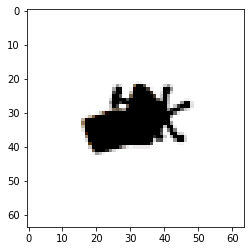

In [21]:

# ---------------- CREATE DATA LOADER -----------------

dataloaders = {
    "train": torch.utils.data.DataLoader(
        dataset, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(train_indices)
    ),
    "validation": torch.utils.data.DataLoader(
        dataset, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(validation_indices)
    ),
    "test": torch.utils.data.DataLoader(
        dataset, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(test_indices)
    ),
}

# ---------------- VISUALIZE IMAGE -----------------
train_loader = dataloaders["train"]

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
# print(len(images)) # batch_size


from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Note: this is required for image truncation error.

# for batch_i, (real_images, _) in enumerate(train_loader):
#   print(batch_i, real_images)

img = np.squeeze(images[0]).T # Tranpose for rbg to be shape (600, 600, 3) instead of (3, 600, 600).
print(img.T.shape)

# need to remove first dimension since currently shape is (3, 600, 600), but pyplot.imshow can only plot images of dimension (N,M) (grayscale) or (N,M,3)
# img = img[0,:,:] (uncomment for grayscale)
# print(img.shape)
plt.imshow(img, cmap="gray")
plt.show()

In [17]:
np.shape(images)

(32, 3, 64, 64)

In [24]:

#config = dict of 'epoch', 'lr', 'batch', ''
def vae_train_chairs(vae_model, config, train_loader, decoder_type="G"):
    vae_model = vae_model.to(device)

    #train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=config["batch"], shuffle=True)

    optimizer = torch.optim.Adam(vae_model.parameters(), lr = config["lr"])

    num_epochs = config["epoch"]

    epoch_loss = torch.zeros(num_epochs).to(device)

    #num_batches = int(np.round(np.shape(train_imgs)[0]/config["batch"]))

    for epoch in range(num_epochs):

        epoch_loss[epoch] = 0.0
        batch_size = 0

        for x_batch, labels in train_loader:
            #x_batch = train_imgs[(idx*config["batch"]):((idx+1)*config["batch"])]
            #x_batch = torch.tensor(x_batch)
            x_batch = x_batch.float().to(device)
            x_batch = x_batch.view((-1, 3, 64, 64))
            x_hat_batch, mean_batch, log_std_batch = vae_model(x_batch)

            #print(x_hat_batch.size())

            loss_val = vae_conv_loss_func(x_hat_batch, x_batch, 
                                          mean_batch, 
                                          log_std_batch, config["batch"],
                                          decoder_type=decoder_type)

            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            batch_size += 1
            epoch_loss[epoch] += loss_val.item()
            print("Iter done")
        epoch_loss[epoch] = epoch_loss[epoch]/batch_size

     
        print("Epoch {}/{} -- Train loss: {}".format(epoch+1, num_epochs, epoch_loss[epoch]))
    
    plt.plot(epoch_loss.to('cpu').detach().numpy(), label = "Train Loss (-ELBO)")
    plt.title("VAE Loss over Epochs") 
    plt.xlabel("Epoch")
    plt.ylabel("Negative ELBO Loss")

In [22]:
vae_chairs = VAEConv(latent_dim =10, n_channels=3)

In [ ]:
vae_train_chairs(vae_chairs, config, train_loader, decoder_type="G")

Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done


Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done


Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done


Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done
Iter done


In [ ]:
vae_chairs.to('cpu')
sampled_ims_post = vae_chairs.sample_ims_from_prior(num_ims=5, train=True)

In [ ]:
plt.imshow(F.sigmoid(sampled_ims_post[4,:,:]).squeeze().detach().numpy())

In [ ]:
torch.save(vae_dsprites.state_dict(),"/h/mhasan/CSC413_FINAL_PROJECT/weights/VAE_dsprites_weights")